# Leveraging Data-Driven Insights to Uncover Value in the Indian Ecosystem



## Table of Contents
<!-- TOC -->

- [Step 1: Business Understanding](#step-1-business-understanding)
  - [Scenario](#scenario)
  - [Objective](#objective)
  - [Hypothesis: Influence of Top Investors](#hypothesis-influence-of-top-investors)
  - [Key Business Questions](#key-business-questions)
  - [Approach](#approach)
- [Step 2: Data Understanding](#step-2-data-understanding)
  - [Project Initialisation](#project-initialisation)
  - [Data Collection](#data-collection)
    - [Access the 2020 and 2021 data from Microsoft SQL Server](#access-the-2020-and-2021-data-from-microsoft-sql-server)
      - [Connect to the database using provided credentials](#connect-to-the-database-using-provided-credentials)
      - [Fetch Information Schema for tables in the database](#fetch-information-schema-for-tables-in-the-database)
      - [Load LP1\_startup\_funding2021 Data](#load-lp1_startup_funding2021-data)
      - [Load LP1\_startup\_funding2020 Data](#load-lp1_startup_funding2020-data)
    - [Access 2019 data from OneDrive](#access-2019-data-from-onedrive)
    - [Access the 2018 data from GitHub Repository](#access-the-2018-data-from-github-repository)
  - [Data Quality Considerations](#data-quality-considerations)
- [Step 3: Data Preparation](#step-3-data-preparation)
  - [Data Cleaning](#data-cleaning)
  - [Data Transformation](#data-transformation)
  - [Data Integration](#data-integration)

<!-- /TOC -->

[Back to Top](#Table-of-Contents)

## Step 1: Business Understanding

### Background
A "startup" is typically characterized by its age, size, and funding method, though there isn't a strict definition. Generally, a startup is a young company, only a few years old, that hasn't yet achieved consistent revenue. These companies operate on a small scale, often with just a working prototype or a paid pilot, but they have the potential for rapid growth and expansion. Initially, they are funded by the founders' personal networks, including friends and family, and they actively seek additional financing to support their growth and establish a sustainable business.

As an example, the Government of India’s Startup India program defines a “startup” as a company (PIB 2017) that is:

    1. Headquartered in India with not more than ten years since incorporation or registration
   
    2. Having an annual turnover of less than INR 1 billion (roughly $14 million) (Startup India 2019)

`Available:` [ADBI Working Paper Series](https://www.adb.org/publications/startup-environment-and-funding-activity-india)

### Scenario
Your team is trying to venture into the Indian start-up ecosystem. As the data expert of the team, you are to investigate the ecosystem and propose the best course of action. 

### Objective
The primary objective is to analyse the funding landscape for start-ups in India from 2018 to 2021, focusing on identifying key trends and patterns. This analysis will provide crucial insights into the Indian start-up ecosystem, which will guide strategic decisions for entering and navigating the market effectively. 

### Hypothesis: Influence of Top Investors

**A. Rationale:**

Determining the influence of top investors on the success of start-ups can provide insights into the impact of investor reputation and networks. This can guide new start-ups in selecting potential investors and understanding the benefits of partnering with top-tier investors.

**B. Null Hypothesis (H0):**

Start-ups funded by top investors do not have higher subsequent funding rounds compared to those funded by less active investors.

**C. Alternative Hypothesis (H1):**

Start-ups funded by top investors have higher subsequent funding rounds compared to those funded by less active investors.

### Key Business Questions

**1. Who are the most active investors in the Indian start-up ecosystem?**

Identifying the most active investors can help in analyzing the influence of top investors on subsequent funding rounds.

**2. Are there any geographical trends or hotspots for start-up funding in India?**

Analyzing geographical trends in start-up funding can provide context for understanding the influence of top investors in different regions.

**3. Are there any annual trends in start-up funding in India from 2018 to 2021?**

Understanding annual trends in start-up funding can provide background information for assessing the impact of top investors on subsequent funding rounds.

**4. Which sectors received the most funding each year?**

Analyzing the sectors that received the most funding can provide additional context for evaluating the influence of top investors.

**5. What impact do the years of existence or age of a start-up have on investment opportunities?**

Understanding how the age of a start-up influences investment opportunities can provide insights into whether start-ups funded by top investors indeed have higher subsequent funding rounds.

**6. What are the funding stages (seed, series A, etc.) that received the highest investments?**

Examining the funding stages that received the highest investments can offer insights into the funding patterns of top investors.

**7. Is there a correlation between funding amounts from top investors (blue-chip investors) and the performance metrics of start-ups?**

Exploring the correlation between funding amounts from top investors and start-up performance metrics can help evaluate the effectiveness of investments made by these investors.

### Approach
In conclusion, to understand the trends and patterns in start-up funding in India from 2018 to 2021, a comprehensive approach will be implemented. This will involve gathering detailed data on start-ups, funding amounts, stages, sectors, geographic locations, and investors. The collected data will be analyzed using descriptive statistics, trend analysis, visualizations, and statistical tests to derive key insights. These insights will be compiled into detailed reports and dashboards, providing actionable information and strategic recommendations. Ultimately, this analysis will offer data-driven guidance on the most promising sectors, regions, and funding stages to focus on, identify key investors for potential partnerships, and assess the overall attractiveness of the Indian start-up market for strategic entry.

[Back to Top](#Table-of-Contents)

## Step 2: Data Understanding

`Data Collection`

To effectively analyse the Indian start-up ecosystem from 2018 to 2021, comprehensive data collection is crucial. The data will be sourced from multiple datasets that detail startup funding activities within this period. Each dataset will encompass various aspects essential for a holistic understanding of the funding landscape. Specifically, the datasets will include:

**A. Start-up Details:**

-   Company/Brand: Name of the company/start-up

-   Founded: Year start-up was founded

-   Headquarters/Location: The geographical location of the start-up, including city and region.

-   Sector/Industry: The industry or sector in which the start-up operates, such as healthtech, fintech, etc.

-   What it does/About Company: Description about Company

-   Founders: Founders of the Company

**B. Funding Information:**

-   Amount: The total amount of funding received by the start-up in each funding round.

-   Stage/Round: Details of the funding stages such as seed, series A, series B, etc.

**C. Investors' Information:**

-   Investors: The names of the investors or investment firms involved.

`Data Quality Considerations`

Ensuring high data quality is paramount for reliable analysis and actionable insights. Key considerations for maintaining data quality include:

**A. Completeness:**

Ensure that all necessary fields are filled in across the datasets. This includes making sure that no critical information is missing for any of the start-ups, funding rounds, or investors.

**B. Consistency:**

Handle any inconsistencies in data entries. This may involve standardizing entries for sectors, locations, and investor names to ensure uniformity. For example, variations in how sectors are labeled (e.g., "Healthtech" vs. "Health Technology") should be standardized to a single format.

**C. Handling Missing Data:**

Identify and address missing data points. Techniques such as imputation, where appropriate, or excluding certain records if the missing data is minimal and does not impact overall analysis, will be employed.

### Project Initialisation

In [1]:
# Importing necessary libraries
from dotenv import dotenv_values
import pyodbc
import requests
import pandas as pd
import numpy as np
from scipy.stats import skew, kurtosis
from fancyimpute import IterativeImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
import re
import calendar
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
import warnings

# Suppressing all warnings to avoid cluttering the output
warnings.filterwarnings("ignore")

# Set display options for Pandas DataFrame
pd.set_option("display.max_rows", 100)
pd.set_option("display.max_columns", 100)

# set theme
sns.set_theme(style="dark", palette="dark", font="sans-serif", font_scale=1.5)
plt.style.use("dark_background")
custom_palette = ["cyan", "magenta", "yellow"]

### Data Collection

The task involves accessing three different datasets from different sources: a database, OneDrive, and a GitHub repository. Each dataset has a specific method of access, such as querying a database using ODBC or ORM library, downloading a file programmatically using the requests library from OneDrive, and cloning or downloading a file from a GitHub repository using gitpython or requests library.

#### Access the 2020 and 2021 data from Microsoft SQL Server

##### Connect to the database using provided credentials

In [2]:
# Load environment variables from .env file
environment_variables = dotenv_values("LP1_DAP.env")

# Retrieve environment variables for database connection
server_name = environment_variables.get("server")
password = environment_variables.get("password")
login = environment_variables.get("login")
database_name = environment_variables.get("database")

# Create a database connection string using pyodbc
connection_string = f"DRIVER={{SQL Server}};SERVER={server_name};DATABASE={database_name};UID={login};PWD={password};"

#Establish a connection to the database
try:
    connection = pyodbc.connect(connection_string)
    print("Connection successful:", connection_string)    
except Exception as e:
    print("Connection failed:", e)

Connection successful: DRIVER={SQL Server};SERVER=dap-projects-database.database.windows.net;DATABASE=dapDB;UID=LP1_learner;PWD=Hyp0th3s!$T3$t!ng;


##### Fetch Information Schema for tables in the database

In [3]:
# Define the SQL query to show specific tables in the database
db_query = """
        SELECT *
        FROM INFORMATION_SCHEMA.TABLES
        WHERE TABLE_SCHEMA = 'dbo'
        """
# Read data from the SQL query result into a DataFrame using the established database connection
schema_df = pd.read_sql(db_query, connection)

#  Check whether data has been retrieved successfully to confirm successful connection to database
try:
    schema_df = pd.read_sql(db_query, connection)    
    print("Data retrieved successfully")
    print()
    print(schema_df)    
except Exception as e:
    print("Failed to retrieve data:", e)

Data retrieved successfully

  TABLE_CATALOG TABLE_SCHEMA               TABLE_NAME  TABLE_TYPE
0         dapDB          dbo  LP1_startup_funding2021  BASE TABLE
1         dapDB          dbo  LP1_startup_funding2020  BASE TABLE


##### Load LP1_startup_funding2021 Data

In [4]:
# Define the SQL query to show specific tables in the database
db_query1 = """
        SELECT *
        FROM LP1_startup_funding2021        
        """
# Read data from the SQL query result into a DataFrame using the established database connection
df2021 = pd.read_sql(db_query1, connection)

# Display DataFrame Info
df2021.info()
print()

# Display the DataFrame
df2021.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1209 entries, 0 to 1208
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Company_Brand  1209 non-null   object 
 1   Founded        1208 non-null   float64
 2   HeadQuarter    1208 non-null   object 
 3   Sector         1209 non-null   object 
 4   What_it_does   1209 non-null   object 
 5   Founders       1205 non-null   object 
 6   Investor       1147 non-null   object 
 7   Amount         1206 non-null   object 
 8   Stage          781 non-null    object 
dtypes: float64(1), object(8)
memory usage: 85.1+ KB



,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount,Stage
0,Unbox Robotics,2019.0,Bangalore,AI startup,Unbox Robotics builds on-demand AI-driven ware...,"Pramod Ghadge, Shahid Memon","BEENEXT, Entrepreneur First","$1,200,000",Pre-series A
1,upGrad,2015.0,Mumbai,EdTech,UpGrad is an online higher education platform.,"Mayank Kumar, Phalgun Kompalli, Ravijot Chugh,...","Unilazer Ventures, IIFL Asset Management","$120,000,000",None
2,Lead School,2012.0,Mumbai,EdTech,LEAD School offers technology based school tra...,"Smita Deorah, Sumeet Mehta","GSV Ventures, Westbridge Capital","$30,000,000",Series D
3,Bizongo,2015.0,Mumbai,B2B E-commerce,Bizongo is a business-to-business online marke...,"Aniket Deb, Ankit Tomar, Sachin Agrawal","CDC Group, IDG Capital","$51,000,000",Series C
4,FypMoney,2021.0,Gurugram,FinTech,"FypMoney is Digital NEO Bank for Teenagers, em...",Kapil Banwari,"Liberatha Kallat, Mukesh Yadav, Dinesh Nagpal","$2,000,000",Seed


##### Load LP1_startup_funding2020 Data

In [5]:
# Define the SQL query to show specific tables in the database
db_query2 = """
        SELECT *
        FROM LP1_startup_funding2020        
        """
# Read data from the SQL query result into a DataFrame using the established database connection
df2020 = pd.read_sql(db_query2, connection)

# Display DataFrame Info
df2020.info()
print()

# Display the DataFrame
df2020.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1055 entries, 0 to 1054
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Company_Brand  1055 non-null   object 
 1   Founded        842 non-null    float64
 2   HeadQuarter    961 non-null    object 
 3   Sector         1042 non-null   object 
 4   What_it_does   1055 non-null   object 
 5   Founders       1043 non-null   object 
 6   Investor       1017 non-null   object 
 7   Amount         801 non-null    float64
 8   Stage          591 non-null    object 
 9   column10       2 non-null      object 
dtypes: float64(2), object(8)
memory usage: 82.5+ KB



,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount,Stage,column10
0,Aqgromalin,2019.0,Chennai,AgriTech,Cultivating Ideas for Profit,"Prasanna Manogaran, Bharani C L",Angel investors,200000.0,None,None
1,Krayonnz,2019.0,Bangalore,EdTech,An academy-guardian-scholar centric ecosystem ...,"Saurabh Dixit, Gurudutt Upadhyay",GSF Accelerator,100000.0,Pre-seed,None
2,PadCare Labs,2018.0,Pune,Hygiene management,Converting bio-hazardous waste to harmless waste,Ajinkya Dhariya,Venture Center,NaN,Pre-seed,None
3,NCOME,2020.0,New Delhi,Escrow,Escrow-as-a-service platform,Ritesh Tiwari,"Venture Catalysts, PointOne Capital",400000.0,None,None
4,Gramophone,2016.0,Indore,AgriTech,Gramophone is an AgTech platform enabling acce...,"Ashish Rajan Singh, Harshit Gupta, Nishant Mah...","Siana Capital Management, Info Edge",340000.0,None,None


#### Access 2019 data from OneDrive

In [6]:
# Path of CSV file
file_path = '../Data/startup_funding2019.csv'

# Read the CSV file into a pandas DataFrame
df2019 = pd.read_csv(file_path)

# Display DataFrame Info
df2019.info()
print()

# Display the DataFrame
df2019.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89 entries, 0 to 88
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Company/Brand  89 non-null     object 
 1   Founded        60 non-null     float64
 2   HeadQuarter    70 non-null     object 
 3   Sector         84 non-null     object 
 4   What it does   89 non-null     object 
 5   Founders       86 non-null     object 
 6   Investor       89 non-null     object 
 7   Amount($)      89 non-null     object 
 8   Stage          43 non-null     object 
dtypes: float64(1), object(8)
memory usage: 6.4+ KB



,Company/Brand,Founded,HeadQuarter,Sector,What it does,Founders,Investor,Amount($),Stage
0,Bombay Shaving,NaN,NaN,Ecommerce,Provides a range of male grooming products,Shantanu Deshpande,Sixth Sense Ventures,"$6,300,000",NaN
1,Ruangguru,2014.0,Mumbai,Edtech,A learning platform that provides topic-based ...,"Adamas Belva Syah Devara, Iman Usman.",General Atlantic,"$150,000,000",Series C
2,Eduisfun,NaN,Mumbai,Edtech,It aims to make learning fun via games.,Jatin Solanki,"Deepak Parekh, Amitabh Bachchan, Piyush Pandey","$28,000,000",Fresh funding
3,HomeLane,2014.0,Chennai,Interior design,Provides interior designing solutions,"Srikanth Iyer, Rama Harinath","Evolvence India Fund (EIF), Pidilite Group, FJ...","$30,000,000",Series D
4,Nu Genes,2004.0,Telangana,AgriTech,"It is a seed company engaged in production, pr...",Narayana Reddy Punyala,Innovation in Food and Agriculture (IFA),"$6,000,000",NaN


#### Access the 2018 data from GitHub Repository

In [7]:
# URL of the file to download
url = "https://github.com/Azubi-Africa/Career_Accelerator_LP1-Data_Analysis/raw/main/startup_funding2018.csv"

# Local file path where the file will be saved
local_file_path = '../Data/startup_funding2018.csv'

# Send a GET request to the URL
response = requests.get(url)

# Check if the request was successful (status code 200)
if response.status_code == 200:
    # Write the content of the response to the specified file path
    with open(local_file_path, "wb") as f:
        f.write(response.content)
    print("File downloaded successfully")
else:
    print("Failed to download file")

# Read the downloaded CSV file into a DataFrame
df2018 = pd.read_csv(local_file_path)

# Display DataFrame Info
print()
df2018.info()
print()

# Display the DataFrame
df2018.head()

File downloaded successfully

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 526 entries, 0 to 525
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Company Name   526 non-null    object
 1   Industry       526 non-null    object
 2   Round/Series   526 non-null    object
 3   Amount         526 non-null    object
 4   Location       526 non-null    object
 5   About Company  526 non-null    object
dtypes: object(6)
memory usage: 24.8+ KB



,Company Name,Industry,Round/Series,Amount,Location,About Company
0,TheCollegeFever,"Brand Marketing, Event Promotion, Marketing, S...",Seed,250000,"Bangalore, Karnataka, India","TheCollegeFever is a hub for fun, fiesta and f..."
1,Happy Cow Dairy,"Agriculture, Farming",Seed,"₹40,000,000","Mumbai, Maharashtra, India",A startup which aggregates milk from dairy far...
2,MyLoanCare,"Credit, Financial Services, Lending, Marketplace",Series A,"₹65,000,000","Gurgaon, Haryana, India",Leading Online Loans Marketplace in India
3,PayMe India,"Financial Services, FinTech",Angel,2000000,"Noida, Uttar Pradesh, India",PayMe India is an innovative FinTech organizat...
4,Eunimart,"E-Commerce Platforms, Retail, SaaS",Seed,—,"Hyderabad, Andhra Pradesh, India",Eunimart is a one stop solution for merchants ...


### Data Quality Considerations
The datasets are carefully examined to identify common data quality issues such as missing values, outliers, duplicates, inconsistencies, and errors. 

#### Load LP1_startup_funding2021 Data

##### Missing and Duplicate Data Quality Considerations

In [8]:
# Determine the proportion of missing values
missing_percentage_21 = (df2021.isnull().mean() * 100).round(2)

# Check for duplicated values
duplicate_count_21 = df2021.duplicated(subset=None, keep=False).sum()

# Display duplicated rows if any
duplicated_rows_21 = df2021[df2021.duplicated(subset=None, keep=False)]

# Display Results
print("Proportion of missing values in 2021 data:")
print()
print(missing_percentage_21)
print("\nNumber of duplicated rows in 2021 data:", duplicate_count_21)
print("\nDuplicated rows in 2021 data:")
duplicated_rows_21

Proportion of missing values in 2021 data:

Company_Brand     0.00
Founded           0.08
HeadQuarter       0.08
Sector            0.00
What_it_does      0.00
Founders          0.33
Investor          5.13
Amount            0.25
Stage            35.40
dtype: float64

Number of duplicated rows in 2021 data: 38

Duplicated rows in 2021 data:


,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount,Stage
94,Curefoods,2020.0,Bangalore,Food & Beverages,Healthy & nutritious foods and cold pressed ju...,Ankit Nagori,"Iron Pillar, Nordstar, Binny Bansal",$13000000,None
96,Bewakoof,2012.0,Mumbai,Apparel & Fashion,Bewakoof is a lifestyle fashion brand that mak...,Prabhkiran Singh,InvestCorp,$8000000,None
98,FanPlay,2020.0,Computer Games,Computer Games,A real money game app specializing in trivia g...,YC W21,"Pritesh Kumar, Bharat Gupta",Upsparks,$1200000
104,Advantage Club,2014.0,Mumbai,HRTech,Advantage Club is India's largest employee eng...,"Sourabh Deorah, Smiti Bhatt Deorah","Y Combinator, Broom Ventures, Kunal Shah",$1700000,None
106,Ruptok,2020.0,New Delhi,FinTech,Ruptok fintech Pvt. Ltd. is an online gold loa...,Ankur Gupta,Eclear Leasing,$1000000,None
107,Curefoods,2020.0,Bangalore,Food & Beverages,Healthy & nutritious foods and cold pressed ju...,Ankit Nagori,"Iron Pillar, Nordstar, Binny Bansal",$13000000,None
109,Bewakoof,2012.0,Mumbai,Apparel & Fashion,Bewakoof is a lifestyle fashion brand that mak...,Prabhkiran Singh,InvestCorp,$8000000,None
111,FanPlay,2020.0,Computer Games,Computer Games,A real money game app specializing in trivia g...,YC W21,"Pritesh Kumar, Bharat Gupta",Upsparks,$1200000
117,Advantage Club,2014.0,Mumbai,HRTech,Advantage Club is India's largest employee eng...,"Sourabh Deorah, Smiti Bhatt Deorah","Y Combinator, Broom Ventures, Kunal Shah",$1700000,None
119,Ruptok,2020.0,New Delhi,FinTech,Ruptok fintech Pvt. Ltd. is an online gold loa...,Ankur Gupta,Eclear Leasing,$1000000,None


##### Unique values Data Quality Considerations

In [9]:
# List all elements in the columns
for i, column in enumerate(df2021.columns):
    print(f'Column-{i + 1}: {column}: {len(df2021[column].unique())}\n', df2021[column].unique())
    print('_'*100)
    print()


Column-1: Company_Brand: 1033
 ['Unbox Robotics' 'upGrad' 'Lead School' ... 'Gigforce' 'Vahdam' 'WeRize']
____________________________________________________________________________________________________

Column-2: Founded: 31
 [2019. 2015. 2012. 2021. 2014. 2018. 2016. 2020. 2010. 2017. 1993. 2008.
 2013. 1999. 1989. 2011.   nan 2009. 2002. 1994. 2006. 2000. 2007. 1978.
 2003. 1998. 1991. 1984. 2004. 2005. 1963.]
____________________________________________________________________________________________________

Column-3: HeadQuarter: 71
 ['Bangalore' 'Mumbai' 'Gurugram' 'New Delhi' 'Hyderabad' 'Jaipur'
 'Ahmadabad' 'Chennai' None 'Small Towns, Andhra Pradesh' 'Goa'
 'Rajsamand' 'Ranchi' 'Faridabad, Haryana' 'Gujarat' 'Pune' 'Thane'
 'Computer Games' 'Cochin' 'Noida' 'Chandigarh' 'Gurgaon' 'Vadodara'
 'Food & Beverages' 'Pharmaceuticals\t#REF!' 'Gurugram\t#REF!' 'Kolkata'
 'Ahmedabad' 'Mohali' 'Haryana' 'Indore' 'Powai' 'Ghaziabad' 'Nagpur'
 'West Bengal' 'Patna' 'Samsitpur' 'Luck

##### Identifying Odd Entries in Each Column

**Column-1: Company_Brand: 1033**

In the context of identifying odd entries in a list of startup names, duplicates are considered odd because they deviate from the expectation that each entry should be unique. In order to identify duplicate startups the following steps are carried out:

1.  Identify key features that represent the core information of a startup
   
2.  Filter duplicates in the dataset based on these key features

In [10]:
# Define key columns to identify duplicates
key_columns = ['Company_Brand', 'Founded', 'HeadQuarter', 'Sector', 'What_it_does', 'Founders']

# Check for number of duplicated values within the 'Company_Brand' column
dup21_count = df2021.duplicated(subset=key_columns, keep=False).sum()

# Identify duplicate entries in the 'Company_Brand' column
dup_c1_21 = df2021[df2021.duplicated(subset=key_columns, keep=False)]

# Extract the list of duplicated company brands
unidup_c1_21 = dup_c1_21['Company_Brand'].unique()

# Display results
print(f"Number of duplicated values in 'Company_Brand' column: {dup21_count}")
print("\nList of duplicated company brands:")
print(unidup_c1_21)
dup_c1_21

Number of duplicated values in 'Company_Brand' column: 77

List of duplicated company brands:
['DealShare' 'Curefoods' 'TartanSense' 'Bewakoof' 'Kirana247' 'FanPlay'
 'NeoDocs' 'IsGoingOnline' 'Camp K12' 'Elda Health' 'Sporjo'
 'Advantage Club' 'SuperGaming' 'Ruptok' 'Trinkerr' 'Zorro'
 'Ultraviolette' 'NephroPlus' 'Unremot' 'FanAnywhere' 'PingoLearn' 'Spry'
 'Enmovil' 'ASQI Advisors' 'Insurance Samadhan' 'Evenflow Brands'
 'MasterChow' 'Fullife Healthcare' 'BharatPe' 'Nazara Technologies' 'MPL'
 'Spinny' 'KreditBee' "BYJU'S" 'Euler Motors' 'Northern Arc' 'Delhivery']


,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount,Stage
14,DealShare,2018.0,Jaipur,E-commerce,DealShare is a Social Commerce Startup,"Sankar Bora, Sourjyendu Medda, Vineet Rao","Tiger Global Management, InnoVen Capital","$9,000,000",None
94,Curefoods,2020.0,Bangalore,Food & Beverages,Healthy & nutritious foods and cold pressed ju...,Ankit Nagori,"Iron Pillar, Nordstar, Binny Bansal",$13000000,None
95,TartanSense,2015.0,Bangalore,Information Technology,TartanSense unlocks value for small farm holde...,Jaisimha Rao,"FMC, Omnivore, Blume Ventures",$5000000,None
96,Bewakoof,2012.0,Mumbai,Apparel & Fashion,Bewakoof is a lifestyle fashion brand that mak...,Prabhkiran Singh,InvestCorp,$8000000,None
97,Kirana247,2018.0,New Delhi,Logistics & Supply Chain,An on-demand FMCG supply chain company leverag...,"Tarun Jiwarajka, Pankhuri Jiwarajka",None,$1000000,None
98,FanPlay,2020.0,Computer Games,Computer Games,A real money game app specializing in trivia g...,YC W21,"Pritesh Kumar, Bharat Gupta",Upsparks,$1200000
99,NeoDocs,2020.0,Mumbai,Healthtech,Neodocs is a part of India's prominent Social ...,"Nikunj Malpani, Anurag Meena, Pratik Lodha","Y Combinator, 9Unicorns, Titan Capital",$Undisclosed,None
100,IsGoingOnline,2015.0,Cochin,Retail,Kochi-based digital catalogue and marketplace ...,Eobin Alex,"Unicorn India Ventures, SEA Fund, Devdatt Shah",$200000,None
101,Camp K12,2010.0,Gurugram,EdTech,Camp K12 is a global online school for 21st ce...,Anshul Bhagi,"Matrix Partners India, Elevation Capital",$12000000,None
102,Elda Health,2020.0,Bangalore,Healthcare,Elda Health is a digital wellness platform tha...,"Swathi Kulkarni, Sindhuri Ananth, Shubham Sharma","Avaana Capital, Orios Ventures",$1500000,None


**Column-2: Founded: 31**

To identify odd entries in the column that identifies the year in which startup companies in India were founded, we need to focus on identifying entries that deviate from the expected range or format. Specifically, we should consider:

1. Missing or NaN values.
  
2. Years that are unusually old for a startup context.
     -  The range of 1980 to 2024 encompasses a period marked by significant technological innovation, economic dynamism, cultural shifts, and global connectivity, making it reasonable to classify companies founded within this timeframe as startups [United Nations DESA](https://econpapers.repec.org/scripts/redir.pf?u=http%3A%2F%2Fwww.un.org%2Fesa%2Fdesa%2Fpapers%2F2019%2Fwp158_2019.pdf;h=repec:une:wpaper:158), [WEForum](https://www.weforum.org/agenda/2024/01/9-forces-reshaping-the-global-business-landscape/#:~:text=URL%3A%20https%3A%2F%2Fwww.weforum.org%2Fagenda%2F2024%2F01%2F9), [Mercatus Center](https://www.mercatus.org/research/research-papers/technological-innovation-and-economic-growth), [MDPI - Sustainability 2020](https://doi.org/10.3390/su12208323).
  
     -  [Go to Definition of an Indian Startup](#background)



3. Non-numeric values or invalid year formats.

In [11]:
# Define criteria for odd entries in the 'Founded' column
def is_odd_year(year):
    """
    Function to identify odd entries in the 'Founded' column based on specified criteria.

    Parameters:
        year (int or float): The founding year of a startup.

    Returns:
        bool: True if the year is considered odd, False otherwise.
    """
    # Criteria for odd entries:
    # - Missing values
    # - Years that are unusually old for a startup context
    # - Non-numeric values or invalid year formats
    
    # Check for missing values
    if pd.isnull(year):
        return True
    
    # Check if the year is not numeric
    if not isinstance(year, (int, float)):
        return True
    
    # Assuming startups would not be founded before 1980 or after 2024
    if year < 1980 or year > 2024:  
        return True
    
    # If the year passes all criteria, it's not considered odd
    return False

# Filter odd entries in the 'Founded' column
odde_c2_21 = df2021[df2021['Founded'].apply(is_odd_year)]['Founded']

# Calculate the number of unique odd entries
oddn_c2_21 = odde_c2_21.unique()

# Print the number of odd entries and their details
print(f"Number of odd entries in 'Founded' column: {len(oddn_c2_21)}")
print('\nOdd entries:')
for entry in oddn_c2_21:
    print(entry)

Number of odd entries in 'Founded' column: 3

Odd entries:
nan
1978.0
1963.0


**Column-3: HeadQuarter: 71**

To identify odd entries in the column that lists headquarters or locations in India where startup companies are found, we need to identify entries that do not fit the typical format of Indian city names or locations. Odd entries might include:

1. Missing or NaN values
   
2. Locations outside India.
   
3. Non-geographical entities.
   
4. Entries with noticeable errors or typographical mistakes.

In [12]:
# list of Indian cities
indian_cities = [
    'Ahmedabad', 'Ambernath', 'Andaman and Nicobar Islands', 'Andhra Pradesh', 'Andheri',
    'Arunachal Pradesh', 'Assam', 'Bangalore', 'Belgaum', 'Bengaluru', 'Bihar', 'Bhilwara',
    'Bhopal', 'Bhubaneswar', 'Chandigarh', 'Chennai', 'Chhattisgarh', 'Coimbatore', 'Cochin', 'Dehradun',
    'Delhi', 'Dhingsara', 'Faridabad', 'Ghaziabad', 'Gandhinagar', 'Goa', 'Gujarat', 'Gurgaon', 'Gurugram', 'Guwahati',
    'Haryana', 'Himachal Pradesh', 'Hyderabad', 'Indore', 'Jaipur', 'Jammu and Kashmir',
    'Jharkhand', 'Jodhpur', 'Kanpur', 'Karnataka', 'Kerala', 'Kochi', 'Kolkata', 'Kottayam',
    'Lucknow', 'Ludhiana', 'Madhya Pradesh', 'Maharashtra', 'Mangalore', 'Mohali', 'Mumbai',
    'Nagaland', 'Nagpur', 'New Delhi', 'Noida', 'Odisha', 'Orissia', 'Panchkula', 'Panaji', 'Patna',
    'Puducherry', 'Powai', 'Pune', 'Rajsamand', 'Rajasthan', 'Ranchi', 'Roorkee', 'Samastipur',
    'Satara', 'Samsitpur', 'Silvassa', 'Sikkim', 'Surat', 'Tamil Nadu', 'Telangana', 'Telugana',
    'Thane', 'Thiruvananthapuram', 'The Nilgiris', 'Tirunelveli', 'Trivandrum', 'Tumkur', 
    'Uttar Pradesh', 'Uttarakhand', 'Vadodara', 'Warangal', 'West Bengal',
    'Kalkaji', 'Hubli', 'Azadpur', 'Kota', 'Anand', 'Bangalore City', 'Margão', 'Alwar', 'Kannur',
    'Ernakulam', 'Kormangala', 'Mylapore', 'Guntur', 'Kalpakkam', 'Worli', 'Alleppey', 'Guindy'
]


# Identifying odd entries
def is_odd_location(location):
    """
    Function to identify odd entries in the 'HeadQuarter' column.

    Parameters:
        location (str): The location entry to be evaluated.

    Returns:
        bool: True if the location is considered odd, False otherwise.
    """
    # Criteria for odd entries:
    # - Missing values
    # - Locations outside India
    # - Non-geographical entities
    # - Entries with noticeable errors or typos
    
    # Check for missing values
    if pd.isnull(location):
        return True
    
    # Check for None values
    if location is None:
        return True
    
    # Strip leading and trailing spaces
    location = location.strip()

    # Check for empty strings
    if len(location) == 0:
        return True
    
    # Define non-geographical keywords
    non_geographical_keywords = ['computer games', 'food & beverages', 'online media', 'information technology & services']

    # Check if the lowercase input string contains any of the lowercase non-geographical keywords
    if any(keyword.lower() in location.lower() for keyword in non_geographical_keywords):
        return True

    # Check for special characters indicating errors or typos
    if '\t#REF!' in location:
        return True
    
    # Check for numeric characters within the location
    if any(non_alpha for non_alpha in location if non_alpha.isdigit()):
        return True
    
    # Check for comma-separated entries
    if ',' in location:
        parts = location.split(',')
        # Check for irregularities in comma-separated entries
        if len(parts) > 2 or any(len(part.strip()) == 0 for part in parts):
            return True
        # Check if the second part contains non-alphabetical characters
        if not parts[1].strip().replace(" ", "").isalpha():
            return True 
    
    # Check if the location is not among the predefined list of Indian locations
    return location not in indian_cities



# Filter odd entries in the 'HeadQuarter' column
odde_c3_21 = df2021[df2021['HeadQuarter'].apply(is_odd_location)]['HeadQuarter']

# Extract unique odd entries
oddn_c3_21 = odde_c3_21.unique()

# Print the number of odd entries and their details
print(f"Number of odd entries in 'HeadQuarter' column: {len(oddn_c3_21)}")
print('\nOdd entries:')
for entry in oddn_c3_21:
    print(entry)


Number of odd entries in 'HeadQuarter' column: 15

Odd entries:
Ahmadabad
None
Small Towns, Andhra Pradesh
Faridabad, Haryana
Computer Games
Food & Beverages
Pharmaceuticals	#REF!
Gurugram	#REF!
Beijing
New York
Santra
Mountain View, CA
Online Media	#REF!
London
Information Technology & Services


`Comment`

Non-geographical descrepancies will be updated to 'Not filled', and any potential geographical discrepancies will be corrected accordingly. International geographical entries with minimal occurrences will be removed if their exclusion does not compromise data integrity.

**Column-4: Sector: 254**

To identify odd entries in the given list of sectors of startups in India, we need to consider entries that do not align with typical startup sectors or contain errors. Odd entries might include:

1. Missing or NaN values

2. Location entries
   
3. Sectors with more than 5 words
   
4. Typos or mispellings
   
5. Uncommon abbreviations
   
6. Inconsistent formatting
   
7. Non-industry terms and unusaul sectors

In [13]:

def is_odd_sector(sector):
    """
    Function to identify odd entries in the list of startup sectors.

    Parameters:
        sector (str): The sector of a startup.

    Returns:
        bool: True if the sector is considered odd, False otherwise.
    """
    # Criteria for odd entries:
    # - Missing values
    # - Location entries
    # - Sectors with more than 5 words
    # - Typos or mispellings
    # - Uncommon abbreviations
    # - Inconsistent formatting
    # - Non-industry terms and unusaul sectors
    
    # Check for missing values
    if pd.isnull(sector):
        return True    

    # Strip leading and trailing spaces
    sector = sector.strip()

    # Check for empty strings
    if len(sector) == 0:
        return True
    
    # Check for location entries
    if ',' in sector:
        return True
    
    # Check for sectors with more than 5 words
    if len(sector.split()) > 5:
        return True
    
    # Check for typos or misspellings
    if 'Helathcare' in sector or 'equiptment' in sector:
        return True
    
    # Check for numeric values within the sector
    if re.search(r'\d', sector):
        return True
    
    # Check for inconsistent formatting
    special_characters = [
        '&', '@', '#', '$', '%', '^', '*', '!', '?', '(', ')', '-', '_', '=', '+',
        '{', '}', '[', ']', '|', '\\', ':', ';', '"', "'", '<', '>', ',', '.', '/',
        '~', '`'
    ]
    if any(char in sector for char in special_characters):
        return True
    
    # Check for Non-industry terms and unusual sectors
    non_industry_terms = ['hauz khas', 'music', 'manchester', 'sochcast', 'matrimony', 'company-as-a-service', 'startup']
    if any(term.lower() in sector.lower() for term in non_industry_terms):
        return True
    
    return False

# Filter odd entries in the 'Sector' column
odde_c4_21 = df2021['Sector'].apply(is_odd_sector)
oddn_c4_21 = df2021[odde_c4_21]['Sector'].unique()

# Print the number of odd entries and their details
print(f"Number of odd entries in 'Sector' column: {len(oddn_c4_21)}")
print('\nOdd entries:')
for entry in oddn_c4_21:
    print(entry)

Number of odd entries in 'Sector' column: 63

Odd entries:
AI startup
B2B E-commerce
Tech Startup
E-commerce
B2B service
Helathcare
IT startup
Food & Beverages
Milk startup
SaaS startup
Apparel & Fashion
Logistics & Supply Chain
Wine & Spirits
Mechanical & Industrial Engineering
Tech startup
Information Technology & Services
B2B marketplace
E-learning
Venture Capital & Private Equity
Health, Wellness & Fitness
Software Startup
Computer & Network Security
Hospital & Health Care
Music
Hauz Khas
Primary Business is Development and Manufacturing of Novel Healthcare Products in Effervescent forms using imported propriety ingredients.
MoEVing is India's only Electric Mobility focused Technology Platform with a vision to accelerate EV adoption in India.
B2B Ecommerce
Cannabis startup
B2B Marketplace
B2B Manufacturing
TaaS startup
EV startup
Blockchain startup
Manufacturing startup
Vehicle repair startup
Pollution control equiptment
Fashion & Lifestyle
D2C
Marketing & Advertising
D2C Business


`Comments`

The 'Sector' column contains numerous unique values, many of which are worded differently despite having the same meaning. There are two approaches to address this column:

**1. Maintaining Current Granularity:** This approach involves standardizing the terminology by assigning a single term to synonymous entries and replacing odd or inconsistent entries with either a suitable existing term or 'Not filled'.
   
**2. Defining Descriptive and Collective Bins:** This method involves categorizing the sectors into broader, descriptive bins. These bins can be defined within the existing 'Sector' column or by creating a new column named 'Sector_Category'. The proposed bins include, but are not limited to, the following categories:
   
   - Technology & Innovation

   - Health & Wellness

   - Finance & Commerce

   - Consumer Goods & Services

   - Media & Marketing

   - Transportation & Mobility

   - Industrial & Manufacturing

   - Legal & Professional Services

   - Art & Design

   - Education & Training

   - Environmental & Renewable Energy

   - Real Estate & Construction

   - Food & Beverage Industry
      
   - Social & Community Services

**Column-5: What_it_does: 1143**

To identify odd entries in the given list of what startups do in India, we need to consider entries that might include:

1. Missing or NaN values
   
2. Entries containing unusual special characters and a word count less than 5
   
3. Entries that include a string pattern like $xxxxxxxxxxxx

In [14]:
def is_odd_activity(activity):
    """
    Function to identify odd entries in the list of startup activities.

    Parameters:
        activity (str): What a startup does.

    Returns:
        bool: True if the activity is considered odd, False otherwise.
    """
    # Criteria for odd entries:
    # - Missing values
    # - Entries containing unusual special characters and a word count less than 5
    # - Entries that include a string pattern like $xxxxxxxxxxxx
    
    # Check for missing values
    if pd.isnull(activity):
        return True    

    # Strip leading and trailing spaces
    activity = activity.strip()

    # Check for empty strings
    if len(activity) == 0:
        return True  
     
    # Check for strings like $xxxxxxxxxxxx
    if re.match(r'^\$[0-9]{1,}$', activity):
        return True
    
    # Check for entries containing unusual special characters and a word count less than 5
    # List of special characters
    special_characters = [
        '&', '@', '#', '$', '%', '^', '*', '!', '?', '(', ')', '-', '_', '=', '+',
        '{', '}', '[', ']', '|', '\\', ':', ';', '"', "'", '<', '>', ',', '.', '/',
        '~', '`'
    ]
    if any(char in activity for char in special_characters) and len(activity.split()) < 5:
        return True
    
    return False

# Filter odd entries in the 'What_it_does' column
odde_c5_21 = df2021['What_it_does'].apply(is_odd_activity)
oddn_c5_21 = df2021[odde_c5_21]['What_it_does'].unique()

# Print the number of odd entries and their details
print(f"Number of odd entries in 'What_it_does' column: {len(oddn_c5_21)}")
print('\nOdd entries:')
for entry in oddn_c5_21:
    print(entry)

Number of odd entries in 'What_it_does' column: 13

Odd entries:
Tata Digital-backed Curefit
Vikash Mishra, Mragank Jain
Plant-based nutraceutical firm
India's First Icepops Brand
Small businesses-focused non-banking lender
Video integrated social-gaming platform
24*7 convenience store
Video-based social commerce startup
100% Natural Dog Treats.
Sustainability for the future.
World's first cross-border Neobank
Just-in-time Sales Enablement Platform
A gig/on-demand staffing company.


**Column-6: Founders: 1096**

To identify odd entries in the given list of founders of startups in India, we need to consider entries that might include:

1. Missing or NaN values
   
2. Entries containing unusual special characters and a word count less than 2
   
3. Entries that include a string pattern like $xxxxxxxxxxxx

In [15]:
def is_odd_founder(founder):
    """
    Function to identify odd entries in the list of startup founders.

    Parameters:
        founder (str): The name of a startup founder.

    Returns:
        bool: True if the founder entry is considered odd, False otherwise.
    """
    # Criteria for odd entries:
    # - Missing values
    # - Entries containing unusual special characters and a word count less than 2
    # - Entries that include a string pattern like $xxxxxxxxxxxx
    
    # Check for missing values
    if pd.isnull(founder):
        return True    

    # Strip leading and trailing spaces
    founder = founder.strip()

    # Check for empty strings
    if len(founder) == 0:
        return True  
     
    # Check for strings like $xxxxxxxxxxxx
    if re.match(r'^\$[0-9]{1,}$', founder):
        return True
    

    # Check for entries containing unusual special characters and a word count less than 2
    # List of special characters
    special_characters = [
        '&', '@', '#', '$', '%', '^', '*', '!', '?', '(', ')', '-', '_', '=', '+',
        '{', '}', '[', ']', '|', '\\', ':', ';', '"', "'", '<', '>', ',', '.', '/',
        '~', '`'
    ]
    if any(char in founder for char in special_characters) and len(founder.split()) < 2:
        return True
    
    return False

# Filter odd entries in the 'Founders' column
odde_c6_21 = df2021['Founders'].apply(is_odd_founder)
oddn_c6_21 = df2021[odde_c6_21]['Founders'].unique()

# Print the number of odd entries and their details
print(f"Number of odd entries in 'Founders' column: {len(oddn_c6_21)}")
print('\nOdd entries:')
for entry in oddn_c6_21:
    print(entry)

Number of odd entries in 'Founders' column: 1

Odd entries:
None


**Column-7: Investor: 938**

To identify odd entries in the given list of investors of startups in India, we need to consider entries that might include:

1. Missing or NaN values
   
2. Entries containing unusual special characters and a word count less than 2
   
3. Entries that include a string pattern like $xxxxxxxxxxxx

In [16]:
def is_odd_investor(investor):
    """
    Function to identify odd entries in the list of investors for startups.

    Parameters:
        investor (str): The investor of a startup.

    Returns:
        bool: True if the investor is considered odd, False otherwise.
    """
    # Criteria for odd entries:
    # - Missing values
    # - Entries containing unusual special characters and a word count less than 2
    # - Entries that include a string pattern like $xxxxxxxxxxxx
    
    # Check for missing values
    if pd.isnull(investor):
        return True    

    # Strip leading and trailing spaces
    investor = investor.strip()

    # Check for empty strings
    if len(investor) == 0:
        return True  
    
    # Check for entries containing unusual special characters and a word count less than 2
    special_characters = [
        '&', '@', '#', '$', '%', '^', '*', '!', '?', '(', ')', '-', '_', '=', '+',
        '{', '}', '[', ']', '|', '\\', ':', ';', '"', "'", '<', '>', ',', '.', '/',
        '~', '`'
    ]
    if any(char in investor for char in special_characters) and len(investor.split()) < 3:
        return True
    
    # Check for entries that include a string pattern like $xxxxxxxxxxxx
    if re.match(r'^\$[0-9]{1,}$', investor):
        return True
    
    return False

# Filter odd entries in the 'Founders' column
odde_c7_21 = df2021['Investor'].apply(is_odd_investor)
oddn_c7_21 = df2021[odde_c7_21]['Investor'].unique()

# Print the number of odd entries and their details
print(f"Number of odd entries in 'Investor' column: {len(oddn_c7_21)}")
print('\nOdd entries:')
for entry in oddn_c7_21:
    print(entry)

Number of odd entries in 'Investor' column: 28

Odd entries:
CIIE.CO, KIIT-TBI
None
http://100x.vc/
BEENEXT, Orios
9Unicorns, ZNL
$22000000
$5000000
Y-Combinator
Sauce.vc
CIIE.CO
ah! Ventures
Waterbridge, Lumikai
Auxano, Falcon5
GIC, Infoedge
Aqua-Spark
$1000000
Fidelity, BlackRock
velocity.in
Fidelity, GIC
HNIs, Angels
N+1 Capital
Krafton, Lumikai
PayU, Google
Brex, Y-Combinator
NEVF, AccelNest
$Undisclosed
Lightspeed, Sequioa
1000000	#REF!


**Column-8: Amount: 279**

To identify the odd entries in the list of funding amounts to startups in India, we need to consider entries that meet the criteria described below:

1. Format inconsistency

2. Non-numeric values

3. Unusual symbols or standalone special characters


In [17]:
def odd_amount(amount):
    """
    Function to identify odd entries in the list of funding amounts given to startups.

    Parameters:
        amount (str): The funding amount given to a startup.

    Returns:
        bool: True if the amount is considered odd, False otherwise.
    """
    # Criteria for odd entries:
    # - Format inconsistency
    # - Non-numeric values
    # - Unusual symbols or standalone special characters

    if pd.isnull(amount):
        return True    

    # Strip leading and trailing spaces
    amount = amount.strip()

    # Check for empty strings
    if len(amount) == 0:
        return True
    
    # Check if the amount contains only text and/or special characters
    if re.match(r'^[^\d,]+$', str(amount)):
        return True

    # Check for entries that include a string pattern like $xxxxxxxxxxxx
    if re.match(r'^\$[0-9]{1,}$', str(amount)):
        return True

        # Check for entries that include a string pattern like $x,xxx,xxx,xxx
    if re.match(r'^\$\d{1,3}(,\d{3})*(\.\d+)?$', str(amount)):
        return True

    return False

# Apply the odd_amount function to each element in the 'Amount' column of df2021
odde_c8_21 = df2021['Amount'].apply(odd_amount)

# Filter the DataFrame to get only the rows where 'Amount' column has odd entries
oddn_c8_21 = df2021[odde_c8_21]['Amount'].unique()

# Print the number of odd entries and their details
print(f"Number of odd entries in 'Amount' column: {len(oddn_c8_21)}")
print('\nOdd entries:')
for entry in oddn_c8_21:
    print(entry)

Number of odd entries in 'Amount' column: 275

Odd entries:
$1,200,000
$120,000,000
$30,000,000
$51,000,000
$2,000,000
$188,000,000
$200,000
Undisclosed
$1,000,000
$3,000,000
$100,000
$700,000
$9,000,000
$40,000,000
$49,000,000
$400,000
$300,000
$25,000,000
$160,000,000
$150,000
$1,800,000
$5,000,000
$850,000
$53,000,000
$500,000
$1,100,000
$6,000,000
$800,000
$10,000,000
$21,000,000
$7,500,000
$26,000,000
$7,400,000
$1,500,000
$600,000
$800,000,000
$17,000,000
$3,500,000
$15,000,000
$215,000,000
$2,500,000
$350,000,000
$5,500,000
$83,000,000
$110,000,000
$500,000,000
$65,000,000
$150,000,000,000
$300,000,000
$2,200,000
$35,000,000
$140,000,000
$4,000,000
$13,000,000
None
$Undisclosed
$2000000
$800000
$6000000
$2500000
$9500000
$13000000
$5000000
$8000000
$1000000
Upsparks
$200000
$12000000
$1500000
$1700000
$5500000
$400000
$150000000
$4000000
$100000000
$500000
$15000000
$10000000
$40000000
$225000000
$6700000
$1300000
$20000000
$250000
$21000000
$1200000
$52000000
$3800000
$17500000

**Column-9: Stage: 32**

To identify the odd entries in the 'Stage' column, we need to determine which entries deviate from typical startup funding stages. Odd entries might include:

1. Missing or NaN Values
   
2. Non standard startup funding stages
   
3. Special characters or symbols
   
4. Unsual naming conventions


In [18]:
def odd_stage(stages):
    """
    Function to identify odd entries in the list of funding stages of startups.

    Parameters:
        stages (list): List of funding stages of startups.

    Returns:
        list: A list of odd entries in the funding stages.
    """
    # Criteria for odd entries:
    # - Missing or NaN Values
    # - Non standard startup funding stages
    # - Special characters or symbols
    # - Unsual naming conventions
    
    odd_entries = []
    
    
    valid_stages = [
    'Pre-series A', 'Pre-series', 'Series A', 'Seed', 'Series B', 'Series C', 'Series D', 'Series E', 'Series F', 
    'Series G', 'Series H', 'Series I', 'Series F1', 'Series F2', 'Series A+', 'Series B3', 'Early seed', 'Pre-seed', 
    'Pre-series', 'Pre-series A1', 'Pre-series B', 'Series D1', 'Series A2', 'Seed+', 'Post series A', 'Series B+', 
    'Series A-1', 'Series C, D', 'Pre-series C', 'Seed Funding', 'Angel Round', 'Pre series A', 'Pre series B', 
    'Seed round', 'Pre-seed Round', 'Seed Round', 'Series B2', 'Pre- series A', 'Bridge Round', 'Pre-Series B', 
    'Series E2', 'Seed Investment', 'Mid series', 'Pre series C', 'Seed Round & Series A', 'Seed A', 'Pre Series A', 
    'Pre series A1', 'Pre seed round', 'Pre-Seed', 'Seed funding', 'Pre seed Round', 'Seed fund'
        ]


    for stage in stages:
        # Check for missing values
        if pd.isnull(stage):
            odd_entries.append(stage)
        elif stage not in valid_stages:
            odd_entries.append(stage)
    return odd_entries

# Identify odd entries in 'Stage' column of df2021
odde_c9_21 = odd_stage(df2021['Stage'])

# Get unique odd entries
oddn_c9_21 = set(odde_c9_21)

# Print the number of odd entries and their details
print(f"Number of odd entries in 'Stage' column: {len(oddn_c9_21)}")
print('\nOdd entries:')
for entry in oddn_c9_21:
    print(entry)


Number of odd entries in 'Stage' column: 9

Odd entries:
$6000000
Seies A
$1000000
$1200000
$300000
Debt
PE
Bridge
None


#### Load LP1_startup_funding2020 Data

##### Missing and Duplicate Data Quality Considerations

In [19]:
# Determine the proportion of missing values
missing_percentage_20 = (df2020.isnull().mean() * 100).round(2)

# Check for duplicated values
duplicate_count_20 = df2020.duplicated(subset=None, keep=False).sum()

# Display duplicated rows if any
duplicated_rows_20 = df2020[df2020.duplicated(subset=None, keep=False)]

# Display Results
print("Proportion of missing values in 2020 data:")
print()
print(missing_percentage_20)
print("\nNumber of duplicated rows in 2020 data:", duplicate_count_20)
print("\nDuplicated rows in 2020 data:")
duplicated_rows_20

Proportion of missing values in 2020 data:

Company_Brand     0.00
Founded          20.19
HeadQuarter       8.91
Sector            1.23
What_it_does      0.00
Founders          1.14
Investor          3.60
Amount           24.08
Stage            43.98
column10         99.81
dtype: float64

Number of duplicated rows in 2020 data: 6

Duplicated rows in 2020 data:


,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount,Stage,column10
120,Nykaa,2012.0,Mumbai,Cosmetics,Nykaa is an online marketplace for different b...,Falguni Nayar,"Alia Bhatt, Katrina Kaif",NaN,None,None
129,Krimanshi,2015.0,Jodhpur,Biotechnology company,Krimanshi aims to increase rural income by imp...,Nikhil Bohra,"Rajasthan Venture Capital Fund, AIM Smart City",600000.0,Seed,None
145,Krimanshi,2015.0,Jodhpur,Biotechnology company,Krimanshi aims to increase rural income by imp...,Nikhil Bohra,"Rajasthan Venture Capital Fund, AIM Smart City",600000.0,Seed,None
205,Nykaa,2012.0,Mumbai,Cosmetics,Nykaa is an online marketplace for different b...,Falguni Nayar,"Alia Bhatt, Katrina Kaif",NaN,None,None
326,Byju’s,2011.0,Bangalore,EdTech,An Indian educational technology and online tu...,Byju Raveendran,"Owl Ventures, Tiger Global Management",500000000.0,None,None
362,Byju’s,2011.0,Bangalore,EdTech,An Indian educational technology and online tu...,Byju Raveendran,"Owl Ventures, Tiger Global Management",500000000.0,None,None


##### Unique values Data Quality Considerations

In [20]:
# List all elements in the columns
for i, column in enumerate(df2020.columns):
    print(f'Column-{i + 1}: {column}: {len(df2020[column].unique())}\n', df2020[column].unique())
    print('_'*100)
    print()

Column-1: Company_Brand: 905
 ['Aqgromalin' 'Krayonnz' 'PadCare Labs' 'NCOME' 'Gramophone' 'qZense'
 'MyClassboard' 'Metvy' 'Rupeek' 'Gig India' 'Slurrp Farm' 'Medfin'
 'MasterG' 'Brila 91' 'FoodyBuddy' 'Zomato' 'OurEye.ai' 'Shiprocket'
 'Pine Labs' 'Moneyboxx Finance' 'EWar' 'SucSEED Indovation'
 'TaxBuddy.com' 'Awign Enterprises' 'Circle of Angels' 'CoinDCX' 'Glance'
 'VerSe Innovation' 'Voosh' 'Delhivery' 'Arya' 'Pickrr' 'PhonePe'
 'Countingwell' 'Callify.ai' 'Hudle' 'Cover it Up' 'BiteSpeed' 'WakeFit'
 'Sreyas Holistic Remedies' 'Fleeca India' 'M1xchange' 'Exotel'
 'PagarBook' 'PointOne Capital' 'Ayana' 'Fisdom' 'Tinker Coders'
 'Infinite Uptime' 'HappyLocate' 'Loop Health' 'NeoDocs' 'The ePlane'
 'TagMango' 'The New Shop' 'MobiKwik' 'DebugsBunny' 'BHIVE Investech'
 'Rivigo' 'ZipLoan' 'Swipez' 'Humus' 'Artivatic.ai' 'Prescinto' 'Toppeq'
 'Bolo Indya' 'Bombay Play' 'FreshToHome' 'KIKO TV'
 'Atomberg Technologies' 'DealShare' 'Smallcase' 'CueMath' 'Gamerji'
 '5C Network' 'Ethereum Pu

##### Identifying Odd Entries in Each Column

**Column-1: Company_Brand: 905 Unique values**

In [21]:
# Check for number of duplicated values within the 'Company_Brand' column
dup20_count = df2020.duplicated(subset=key_columns, keep=False).sum()

# Identify duplicate entries in the 'Company_Brand' column
dup_c1_20 = df2020[df2020.duplicated(subset=key_columns, keep=False)]

# Extract the list of duplicated company brands
unidup_c1_20 = dup_c1_20['Company_Brand'].unique()

# Display results
print(f"Number of duplicated values in 'Company_Brand' column: {dup20_count}")
print("\nList of duplicated company brands:")
print(unidup_c1_20)
dup_c1_20

Number of duplicated values in 'Company_Brand' column: 61

List of duplicated company brands:
['Credgenics' 'Nykaa' 'Krimanshi' 'FreshtoHome' 'Genius Teacher' 'Byju’s'
 'Zomato' 'Trell' 'Magicpin' 'Aye Finance' 'Zetwerk' 'LetsTransport'
 'BankBazaar' 'Rentmojo' 'Khatabook' 'Clover' 'Vedantu' 'Yap'
 'Capital Float' 'Rebel Foods' 'Lido Learning' 'Swiggy' 'Vogo' 'BharatPe'
 'Digit Insurance' 'Shuttl' 'Byju' 'Bounce']


,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount,Stage,column10
109,Credgenics,2018.0,Gurugram,FinTech,Credgenics is a tech-enabled platform backed b...,"Anand Agrawal, Mayank Khera, Rishabh Goel","Accel India, Breadlake Ventures",3000000.0,Pre-series A,None
120,Nykaa,2012.0,Mumbai,Cosmetics,Nykaa is an online marketplace for different b...,Falguni Nayar,"Alia Bhatt, Katrina Kaif",NaN,None,None
129,Krimanshi,2015.0,Jodhpur,Biotechnology company,Krimanshi aims to increase rural income by imp...,Nikhil Bohra,"Rajasthan Venture Capital Fund, AIM Smart City",600000.0,Seed,None
145,Krimanshi,2015.0,Jodhpur,Biotechnology company,Krimanshi aims to increase rural income by imp...,Nikhil Bohra,"Rajasthan Venture Capital Fund, AIM Smart City",600000.0,Seed,None
195,FreshtoHome,2015.0,Bangalore,E-commerce,Freshtohome is an e-commerce platform for fres...,Shan Kadavil,"Ascent Capital, Iron Pillar",121000000.0,Series C,None
202,Credgenics,2018.0,Gurugram,FinTech,Credgenics is a tech-enabled platform backed b...,"Anand Agrawal, Mayank Khera, Rishabh Goel","Accel, Sunder Nookala",3300000.0,Seed,None
205,Nykaa,2012.0,Mumbai,Cosmetics,Nykaa is an online marketplace for different b...,Falguni Nayar,"Alia Bhatt, Katrina Kaif",NaN,None,None
211,FreshtoHome,2015.0,Bangalore,E-commerce,Freshtohome is an e-commerce platform for fres...,Shan Kadavil,"Ascent Capital, Iron Pillar",16000000.0,None,None
215,Genius Teacher,2016.0,Mumbai,Edtech,Genius Teacher creates engaging educational co...,"Advitiya Sharma, Gaurav Lahoti","Sandeep Tandon, Daniel Lapus",2000000.0,None,None
233,Genius Teacher,2016.0,Mumbai,Edtech,Genius Teacher creates engaging educational co...,"Advitiya Sharma, Gaurav Lahoti","Whiteboard Capital, VKG Ventures LLP.",2000000.0,None,None


**Column-2: Founded: 27 Unique values**

In [22]:
# Filter odd entries in the 'Founded' column
odde_c2_20 = df2020[df2020['Founded'].apply(is_odd_year)]['Founded']

# Calculate the number of unique odd entries
oddn_c2_20 = odde_c2_20.unique()

# Print the number of odd entries and their details
print(f"Number of odd entries in 'Founded' column: {len(oddn_c2_20)}")
print('\nOdd entries:')
for entry in oddn_c2_20:
    print(entry)

Number of odd entries in 'Founded' column: 3

Odd entries:
1978.0
nan
1973.0


**Column-3: HeadQuarter: 78 Unique values**

In [23]:
# Filter odd entries in the 'HeadQuarter' column
odde_c3_20 = df2020[df2020['HeadQuarter'].apply(is_odd_location)]['HeadQuarter']

# Extract unique odd entries
oddn_c3_20 = odde_c3_20.unique()

# Print the number of odd entries and their details
print(f"Number of odd entries in 'HeadQuarter' column: {len(oddn_c3_20)}")
print('\nOdd entries:')
for entry in oddn_c3_20:
    print(entry)

Number of odd entries in 'HeadQuarter' column: 41

Odd entries:
Tirunelveli, Tamilnadu
None
Singapore
Jaipur, Rajastan
Frisco, Texas, United States
California
Dhingsara, Haryana
New York, United States
San Francisco, California, United States
San Francisco, United States
San Ramon, California
Paris, Ile-de-France, France
Plano, Texas, United States
Sydney
San Francisco Bay Area, Silicon Valley, West Coast
Bangaldesh
London, England, United Kingdom
Sydney, New South Wales, Australia
Milano, Lombardia, Italy
Palmwoods, Queensland, Australia
France
San Francisco Bay Area, West Coast, Western US
Trivandrum, Kerala, India
Samastipur, Bihar
Irvine, California, United States
Tumkur, Karnataka
Newcastle Upon Tyne, Newcastle upon Tyne, United Kingdom
Shanghai, China
Jiaxing, Zhejiang, China
Rajastan
San Franciscao
San Francisco
Tangerang, Jawa Barat, Indonesia
Berlin
Seattle
Riyadh
Seoul
New York
Bangkok
Hyderebad
Banglore


**Column-4: Sector: 303 Unique values**

In [24]:
# Filter odd entries in the 'Sector' column
odde_c4_20 = df2020['Sector'].apply(is_odd_sector)
oddn_c4_20 = df2020[odde_c4_20]['Sector'].unique()

# Print the number of odd entries and their details
print(f"Number of odd entries in 'Sector' column: {len(oddn_c4_20)}")
print('\nOdd entries:')
for entry in oddn_c4_20:
    print(entry)

Number of odd entries in 'Sector' column: 81

Odd entries:
Food & Bevarages
Fashion startup
Virtual auditing startup
E-commerce
AI startup
Tech Startup
IoT startup
SaaS startup
Retail startup
Co-working Startup
Gaming startup
Blockchain startup
Dairy startup
Photonics startup
Skincare startup
Fitness startup
PaaS startup
EV startup
AR/VR startup
Recruitment startup
QSR startup
Luxury car startup
Reatil startup
Soil-Tech
Packaging solution startup
AI Startup
Jewellery startup
Deeptech startup
Online credit management startup
Startup laboratory
Personal care startup
SaaS  startup
Marketing startup
AR startup
HR Tech startup
Automotive Startup
Food Startup
EdTech Startup
WL & RAC protection
Agritech startup
Biomaterial startup
Healthcare/Edtech
Agritech/Commerce
Social e-commerce
Food & Logistics
None
AR/VR
B2B marketplace
Health & Wellness
IoT/Automobile
Co-living
Food & Beverages
B2B
Micro-mobiity
Auto-tech
Yoga & wellness
Mobility/Transport
AI & Debt
SaaS/Edtech
Co-working
Supply chain

**Column-5: What_it_does: 990 Unique values**

In [25]:
# Filter odd entries in the 'What_it_does' column
odde_c5_20 = df2020['What_it_does'].apply(is_odd_activity)
oddn_c5_20 = df2020[odde_c5_20]['What_it_does'].unique()

# Print the number of odd entries and their details
print(f"Number of odd entries in 'What_it_does' column: {len(oddn_c5_20)}")
print('\nOdd entries:')
for entry in oddn_c5_20:
    print(entry)

Number of odd entries in 'What_it_does' column: 24

Odd entries:
Escrow-as-a-service platform
Pre-seed/Seed focussed VC investor
SaaS-based equity management platform
Crowdfunding, Charity, E-commerce
A multi-game platform
World's largest video publisher
Agri-inputs ecommerce player
User-generated content platform
Subscription-based Water purifier startup
On-demand beauty services provider
India-based hyperlocal delivery startup
Operates vernacular-language based education
Pan-India Credit providing platform
Platform for vernacular test-preparation
Source-to-Pay Software
Kids-focussed Youtube channel
E-commerce for corner/retail stores.
Inter-City Mobility Startup
Student Co-living startup
Cross-border consumer credit startup
Multi-channel broadcast network
Provides Gluten-free food
Provides Algorithm-based financial services
Provides IoT-enabled treadmill


**Column-6: Founders: 928 Unique values**

In [26]:
# Filter odd entries in the 'Founders' column
odde_c6_20 = df2020['Founders'].apply(is_odd_founder)
oddn_c6_20 = df2020[odde_c6_20]['Founders'].unique()

# Print the number of odd entries and their details
print(f"Number of odd entries in 'Founders' column: {len(oddn_c6_20)}")
print('\nOdd entries:')
for entry in oddn_c6_20:
    print(entry)

Number of odd entries in 'Founders' column: 1

Odd entries:
None


**Column-7: Investor: 849 Unique values**

In [27]:
# Filter odd entries in the 'Founders' column
odde_c7_20 = df2020['Investor'].apply(is_odd_investor)
oddn_c7_20 = df2020[odde_c7_20]['Investor'].unique()

# Print the number of odd entries and their details
print(f"Number of odd entries in 'Investor' column: {len(oddn_c7_20)}")
print('\nOdd entries:')
for entry in oddn_c7_20:
    print(entry)

Number of odd entries in 'Investor' column: 30

Odd entries:
ICICI Bank.
BlackSoil, Caspian
None
Flipkart, Walmart
Sequoia Capital.
9Unicorns, Anicut
GoodWorker.
Endiya Partners.
>Vikram Sud
AngelList, Investec
MOX, SOSV
SOSV, Artesian
Startup Basket.
NABVENTURES, Omnivore
Triodos, Caspian
BlackSoil, BEENEXT
Homage Ventures.
Prospect Partners.
Omnivore, Zeroth.AI
Mumbai Angels.
responsAbility, Accel
Madison, Anicut
Chiratae Ventures.
Nestavera Ventures.
Ah! Ventures
Atraxn Partners.
Sauce.vc
Prosus N.V
Unitus Ventures.
SOSV, Chinaccelerator


**Column-9: Stage: 43 Unique values**

In [28]:
# Identify odd entries in 'Stage' column of df2021
odde_c9_20 = odd_stage(df2020['Stage'])

# Get unique odd entries
oddn_c9_20 = set(odde_c9_20)

# Print the number of odd entries and their details
print(f"Number of odd entries in 'Stage' column: {len(oddn_c9_20)}")
print('\nOdd entries:')
for entry in oddn_c9_20:
    print(entry)

Number of odd entries in 'Stage' column: 4

Odd entries:
Edge
Debt
Bridge
None


#### Load LP1_startup_funding2019 Data

**Structuring and ordering dataframe**

In [29]:
# Rename columns in the DataFrame
df2019 = df2019.rename(columns={
    'Company/Brand': 'Company_Brand',
    'What it does': 'What_it_does',
    'Amount($)': 'Amount'
})

# Display information
df2019.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89 entries, 0 to 88
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Company_Brand  89 non-null     object 
 1   Founded        60 non-null     float64
 2   HeadQuarter    70 non-null     object 
 3   Sector         84 non-null     object 
 4   What_it_does   89 non-null     object 
 5   Founders       86 non-null     object 
 6   Investor       89 non-null     object 
 7   Amount         89 non-null     object 
 8   Stage          43 non-null     object 
dtypes: float64(1), object(8)
memory usage: 6.4+ KB


##### Missing and Duplicate Data Quality Considerations

In [30]:
# Determine the proportion of missing values
missing_percentage_19 = (df2019.isnull().mean() * 100).round(2)

# Check for duplicated values
duplicate_count_19 = df2019.duplicated(subset=None, keep=False).sum()

# Display duplicated rows if any
duplicated_rows_19 = df2019[df2019.duplicated(subset=None, keep=False)]

# Display Results
print("Proportion of missing values in 2019 data:")
print()
print(missing_percentage_19)
print("\nNumber of duplicated rows in 2019 data:", duplicate_count_19)
print("\nDuplicated rows in 2019 data:")
duplicated_rows_19

Proportion of missing values in 2019 data:

Company_Brand     0.00
Founded          32.58
HeadQuarter      21.35
Sector            5.62
What_it_does      0.00
Founders          3.37
Investor          0.00
Amount            0.00
Stage            51.69
dtype: float64

Number of duplicated rows in 2019 data: 0

Duplicated rows in 2019 data:


,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount,Stage


##### Unique values Data Quality Considerations

In [31]:
# List all elements in the columns
for i, column in enumerate(df2019.columns):
    print(f'Column-{i + 1}: {column}: {len(df2019[column].unique())}\n', df2019[column].unique())
    print('_'*100)
    print()

Column-1: Company_Brand: 87
 ['Bombay Shaving' 'Ruangguru' 'Eduisfun' 'HomeLane' 'Nu Genes' 'FlytBase'
 'Finly' 'Kratikal' 'Quantiphi' 'Lenskart' 'Cub McPaws' 'Appnomic'
 'Kaleidofin' 'JobSquare' 'Open Secret' 'LivFin' "Byju's" 'Zest Money'
 'Witblox' 'Azah Personal Care Pvt. Ltd.' 'SalaryFits' 'Pristyn Care'
 'Springboard' 'DROR Labs Pvt. Ltd' 'Medlife' 'Seekify' 'Toffee Insurance'
 'Fireflies .ai' 'HungerBox' 'Bijak' 'Licious' 'truMe' 'Pumpkart'
 'Asteria Aerospace' 'Rivigo' 'HappyEasyGo' 'Zetwerk' 'Observe.AI'
 'Freshokartz' 'Lil’ Goodness and sCool meal' 'Trell' 'VMate'
 'Bombay Shirt Company' 'Slintel' 'MyGameMate' 'Afinoz' 'Rein Games'
 'Ecozen' 'Box8' 'Awign Enterprises' 'Purplle' 'Freightwalla' 'TapChief'
 'eJOHRI' 'Ninjacart' 'Binca Games' 'KredX' 'm.Paani' 'Origo' 'WishADish'
 'Ecom Express' 'Stanza Living' 'PiBeam' 'Euler Motors' 'Moms Co'
 'Cubical Labs' 'Lawyered' 'Cuemath' 'Nivesh.com' 'Zebu' 'Smart Institute'
 'CarDekho' 'Shadowfax' 'Credr' 'Sportido' 'Phable' 'Sarva' 'I

##### Identifying Odd Entries in Each Column

**Column-1: Company_Brand: 87 Unique values**

There are no duplicate rows in this dataset and no non null values within this column.

**Column-2: Founded: 13 Unique values**

In [32]:
# Filter odd entries in the 'Founded' column
odde_c2_19 = df2019[df2019['Founded'].apply(is_odd_year)]['Founded']

# Calculate the number of unique odd entries
oddn_c2_19 = odde_c2_19.unique()

# Print the number of odd entries and their details
print(f"Number of odd entries in 'Founded' column: {len(oddn_c2_19)}")
print('\nOdd entries:')
for entry in oddn_c2_19:
    print(entry)

Number of odd entries in 'Founded' column: 1

Odd entries:
nan


**Column-3: HeadQuarter: 18 Unique**

In [33]:
# Filter odd entries in the 'HeadQuarter' column
odde_c3_19 = df2019[df2019['HeadQuarter'].apply(is_odd_location)]['HeadQuarter']

# Extract unique odd entries
oddn_c3_19 = odde_c3_19.unique()

# Print the number of odd entries and their details
print(f"Number of odd entries in 'HeadQuarter' column: {len(oddn_c3_19)}")
print('\nOdd entries:')
for entry in oddn_c3_19:
    print(entry)

Number of odd entries in 'HeadQuarter' column: 2

Odd entries:
nan
Uttar pradesh


**Column-4: Sector: 53 Unique values**

In [34]:
# Filter odd entries in the 'Sector' column
odde_c4_19 = df2019['Sector'].apply(is_odd_sector)
oddn_c4_19 = df2019[odde_c4_19]['Sector'].unique()

# Print the number of odd entries and their details
print(f"Number of odd entries in 'Sector' column: {len(oddn_c4_19)}")
print('\nOdd entries:')
for entry in oddn_c4_19:
    print(entry)

Number of odd entries in 'Sector' column: 15

Odd entries:
AI & Tech
E-commerce
E-commerce & AR
E-marketplace
Robotics & AI
Food & Nutrition
nan
E-Sports
B2B
B2B Supply Chain
Food & tech
Yoga & wellness
Transport & Rentals
Marketing & Customer loyalty
Automobile & Technology


**Column-5: What_it_does: 88 Unique values**

In [35]:
# Filter odd entries in the 'What_it_does' column
odde_c5_19 = df2019['What_it_does'].apply(is_odd_activity)
oddn_c5_19 = df2019[odde_c5_19]['What_it_does'].unique()

# Print the number of odd entries and their details
print(f"Number of odd entries in 'What_it_does' column: {len(oddn_c5_19)}")
print('\nOdd entries:')
for entry in oddn_c5_19:
    print(entry)

Number of odd entries in 'What_it_does' column: 1

Odd entries:
Organised Non-Banking Finance Company


**Column-6: Founders: 86 Unique values**

In [36]:
# Filter odd entries in the 'Founders' column
odde_c6_19 = df2019['Founders'].apply(is_odd_founder)
oddn_c6_19 = df2019[odde_c6_19]['Founders'].unique()

# Print the number of odd entries and their details
print(f"Number of odd entries in 'Founders' column: {len(oddn_c6_19)}")
print('\nOdd entries:')
for entry in oddn_c6_19:
    print(entry)

Number of odd entries in 'Founders' column: 1

Odd entries:
nan


**Column-7: Investor: 86 Unique values**

In [37]:
# Filter odd entries in the 'Founders' column
odde_c7_19 = df2019['Investor'].apply(is_odd_investor)
oddn_c7_19 = df2019[odde_c7_19]['Investor'].unique()

# Print the number of odd entries and their details
print(f"Number of odd entries in 'Investor' column: {len(oddn_c7_19)}")
print('\nOdd entries:')
for entry in oddn_c7_19:
    print(entry)

Number of odd entries in 'Investor' column: 3

Odd entries:
Goldman Sachs.
Blume Ventures.
Walmart, Flipkart


**Column-8: Amount: 50 Unique values**

In [38]:
# Apply the odd_amount function to each element in the 'Amount' column of df2021
odde_c8_19 = df2019['Amount'].apply(odd_amount)

# Filter the DataFrame to get only the rows where 'Amount' column has odd entries
oddn_c8_19 = df2019[odde_c8_19]['Amount'].unique()

# Print the number of odd entries and their details
print(f"Number of odd entries in 'Amount' column: {len(oddn_c8_19)}")
print('\nOdd entries:')
for entry in oddn_c8_19:
    print(entry)

Number of odd entries in 'Amount' column: 50

Odd entries:
$6,300,000
$150,000,000
$28,000,000
$30,000,000
$6,000,000
Undisclosed
$1,000,000
$20,000,000
$275,000,000
$22,000,000
$5,000,000
$140,500
$540,000,000
$15,000,000
$182,700
$12,000,000
$11,000,000
$15,500,000
$1,500,000
$5,500,000
$2,500,000
$140,000
$230,000,000
$49,400,000
$32,000,000
$26,000,000
$150,000
$400,000
$2,000,000
$100,000,000
$8,000,000
$100,000
$50,000,000
$120,000,000
$4,000,000
$6,800,000
$36,000,000
$5,700,000
$25,000,000
$600,000
$70,000,000
$60,000,000
$220,000
$2,800,000
$2,100,000
$7,000,000
$311,000,000
$4,800,000
$693,000,000
$33,000,000


**Column-9: Stage: 16 Unique values**

In [39]:
# Identify odd entries in 'Stage' column
odde_c9_19 = odd_stage(df2019['Stage'])

# Get unique odd entries
oddn_c9_19 = set(odde_c9_19)

# Print the number of odd entries and their details
print(f"Number of odd entries in 'Stage' column: {len(oddn_c9_19)}")
print('\nOdd entries:')
for entry in oddn_c9_19:
    print(entry)

Number of odd entries in 'Stage' column: 2

Odd entries:
nan
Fresh funding


#### Load LP1_startup_funding2018 Data

**Structuring and ordering dataframe**

In [40]:
# Rename columns in the DataFrame
df2018 = df2018.rename(columns={
    'Company Name': 'Company_Brand',
    'Industry': 'Sector',
    'Round/Series': 'Stage',
    'Location': 'HeadQuarter',
    'About Company': 'What_it_does',   
})

# Add new columns with 'Not filled'
df2018['Founded'] = np.nan
df2018['Founders'] = 'Not filled'
df2018['Investor'] = 'Not filled'

# Define the new order of columns
new_order = ['Company_Brand', 'Founded', 'HeadQuarter', 'Sector', 'What_it_does', 'Founders', 'Investor', 'Amount', 'Stage']

# Rearrange columns based on the new order
df2018 = df2018[new_order]

# Display information
df2018.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 526 entries, 0 to 525
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Company_Brand  526 non-null    object 
 1   Founded        0 non-null      float64
 2   HeadQuarter    526 non-null    object 
 3   Sector         526 non-null    object 
 4   What_it_does   526 non-null    object 
 5   Founders       526 non-null    object 
 6   Investor       526 non-null    object 
 7   Amount         526 non-null    object 
 8   Stage          526 non-null    object 
dtypes: float64(1), object(8)
memory usage: 37.1+ KB


##### Missing and Duplicate Data Quality Considerations

In [41]:
# Determine the proportion of missing values
missing_percentage_18 = (df2018.isnull().mean() * 100).round(2)

# Check for duplicated values
duplicate_count_18 = df2018.duplicated(subset=None, keep=False).sum()

# Display duplicated rows if any
duplicated_rows_18 = df2018[df2018.duplicated(subset=None, keep=False)]

# Display Results
print("Proportion of missing values in 2018 data:")
print()
print(missing_percentage_18)
print("\nNumber of duplicated rows in 2018 data:", duplicate_count_18)
print("\nDuplicated rows in 2018 data:")
duplicated_rows_18

Proportion of missing values in 2018 data:

Company_Brand      0.0
Founded          100.0
HeadQuarter        0.0
Sector             0.0
What_it_does       0.0
Founders           0.0
Investor           0.0
Amount             0.0
Stage              0.0
dtype: float64

Number of duplicated rows in 2018 data: 2

Duplicated rows in 2018 data:


,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount,Stage
0,TheCollegeFever,NaN,"Bangalore, Karnataka, India","Brand Marketing, Event Promotion, Marketing, S...","TheCollegeFever is a hub for fun, fiesta and f...",Not filled,Not filled,250000,Seed
348,TheCollegeFever,NaN,"Bangalore, Karnataka, India","Brand Marketing, Event Promotion, Marketing, S...","TheCollegeFever is a hub for fun, fiesta and f...",Not filled,Not filled,250000,Seed


##### Unique values Data Quality Considerations

In [42]:
# List all elements in the columns
for i, column in enumerate(df2018.columns):
    print(f'Column-{i + 1}: {column}: {len(df2018[column].unique())}\n', df2018[column].unique())
    print('_'*100)
    print()

Column-1: Company_Brand: 525
 ['TheCollegeFever' 'Happy Cow Dairy' 'MyLoanCare' 'PayMe India' 'Eunimart'
 'Hasura' 'Tripshelf' 'Hyperdata.IO' 'Freightwalla' 'Microchip Payments'
 'BizCrum Infotech Pvt. Ltd.' 'Emojifi' 'Flock' 'Freshboxx'
 'Wide Mobility Mechatronics' 'Pitstop' 'Mihuru' 'Fyle' 'AppWharf'
 'Antariksh Waste Ventures Pvt ltd' 'Cogoport' 'PaisaDukan'
 'Sleepy Owl Coffee' 'BlueJack' 'PregBuddy' 'AgNext Technologies' 'Pando'
 'Mintifi' 'Carcrew' 'NicheAI' 'Chariot Tech'
 'Ideal Insurance Brokers/ 121Policy.com' 'Loanzen' 'Mojro Technologies'
 'Elemential' 'Loadshare' 'Yumlane' 'Kriger Campus' 'Pipa+Bella'
 'Kaleidofin' 'Chakr Innovation' 'IndigoLearn' 'UClean' 'Coutloot'
 'Letstrack' 'Pooltoo' 'Finzy' 'Fitternity' 'Keito' 'Tolet for Students'
 'Chai Kings' 'Dainik Jagran' 'Playtoome' 'ONGO Framework' 'Notesgen'
 'Arogya MedTech' 'Propshop24' 'myUpchar' 'MissMalini Entertainment'
 'Rooter' 'ZestMoney' 'alphaics Corporation' 'MyDentistChoice' 'Sattviko'
 'Sensibull' 'Bombay Sha

##### Identifying Odd Entries in Each Column

**Column-1: Company_Brand: 525 Unique values**

In [43]:
# Check for number of duplicated values within the 'Company_Brand' column
dup18_count = df2018.duplicated(subset=key_columns, keep=False).sum()

# Identify duplicate entries in the 'Company_Brand' column
dup_c1_18 = df2018[df2018.duplicated(subset=key_columns, keep=False)]

# Extract the list of duplicated company brands
unidup_c1_18 = dup_c1_18['Company_Brand'].unique()

# Display results
print(f"Number of duplicated values in 'Company_Brand' column: {dup18_count}")
print("\nList of duplicated company brands:")
print(unidup_c1_18)
dup_c1_18

Number of duplicated values in 'Company_Brand' column: 2

List of duplicated company brands:
['TheCollegeFever']


,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount,Stage
0,TheCollegeFever,NaN,"Bangalore, Karnataka, India","Brand Marketing, Event Promotion, Marketing, S...","TheCollegeFever is a hub for fun, fiesta and f...",Not filled,Not filled,250000,Seed
348,TheCollegeFever,NaN,"Bangalore, Karnataka, India","Brand Marketing, Event Promotion, Marketing, S...","TheCollegeFever is a hub for fun, fiesta and f...",Not filled,Not filled,250000,Seed


**Column-2: Founded: 1 Unique value**

In [44]:
# Filter odd entries in the 'Founded' column
odde_c2_18 = df2018[df2018['Founded'].apply(is_odd_year)]['Founded']

# Calculate the number of unique odd entries
oddn_c2_18 = odde_c2_18.unique()

# Print the number of odd entries and their details
print(f"Number of odd entries in 'Founded' column: {len(oddn_c2_18)}")
print('\nOdd entries:')
for entry in oddn_c2_18:
    print(entry)

Number of odd entries in 'Founded' column: 1

Odd entries:
nan


**Column-3: HeadQuarter: 50 Unique values**

In [45]:
# Filter odd entries in the 'HeadQuarter' column
odde_c3_18 = df2018[df2018['HeadQuarter'].apply(is_odd_location)]['HeadQuarter']

# Extract unique odd entries
oddn_c3_18 = odde_c3_18.unique()

# Print the number of odd entries and their details
print(f"Number of odd entries in 'HeadQuarter' column: {len(oddn_c3_18)}")
print('\nOdd entries:')
for entry in oddn_c3_18:
    print(entry)

Number of odd entries in 'HeadQuarter' column: 50

Odd entries:
Bangalore, Karnataka, India
Mumbai, Maharashtra, India
Gurgaon, Haryana, India
Noida, Uttar Pradesh, India
Hyderabad, Andhra Pradesh, India
Bengaluru, Karnataka, India
Kalkaji, Delhi, India
Delhi, Delhi, India
India, Asia
Hubli, Karnataka, India
New Delhi, Delhi, India
Chennai, Tamil Nadu, India
Mohali, Punjab, India
Kolkata, West Bengal, India
Pune, Maharashtra, India
Jodhpur, Rajasthan, India
Kanpur, Uttar Pradesh, India
Ahmedabad, Gujarat, India
Azadpur, Delhi, India
Haryana, Haryana, India
Cochin, Kerala, India
Faridabad, Haryana, India
Jaipur, Rajasthan, India
Kota, Rajasthan, India
Anand, Gujarat, India
Bangalore City, Karnataka, India
Belgaum, Karnataka, India
Thane, Maharashtra, India
Margão, Goa, India
Indore, Madhya Pradesh, India
Alwar, Rajasthan, India
Kannur, Kerala, India
Trivandrum, Kerala, India
Ernakulam, Kerala, India
Kormangala, Karnataka, India
Uttar Pradesh, India, Asia
Andheri, Maharashtra, India
Myla

**Column-4: Sector: 405 Unique values**

In [46]:
# Filter odd entries in the 'Sector' column
odde_c4_18 = df2018['Sector'].apply(is_odd_sector)
oddn_c4_18 = df2018[odde_c4_18]['Sector'].unique()

# Print the number of odd entries and their details
print(f"Number of odd entries in 'Sector' column: {len(oddn_c4_18)}")
print('\nOdd entries:')
for entry in oddn_c4_18:
    print(entry)

Number of odd entries in 'Sector' column: 343

Odd entries:
Brand Marketing, Event Promotion, Marketing, Sponsorship, Ticketing
Agriculture, Farming
Credit, Financial Services, Lending, Marketplace
Financial Services, FinTech
E-Commerce Platforms, Retail, SaaS
Cloud Infrastructure, PaaS, SaaS
Internet, Leisure, Marketplace
Information Services, Information Technology
B2B, Shoes
Apps, Collaboration, Developer Platform, Enterprise Software, Messaging, Productivity Tools, Video Chat
Automotive, Search Engine, Service Industry
Finance, Internet, Travel
Accounting, Business Information Systems, Business Travel, Finance, SaaS
Artificial Intelligence, Product Search, SaaS, Service Industry, Software
Internet of Things, Waste Management
Air Transportation, Freight Service, Logistics, Marine Transportation
Enterprise Software, Health Care, Hospital, Parenting, Personal Health, SaaS
Agriculture, Analytics, Big Data, Farming
Logistics, Supply Chain Management
Financial Services, Lending
Automotiv

**Column-5: What_it_does: 524 Unique values**

In [47]:
# Filter odd entries in the 'What_it_does' column
odde_c5_18 = df2018['What_it_does'].apply(is_odd_activity)
oddn_c5_18 = df2018[odde_c5_18]['What_it_does'].unique()

# Print the number of odd entries and their details
print(f"Number of odd entries in 'What_it_does' column: {len(oddn_c5_18)}")
print('\nOdd entries:')
for entry in oddn_c5_18:
    print(entry)

Number of odd entries in 'What_it_does' column: 22

Odd entries:
A Education Start Up.
A fintech platform.
The Fashion Re-commerce platform.
We build In-Destination Experiences!
Gov-Tech
Bengaluru based biotech startup.
Gurugram-based Online petcare platform.
A Robotic Company.
A coworking space provider.
Algorithmic trading platform.
A coworking incubator Company.
HR Technology start-up.
A digital news platform.
Gurgaon based E-learning platform.
Peer-to-Peer motor vehicles sharing
An Education Management startup.
Try & Buy
A Mumbai-based fin-tech startup
Online gaming startup.
Delhi-based logistics technology.
Upwards Fintech financial company.
Free language learning platform.


**Column-6: Founders: 1 Unique value**

In [48]:
# Filter odd entries in the 'Founders' column
odde_c6_18 = df2018['Founders'].apply(is_odd_founder)
oddn_c6_18 = df2018[odde_c6_18]['Founders'].unique()

# Print the number of odd entries and their details
print(f"Number of odd entries in 'Founders' column: {len(oddn_c6_18)}")
print('\nOdd entries:')
for entry in oddn_c6_18:
    print(entry)

Number of odd entries in 'Founders' column: 0

Odd entries:


**Column-7: Investor: 1 Unique values**

In [49]:
# Filter odd entries in the 'Founders' column
odde_c7_18 = df2018['Investor'].apply(is_odd_investor)
oddn_c7_18 = df2018[odde_c7_18]['Investor'].unique()

# Print the number of odd entries and their details
print(f"Number of odd entries in 'Investor' column: {len(oddn_c7_18)}")
print('\nOdd entries:')
for entry in oddn_c7_18:
    print(entry)

Number of odd entries in 'Investor' column: 0

Odd entries:


**Column-8: Amount: 198 Unique values**

In [50]:
# Apply the odd_amount function to each element in the 'Amount' column of df2021
odde_c8_18 = df2018['Amount'].apply(odd_amount)

# Filter the DataFrame to get only the rows where 'Amount' column has odd entries
oddn_c8_18 = df2018[odde_c8_18]['Amount'].unique()

# Print the number of odd entries and their details
print(f"Number of odd entries in 'Amount' column: {len(oddn_c8_18)}")
print('\nOdd entries:')
for entry in oddn_c8_18:
    print(entry)

Number of odd entries in 'Amount' column: 41

Odd entries:
—
$143,145
$742,000,000
$3,980,000
$10,000
$1,000,000,000
$7,000,000
$35,000,000
$28,500,000
$2,000,000
$2,400,000
$30,000,000
$23,000,000
$150,000
$11,000,000
$3,240,000
$540,000,000
$900,000
$10,000,000
$1,500,000
$1,000,000
$5,000,000
$14,000,000
$100,000,000
$800,000
$1,041,000
$100,000
$15,000
$40,000,000
$1,100,000
$50,000,000
$3,000,000
$6,000,000
$41,900,000
$3,530,000
$200,000
$3,300,000
$210,000,000
$37,680,000
$250,000
$20,000


**Column-9: Stage: 21 Unique values**

In [51]:
# Identify odd entries in 'Stage' column
odde_c9_18 = odd_stage(df2018['Stage'])

# Get unique odd entries
oddn_c9_18 = set(odde_c9_18)

# Print the number of odd entries and their details
print(f"Number of odd entries in 'Stage' column: {len(oddn_c9_18)}")
print('\nOdd entries:')
for entry in oddn_c9_18:
    print(entry)

Number of odd entries in 'Stage' column: 13

Odd entries:
Venture - Series Unknown
Funding Round
https://docs.google.com/spreadsheets/d/1x9ziNeaz6auNChIHnMI8U6kS7knTr3byy_YBGfQaoUA/edit#gid=1861303593
Angel
Corporate Round
Private Equity
Grant
Post-IPO Equity
Post-IPO Debt
Non-equity Assistance
Undisclosed
Debt Financing
Secondary Market


[Back to Top](#Table-of-Contents)

## Step 3: Data Preparation

`Data Cleaning`

Effective data cleaning is crucial to ensure the integrity and usability of the dataset for analysis. The steps involved in data cleaning will include:

**A. Remove Duplicates:**

Identify and remove duplicate records to ensure that each entry is unique and not counted multiple times. This involves checking for repeated start-up names, funding amounts, and investor details.

**B. Eliminate Irrelevant Data:**

Remove any data that is not relevant to the analysis. This could include fields that do not contribute to the understanding of funding trends or extraneous information not related to start-up funding.

**C. Handle Missing Values:**

- Imputation: For fields with missing data, use appropriate imputation methods to fill in the gaps. This could involve using mean, median, or mode for numerical values, or the most frequent category for categorical variables.

- Removal: If the amount of missing data is substantial and imputation is not feasible, records are removed entirely. However, this is done if deletion does not significantly impact the overall dataset integrity.
  
**D. Standardise Formats:**

- Dates: Ensure all date fields follow a consistent format (e.g., YYYY-MM-DD) to facilitate accurate time-based analysis.
  
- Funding Amounts: Standardize funding amounts to a common currency and format, ensuring consistency in how values are presented and analysed.

- Categorical Variables: Ensure uniform labelling for categorical variables such as sectors, funding stages, and locations to avoid discrepancies (e.g., "Health Care" vs. "Healthcare").

`Data Transformation`

Data transformation involves modifying the data to better suit the analytical methods to be applied. The steps include:

**A. Aggregate Funding Data:**

- By Year: Summarize funding data on an annual basis to identify year-over-year trends in funding amounts and number of funding rounds.
  
- By Sector: Aggregate funding by sector to determine which industries are receiving the most investment.
  
- By Funding Stage: Summarize data by funding stage (e.g., seed, series A, series B) to understand the distribution of investments across different start-up maturity levels.
  
**B. Normalize Funding Amounts:**

Adjust funding amounts for inflation or currency changes over the years to ensure that comparisons are made on a like-for-like basis. This is important for accurately assessing trends and changes in funding amounts over time.

`Data Integration`

Data integration involves combining multiple datasets into a single, comprehensive dataset for analysis. This includes:

**A. Combine Datasets from Different Years:**

Merge datasets from 2018 to 2021 into a unified dataset. Ensure that the structure and format of data from each year are consistent to facilitate seamless integration. Address any discrepancies or differences in data schema across years to create a cohesive dataset.

**B. Ensure Consistency:**

Verify that all integrated data follows the standardized formats and labelling conventions established during the data cleaning process. Cross-reference and validate combined data to ensure no information is lost or misrepresented during the integration process.

### Data Cleaning

#### Load LP1_startup_funding2021 Data

##### Remove Duplicates

**Based on all Features**

In [52]:
# Create a copy of df2021 to avoid modifying the original DataFrame
cl_df2021 = df2021.copy()

# Remove duplicate rows from cl_df2021, and reset the index of the resulting DataFrame
cl_df2021.drop_duplicates(inplace=True, ignore_index=True)

# Display info of Data Frame
cl_df2021.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1190 entries, 0 to 1189
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Company_Brand  1190 non-null   object 
 1   Founded        1189 non-null   float64
 2   HeadQuarter    1189 non-null   object 
 3   Sector         1190 non-null   object 
 4   What_it_does   1190 non-null   object 
 5   Founders       1186 non-null   object 
 6   Investor       1129 non-null   object 
 7   Amount         1187 non-null   object 
 8   Stage          769 non-null    object 
dtypes: float64(1), object(8)
memory usage: 83.8+ KB


**Based on First Eight Features**

In [53]:
# Filter rows with duplicated values in all columns except the last one
cl_df2021[cl_df2021.duplicated(subset=cl_df2021.columns[0:8], keep=False)]

,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount,Stage
95,TartanSense,2015.0,Bangalore,Information Technology,TartanSense unlocks value for small farm holde...,Jaisimha Rao,"FMC, Omnivore, Blume Ventures",$5000000,None
97,Kirana247,2018.0,New Delhi,Logistics & Supply Chain,An on-demand FMCG supply chain company leverag...,"Tarun Jiwarajka, Pankhuri Jiwarajka",None,$1000000,None
99,NeoDocs,2020.0,Mumbai,Healthtech,Neodocs is a part of India's prominent Social ...,"Nikunj Malpani, Anurag Meena, Pratik Lodha","Y Combinator, 9Unicorns, Titan Capital",$Undisclosed,None
100,IsGoingOnline,2015.0,Cochin,Retail,Kochi-based digital catalogue and marketplace ...,Eobin Alex,"Unicorn India Ventures, SEA Fund, Devdatt Shah",$200000,None
101,Camp K12,2010.0,Gurugram,EdTech,Camp K12 is a global online school for 21st ce...,Anshul Bhagi,"Matrix Partners India, Elevation Capital",$12000000,None
102,Elda Health,2020.0,Bangalore,Healthcare,Elda Health is a digital wellness platform tha...,"Swathi Kulkarni, Sindhuri Ananth, Shubham Sharma","Avaana Capital, Orios Ventures",$1500000,None
103,Sporjo,2020.0,Mumbai,SportsTech,A one stop destination to build a successful c...,G Srinivvasan,Punit Balan,$2000000,None
105,SuperGaming,2017.0,Pune,Gaming,"At SuperGaming, building India's best gaming c...","Roby John, Sanket Nadhani, Navneet Waraich","Skycatcher, AET Fund, BAce Capital, Dream Incu...",$5500000,None
107,TartanSense,2015.0,Bangalore,Information Technology,TartanSense unlocks value for small farm holde...,Jaisimha Rao,"FMC, Omnivore, Blume Ventures",$5000000,Series A
108,Kirana247,2018.0,New Delhi,Logistics & Supply Chain,An on-demand FMCG supply chain company leverag...,"Tarun Jiwarajka, Pankhuri Jiwarajka",None,$1000000,Pre-series A


In [54]:
# Remove duplicate rows based on the first 8 columns, keeping the last occurrence
cl_df2021.drop_duplicates(subset=cl_df2021.columns[0:8], inplace=True, ignore_index=True, keep='last')

# Display info of Data Frame
cl_df2021.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1182 entries, 0 to 1181
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Company_Brand  1182 non-null   object 
 1   Founded        1181 non-null   float64
 2   HeadQuarter    1181 non-null   object 
 3   Sector         1182 non-null   object 
 4   What_it_does   1182 non-null   object 
 5   Founders       1178 non-null   object 
 6   Investor       1122 non-null   object 
 7   Amount         1179 non-null   object 
 8   Stage          769 non-null    object 
dtypes: float64(1), object(8)
memory usage: 83.2+ KB


**Based on First Seven Features**

In [55]:
# Filter rows with duplicated values in all columns except the last two
cl_df2021[cl_df2021.duplicated(subset=cl_df2021.columns[0:7], keep=False)]

,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount,Stage
345,MPL,2018.0,Bangalore,Gaming,Mobile Premier League is a skill-based eSports...,"Sai Srinivas Kiran G, Shubham Malhotra","Pegasus Tech Ventures, Base Partners","$95,000,000",None
367,MPL,2018.0,Bangalore,Gaming,Mobile Premier League is a skill-based eSports...,"Sai Srinivas Kiran G, Shubham Malhotra","Pegasus Tech Ventures, Base Partners","$5,000,000",None
374,BharatPe,2018.0,New Delhi,FinTech,BharatPe develops a QR code-based payment app ...,"Ashneer Grover, Shashvat Nakrani","InnoVen Capital, Steadview Capital","$6,000,000",Debt
380,BharatPe,2018.0,New Delhi,FinTech,BharatPe develops a QR code-based payment app ...,"Ashneer Grover, Shashvat Nakrani","InnoVen Capital, Steadview Capital","$10,000,000",Debt
611,BYJU'S,2011.0,Bangalore,EdTech,BYJU'S is an educational technology company th...,"Byju Raveendran, Divya Gokulnath","Tiga Investments, Baron Capital",$350000000,None
835,BYJU'S,2011.0,Bangalore,EdTech,BYJU'S is an educational technology company th...,"Byju Raveendran, Divya Gokulnath","Tiga Investments, Baron Capital","$150,000,000",None


`Comments`

1. MPL (Mobile Premier League) raised $95M and $5M from Pegasus Tech Ventures and Base Partners. The $95M is likely a later-stage round for scaling, while the $5M is probably a seed or early-stage round.

2. BharatPe raised $6M and $10M from InnoVen Capital and Steadview Capital as debt investments. The $6M is likely an early-stage debt round for initial growth, and the $10M a subsequent stage for further scaling.

3. BYJU'S raised $350M and $150M from Tiga Investments and Baron Capital. Both amounts suggest later-stage rounds for business expansion and growth.

    Without further details regarding the specific funding rounds, these inferences are derived solely from the funding amounts. Therefore, before considering the removal of these rows, it is advisable to determine if any of the amounts are outliers. Dropping such outliers should not adversely impact the integrity of the dataset.

***Converting the 'Amount' column to float***

In [56]:
# Define a function to convert string to float or NaN if not convertible
def convert_to_float(value):
    try:
        return float(value)
    except ValueError:
        return np.nan

# Apply the function to each element in the "Amount" column
cl_df2021['Amount'] = cl_df2021['Amount'].apply(lambda x: convert_to_float(re.sub(r'[^\d.]', '', str(x))))

# Check the data type of the "Amount" column
cl_df2021['Amount'].dtype


dtype('float64')

***Univariate Analysis of the 'Amount' Column***

Descriptive Statistics for 'Amount' column:
count    1.033000e+03
mean     1.738079e+08
std      4.666860e+09
min      1.000000e+04
25%      1.000000e+06
50%      3.800000e+06
75%      1.500000e+07
max      1.500000e+11
Name: Amount, dtype: float64

Skewness for 'Amount' column: nan
Kurtosis for 'Amount' column: nan


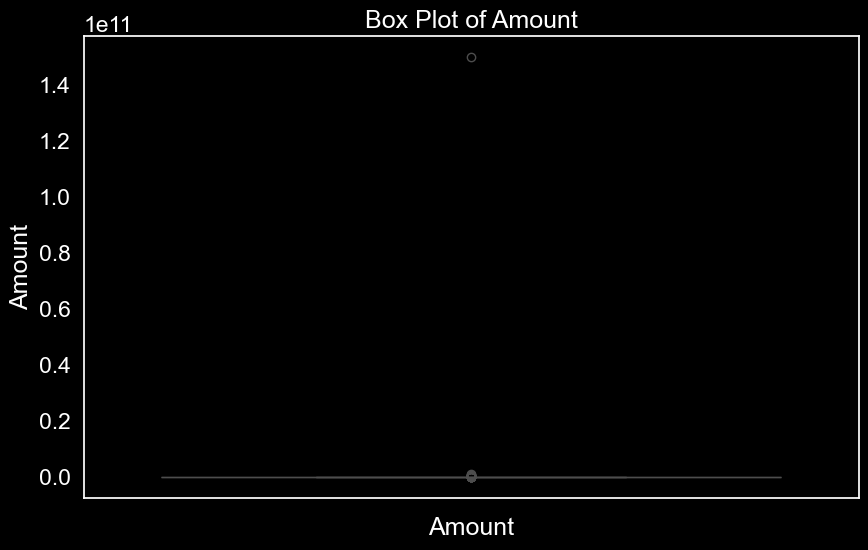

In [57]:
# Descriptive Statistics
print("Descriptive Statistics for 'Amount' column:")
print(cl_df2021['Amount'].describe())

# Skewness and Kurtosis
amount_skewness = skew(cl_df2021['Amount'])
amount_kurtosis = kurtosis(cl_df2021['Amount'])

print(f"\nSkewness for 'Amount' column: {amount_skewness}")
print(f"Kurtosis for 'Amount' column: {amount_kurtosis}")

# set theme
sns.set_theme(style="dark", palette="dark", font="sans-serif", font_scale=1.5)
plt.style.use("dark_background")
custom_palette = ["cyan", "magenta", "yellow"]

# Box Plot
plt.figure(figsize=(10, 6))
sns.boxplot(y=cl_df2021['Amount'], palette=custom_palette)
plt.title('Box Plot of Amount')
plt.xlabel('Amount')
plt.show()

***Drop all duplicates that have none in 'Stage' column***

In [58]:
# Separate rows with 'Debt' in the 'Stage' column
debt_rows = cl_df2021[cl_df2021['Stage'] == 'Debt']
non_debt_rows = cl_df2021[cl_df2021['Stage'] != 'Debt']

# Remove all duplicate rows based on the first 7 columns in non-debt rows, keeping the last occurrence
non_debt_rows.drop_duplicates(subset=non_debt_rows.columns[0:7], inplace=True, ignore_index=True, keep=False)

# Concatenate the debt and non-debt rows back together
cl_df2021 = pd.concat([non_debt_rows,debt_rows], ignore_index=True)

# Display info of Data Frame
cl_df2021.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1178 entries, 0 to 1177
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Company_Brand  1178 non-null   object 
 1   Founded        1177 non-null   float64
 2   HeadQuarter    1177 non-null   object 
 3   Sector         1178 non-null   object 
 4   What_it_does   1178 non-null   object 
 5   Founders       1174 non-null   object 
 6   Investor       1118 non-null   object 
 7   Amount         1029 non-null   float64
 8   Stage          769 non-null    object 
dtypes: float64(2), object(7)
memory usage: 83.0+ KB


**Based on Key Columns**

***Duplicated columns based on key columns after deletion  of duplicates***

In [59]:
# Check for number of duplicated values within the 'Company_Brand' column
dupl_count = cl_df2021.duplicated(subset=key_columns, keep=False).sum()

# Identify duplicate entries in the 'Company_Brand' column
dup_cl_21 = cl_df2021[cl_df2021.duplicated(subset=key_columns, keep=False)]

# Extract the list of duplicated company brands
unidup_cl_21 = dup_cl_21['Company_Brand'].unique()

# Display results
print(f"Number of duplicated values in 'Company_Brand' column: {dupl_count}")
print("\nList of duplicated company brands:")
print(unidup_cl_21)

Number of duplicated values in 'Company_Brand' column: 18

List of duplicated company brands:
['DealShare' 'BharatPe' 'Nazara Technologies' 'Spinny' 'KreditBee'
 'Euler Motors' 'Delhivery' 'Northern Arc']


***Duplicated columns only in list of duplicated company brands before deletion of duplicates***

In [60]:
# Create a set of the list of duplicated company brands based on key columns before deletion of duplicates
unidup_c1_21_values = set(unidup_c1_21)

# Create a set of the list of duplicated company brands based on key columns after deletion of duplicates
unidup_cl_21_values = set(unidup_cl_21)

# Find the values that only appear in the list of duplicated company brands before deletion of duplicates
values_only_in_unidup_c1_21 = unidup_c1_21_values - unidup_cl_21_values

# Display Results
print("Values only in list of duplicated company brands before deletion of duplicates:")
print(values_only_in_unidup_c1_21)

# Filter rows where 'Company_Brand' is 'Values only in list of duplicated company brands before deletion of duplicates'
values_only_in_unidup_c1_21_rows = cl_df2021[cl_df2021['Company_Brand'].isin(values_only_in_unidup_c1_21)]

# Filter 'values_only_in_unidup_c1_21_rows' based on the key columns
values_only_in_unidup_c1_21_rows[values_only_in_unidup_c1_21_rows.duplicated(subset=key_columns, keep=False)]

Values only in list of duplicated company brands before deletion of duplicates:
{'Trinkerr', 'PingoLearn', 'IsGoingOnline', 'Camp K12', 'ASQI Advisors', 'Fullife Healthcare', 'Curefoods', 'Elda Health', 'Kirana247', 'MPL', 'Evenflow Brands', "BYJU'S", 'TartanSense', 'NephroPlus', 'Zorro', 'FanPlay', 'Enmovil', 'Insurance Samadhan', 'NeoDocs', 'Unremot', 'Bewakoof', 'SuperGaming', 'Spry', 'Advantage Club', 'Ultraviolette', 'Sporjo', 'FanAnywhere', 'Ruptok', 'MasterChow'}


,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount,Stage


##### Handling Odd Entries and Irrelevant Data

**Drop companies founded before 1980 and after 2021**

In [61]:
# Drop rows where the 'founded' column has values less than 1980 or greater than 2021
cl_df2021 = cl_df2021[(cl_df2021['Founded'] >= 1980) & (cl_df2021['Founded'] <= 2021)].reset_index(drop=True)

# Display info of Data Frame
cl_df2021.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1175 entries, 0 to 1174
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Company_Brand  1175 non-null   object 
 1   Founded        1175 non-null   float64
 2   HeadQuarter    1174 non-null   object 
 3   Sector         1175 non-null   object 
 4   What_it_does   1175 non-null   object 
 5   Founders       1171 non-null   object 
 6   Investor       1115 non-null   object 
 7   Amount         1026 non-null   float64
 8   Stage          768 non-null    object 
dtypes: float64(2), object(7)
memory usage: 82.7+ KB


**Replacing and dropping odd locations**

In [62]:
def replace_odd_location(location):
    # Check if the location is None or not a string
    if location is None or not isinstance(location, str):
        return 'Not filled'
    
    # Check if the location contains '#REF!'
    if '#REF!' in location:
        return 'Not filled'
    
    # Check if the location contains 'India' or 'Asia'
    if 'India' in location:
        # Compile the regular expression for better performance if used multiple times
        regex = re.compile(r'([^,]+),')
        match = regex.match(location)
        if match:
            city = match.group(1).strip()
            # Ensure the extracted city is not "India" or ambiguous terms
            if city and city.lower() not in {'india', 'asia'}:
                return city
            else:
                return 'Not filled'  

    # Specific replacements
    if location == 'India, Asia':
        return 'Not filled'    
    if location == 'Small Towns, Andhra Pradesh':
        return 'Andhra Pradesh'
    if location == 'Uttar pradesh':
        return 'Uttar Pradesh'    
    if location == 'Faridabad, Haryana':
        return 'Faridabad'
    if location == 'Ahmadabad':
        return 'Ahmedabad'
    if location == 'Mountain View, CA':
        return 'Mountain View'
    if location == 'Tirunelveli, Tamilnadu':
        return 'Tirunelveli'
    if location == 'Jaipur, Rajastan':
        return 'Jaipur'
    if location == 'Dhingsara, Haryana':
        return 'Dhingsara'
    if location == 'Thiruvananthapuram':
        return 'Trivandrum'    
    if location == 'Samastipur, Bihar':
        return 'Samastipur'
    if location == 'Tumkur, Karnataka':
        return 'Tumkur'
    if location == 'Rajastan':
        return 'Rajasthan'
    if location == 'Warangal':
        return 'Warangal'
    if location == 'Hyderebad':
        return 'Hyderabad'
    if location == 'Banglore' or location == 'Bengaluru' or location == 'Bangalore City':
        return 'Bangalore'   
    if location == 'Frisco, Texas, United States':
        return 'Frisco'
    if location == 'New York, United States':
        return 'New York'
    if location == 'San Francisco, California, United States' or location == 'San Francisco, United States' or location == 'San Francisco Bay Area, Silicon Valley, West Coast' or location == 'San Francisco Bay Area, West Coast, Western US' or location == 'San Franciscao':
        return 'San Francisco'
    if location == 'San Ramon, California':
        return 'San Ramon'
    if location == 'Paris, Ile-de-France, France':
        return 'Paris'
    if location == 'Plano, Texas, United States':
        return 'Plano'
    if location == 'Sydney, New South Wales, Australia':
        return 'Sydney'
    if location == 'Milano, Lombardia, Italy':
        return 'Milan'
    if location == 'Palmwoods, Queensland, Australia':
        return 'Palmwoods'
    if location == 'Irvine, California, United States':
        return 'Irvine'
    if location == 'Newcastle Upon Tyne, Newcastle upon Tyne, United Kingdom':
        return 'Newcastle upon Tyne'
    if location == 'Shanghai, China':
        return 'Shanghai'
    if location == 'Jiaxing, Zhejiang, China':
        return 'Jiaxing'
    if location == 'Tangerang, Jawa Barat, Indonesia':
        return 'Tangerang'
    
    # A simple regex to identify locations with non-geographic content (basic approach)
    if re.search(r'\d', location) or re.search(r'[^a-zA-Z, ]', location) or len(location.split()) > 2:
        return 'Not filled'
    
    # A list of non-geographic keywords
    non_geographic_keywords = ['Computer Games', 'Food & Beverages', 'Pharmaceuticals', 'Online Media', 'Information Technology & Services', 'Santra']
    
    # Check if location is in the list of non-geographic keywords
    if location in non_geographic_keywords:
        return 'Not filled'
    
    return location

# Replace non-geographic odd entries in the 'HeadQuarter' column
cl_df2021['HeadQuarter'] = cl_df2021['HeadQuarter'].apply(replace_odd_location)

# Replace 'Bengaluru' and 'Bangalore City' with 'Bangalore' in the 'HeadQuarter' column
cl_df2021['HeadQuarter'] = cl_df2021['HeadQuarter'].replace({'Bengaluru': 'Bangalore', 'Bangalore City': 'Bangalore'})

# List of entries to drop
entries_to_drop21 = ['Beijing', 'New York', 'Mountain View', 'London']

# Drop rows where 'HeadQuarter' contains any of the entries in the list
cl_df2021 = cl_df2021[~cl_df2021['HeadQuarter'].isin(entries_to_drop21)].reset_index(drop=True)

# Display info of Data Frame
cl_df2021.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1171 entries, 0 to 1170
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Company_Brand  1171 non-null   object 
 1   Founded        1171 non-null   float64
 2   HeadQuarter    1171 non-null   object 
 3   Sector         1171 non-null   object 
 4   What_it_does   1171 non-null   object 
 5   Founders       1167 non-null   object 
 6   Investor       1112 non-null   object 
 7   Amount         1023 non-null   float64
 8   Stage          767 non-null    object 
dtypes: float64(2), object(7)
memory usage: 82.5+ KB


**Redistributing entries in sector column**

In [63]:
# Dictionary for common misspellings and inconsistencies
replacement_dict = {
    "Helathcare": "healthcare",
    "Healtcare": "healthcare",
    "Heathcare": "healthcare",
    "HeathTech": "healthtech",
    "Med Tech": "medtech",
    "Information Technology & Services": "it",
    "Manufacturing": "electronics manufacturing",
    "Company-as-a-Service": "caas",
    "Telecommuncation": "telecommunication",
    "HeathTech": "healthTech",
    "Deep Tech": "deeptech",
    "Deep Tech AI": "deeptech",
    "HR Tech": "hrtech",
    "HR tech": "hrtech",
    "HR": "Human Resource",
    "Insurtech": "insuretech",
    "Tech company": "tech",
    "Tech hub": "tech",
    "Tech Platform": "tech",
    "Techonology": "technology",
    "Travel Tech": "traveltech",
    "Travel tech": "traveltech",
    "Travel": "traveltech",
    "Coworking": "co-working",
    "E store": "estore",
    "Deisgning": "designing",
    "Data Science": "datasc",
    "Cloud company": "cloudcmp",
    "Multinational conglomerate company": "multiconglom",
    "Entreprenurship": "Entrepreneurship",
    "Ad-tech": "adtech",
    "E-connect": "econnect",
    "Aero company": "aerial",
    "Aero company": "aerial",
    "Agri tech": "agritech",
    "Soil-Tech": "soiltech",
    "Customer service company": "custsvc",
    "Service industry": "servindust",
    "EdtTech": "edtech",
    "API platform": "api",
    "Hygiene management": "hygienement",
    "Appliance": "appenergy",
    "Data Intelligence": "dataintel",
    "Auto-tech": "autotech",
    "Life sciences": "lifesci",
    "Mobile Payments": "mobpay",
    "Apps": "ap_s",
    "Packaging Services": "pksrv",
    "Reading Apps": "readapp",
    "Mobile": "mbl",
    "Wealth Management": "wlthman"
    }

# Replace sector names based on the dictionary
cl_df2021['Sector'] = cl_df2021['Sector'].replace(replacement_dict)


def sector_redistribution(sector):
    if sector is None or not isinstance(sector, str):
        return 'Not filled'
    # Handle specific cases for sectors that should be marked as 'Not filled'
    if sector in ['Manchester, Greater Manchester', 'Hauz Khas', '—']:
        return 'Not filled'
           
    # Remove leading and trailing whitespace
    sector = sector.strip()

    # Redistribute sectors into broader categories based on keywords  
    if re.search(r'banking|fintech|financial|finance|insurance|investment|crypto|advisory|venture|capital|blockchain|insuretech|escrow|taxation|funds|mobpay|wlthman', sector, re.IGNORECASE):
        return 'Finance and Technology'
    elif re.search(r'agriculture|farming|agritech|fishery|agritech|soiltech', sector, re.IGNORECASE):
        return 'Agriculture and Technology'
    elif re.search(r'education|edtech|e-learning|innovation|readapp', sector, re.IGNORECASE):
        return 'Education and Learning'
    elif re.search(r'health|medical|wellness|medtech|hygiene|ayurveda|lifesci', sector, re.IGNORECASE):
        return 'Healthcare and Health Technology'
    elif re.search(r'e-commerce|retail|d2c|b2b|commerce|business|sales|product|wholesale|trading|Jewellery', sector, re.IGNORECASE):
        return 'E-commerce and Retail'
    elif re.search(r'consumer|food|beverage|gaming|hospitality|cosmetics|games|pet|beauty|lifestyle|cannabis|milk|personal|tobacco|delivery|wine|femtech|estore|beer|custsvc', sector, re.IGNORECASE):
        return 'Consumer Goods and Services'
    elif re.search(r'industrial|automation|telecommunication|electronics|drone|pksrv', sector, re.IGNORECASE):
        return 'Technology Solutions for Industry'   
    elif re.search(r'renewable|environment|solar|energy|pollution|purification|cleantech|nanotechnology|ev|multiconglom|hygienement|appenergy|dataintel', sector, re.IGNORECASE):
        return 'Energy and Environment'    
    elif re.search(r'automotive|vehicle|automobile|battery|moeving|tyre|autotech', sector, re.IGNORECASE):
        return 'Automotive'    
    elif re.search(r'human|consulting|job|video|information|legal|staffing|coaching|hrtech|fulfillment|consultancy|crowdsourcing', sector, re.IGNORECASE):
        return 'Human Resources and Consultancy'
    elif re.search(r'transport|logistics|location|traveltech|distribution|aerial|wl|navigation', sector, re.IGNORECASE):
        return 'Transport and Logistics'
    elif re.search(r'marketing|advertisement|content|storytelling|analytics|adtech', sector, re.IGNORECASE):
        return 'Marketing and Advertising'    
    elif re.search(r'tech|software|saas|ai|it|internet|ar|crm|robotics|iot|mlops|translation|computer|caas|fmcg|proptech|designing|datasc|cloudcmp|scanning|deeptech|servindust|api|mbl', sector, re.IGNORECASE):
        return 'Technology and Software'
    elif re.search(r'media|music|sports|nft|arts|podcast|audio|blogging|ott|publication|econnect|fm|ap_s', sector, re.IGNORECASE):
        return 'Media and Entertainment'
    elif re.search(r'estate|rental|design|accomodation|housing|co-living', sector, re.IGNORECASE):
        return 'Real Estate and Housing'
    elif re.search(r'fashion|eyewear|textiles|clothing|footwear|merchandise|eyeglasses', sector, re.IGNORECASE):
        return 'Fashion and Apparel'
    elif re.search(r'construction|home|decor', sector, re.IGNORECASE):
        return 'Construction and Home Services'
    elif re.search(r'dating|matrimony|networking|social|co-working|wedding', sector, re.IGNORECASE):
        return 'Social Networking'
    elif re.search(r'cultural|tourism', sector, re.IGNORECASE):
        return 'Cultural and Tourism'
    elif re.search(r'space|aviation|defense', sector, re.IGNORECASE):
        return 'Defence and Aviation'
    elif re.search(r'entrepreneurship', sector, re.IGNORECASE):
        return 'Entrepreneurship and Business Incubation'        
    else:
        return sector

# Apply sector redistribution function to 'Sector' column
cl_df2021['Sector'] = cl_df2021['Sector'].apply(sector_redistribution)

# Get the value counts for the 'Sector' column
sector_counts = cl_df2021['Sector'].value_counts()

# Display results
print(sector_counts)

Sector
Finance and Technology               219
Technology and Software              212
Consumer Goods and Services          131
Education and Learning               131
Healthcare and Health Technology     112
E-commerce and Retail                 92
Transport and Logistics               37
Automotive                            35
Human Resources and Consultancy       34
Media and Entertainment               33
Energy and Environment                27
Agriculture and Technology            26
Technology Solutions for Industry     20
Real Estate and Housing               17
Fashion and Apparel                   10
Marketing and Advertising             10
Social Networking                      9
Construction and Home Services         8
Defence and Aviation                   4
Not filled                             2
Cultural and Tourism                   2
Name: count, dtype: int64


**Filling 'Amount' Column with values that were accidentally filled in adjacent columns**

***Based on 'Investor' Column***

In [64]:
def matches_pattern(entry):
    if pd.isna(entry):
        return False
    if '\t#REF!' in entry:
        return True
    return bool(re.match(r'^\$[0-9]{1,}$', entry))

# Apply the function to filter the DataFrame
filter1_cl_df2021 = cl_df2021[
    (cl_df2021['Amount'].isna()) &
    (cl_df2021['Investor'].apply(matches_pattern) |
     cl_df2021['Investor'].isin(['#REF!', '$Undisclosed']))
]

# Display results
filter1_cl_df2021


,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount,Stage
225,Fullife Healthcare,2009.0,Not filled,Healthcare and Health Technology,Varun Khanna,Morgan Stanley Private Equity Asia,$22000000,NaN,None
226,MoEVing,2021.0,Not filled,Energy and Environment,"Vikash Mishra, Mragank Jain","Anshuman Maheshwary, Dr Srihari Raju Kalidindi",$5000000,NaN,None
499,AdmitKard,2016.0,Noida,Education and Learning,A tech solution for end to end career advisory...,"Vamsi Krishna, Pulkit Jain, Gaurav Munjal\t#REF!",$1000000,NaN,None
1037,Sochcast,2020.0,Not filled,Media and Entertainment,"CA Harvinderjit Singh Bhatia, Garima Surana, A...","Vinners, Raj Nayak, Amritaanshu Agrawal",$Undisclosed,NaN,None
1084,Godamwale,2016.0,Mumbai,Transport and Logistics,Godamwale is tech enabled integrated logistics...,"Basant Kumar, Vivek Tiwari, Ranbir Nandan",1000000\t#REF!,NaN,None


In [65]:
# Fill the Amount column with values from the Investor column in the filtered rows
cl_df2021.loc[filter1_cl_df2021.index, 'Amount'] = cl_df2021.loc[filter1_cl_df2021.index, 'Investor']

# Filter out specific rows using iloc
cl_df2021.iloc[cl_df2021.index.isin([225, 226, 499, 1037, 1084])]

,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount,Stage
225,Fullife Healthcare,2009.0,Not filled,Healthcare and Health Technology,Varun Khanna,Morgan Stanley Private Equity Asia,$22000000,$22000000,None
226,MoEVing,2021.0,Not filled,Energy and Environment,"Vikash Mishra, Mragank Jain","Anshuman Maheshwary, Dr Srihari Raju Kalidindi",$5000000,$5000000,None
499,AdmitKard,2016.0,Noida,Education and Learning,A tech solution for end to end career advisory...,"Vamsi Krishna, Pulkit Jain, Gaurav Munjal\t#REF!",$1000000,$1000000,None
1037,Sochcast,2020.0,Not filled,Media and Entertainment,"CA Harvinderjit Singh Bhatia, Garima Surana, A...","Vinners, Raj Nayak, Amritaanshu Agrawal",$Undisclosed,$Undisclosed,None
1084,Godamwale,2016.0,Mumbai,Transport and Logistics,Godamwale is tech enabled integrated logistics...,"Basant Kumar, Vivek Tiwari, Ranbir Nandan",1000000\t#REF!,1000000\t#REF!,None


In [66]:
def replace_odd_investor(investor):
    # Check if the investor is None, not a string, or a missing value
    if investor is None or not isinstance(investor, str) or pd.isna(investor):
        return 'Not filled'
    
    # Check if the investor contains '#REF!' 
    if '\t#REF!' in investor:
        return 'Not filled'
    
    # Check for entries containing unusual special characters and a word count less than 2
    special_characters = ['#REF!', '$']
    if any(char in investor for char in special_characters) and len(investor.split()) < 2:
        return 'Not filled'
    
    # Check for entries that include a string pattern like $xxxxxxxxxxxx
    if re.match(r'^\$[0-9]{1,}$', investor):
        return 'Not filled'
    
    return investor

# Replace odd entries in the 'Investor' column
cl_df2021['Investor'] = cl_df2021['Investor'].apply(replace_odd_investor)

# Filter out specific rows using iloc
cl_df2021.iloc[cl_df2021.index.isin([225, 226, 499, 1037, 1084])]

,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount,Stage
225,Fullife Healthcare,2009.0,Not filled,Healthcare and Health Technology,Varun Khanna,Morgan Stanley Private Equity Asia,Not filled,$22000000,None
226,MoEVing,2021.0,Not filled,Energy and Environment,"Vikash Mishra, Mragank Jain","Anshuman Maheshwary, Dr Srihari Raju Kalidindi",Not filled,$5000000,None
499,AdmitKard,2016.0,Noida,Education and Learning,A tech solution for end to end career advisory...,"Vamsi Krishna, Pulkit Jain, Gaurav Munjal\t#REF!",Not filled,$1000000,None
1037,Sochcast,2020.0,Not filled,Media and Entertainment,"CA Harvinderjit Singh Bhatia, Garima Surana, A...","Vinners, Raj Nayak, Amritaanshu Agrawal",Not filled,$Undisclosed,None
1084,Godamwale,2016.0,Mumbai,Transport and Logistics,Godamwale is tech enabled integrated logistics...,"Basant Kumar, Vivek Tiwari, Ranbir Nandan",Not filled,1000000\t#REF!,None


***Based on 'Stage' Column***

In [67]:
# Apply the function to filter the DataFrame
filter2_cl_df2021 = cl_df2021[
    (cl_df2021['Amount'].isna()) &
    (cl_df2021['Stage'].apply(matches_pattern))
]

# Display results
filter2_cl_df2021

,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount,Stage
94,FanPlay,2020.0,Not filled,Consumer Goods and Services,A real money game app specializing in trivia g...,YC W21,"Pritesh Kumar, Bharat Gupta",NaN,$1200000
492,Little Leap,2020.0,New Delhi,Education and Learning,Soft Skills that make Smart Leaders,Holistic Development Programs for children in ...,Vishal Gupta,NaN,$300000
505,BHyve,2020.0,Mumbai,Human Resources and Consultancy,A Future of Work Platform for diffusing Employ...,Backed by 100x.VC,"Omkar Pandharkame, Ketaki Ogale",NaN,$300000
625,MYRE Capital,2020.0,Mumbai,Real Estate and Housing,Democratising Real Estate Ownership,Own rent yielding commercial properties,Aryaman Vir,NaN,$6000000
628,Saarthi Pedagogy,2015.0,Ahmedabad,Education and Learning,"India's fastest growing Pedagogy company, serv...",Pedagogy,Sushil Agarwal,NaN,$1000000


In [68]:
# Fill the Amount column with values from the Stage column in the filtered rows
cl_df2021.loc[filter2_cl_df2021.index, 'Amount'] = cl_df2021.loc[filter2_cl_df2021.index, 'Stage']

# Filter out specific rows using iloc
cl_df2021.iloc[cl_df2021.index.isin([94, 492, 505, 625, 628])]

,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount,Stage
94,FanPlay,2020.0,Not filled,Consumer Goods and Services,A real money game app specializing in trivia g...,YC W21,"Pritesh Kumar, Bharat Gupta",$1200000,$1200000
492,Little Leap,2020.0,New Delhi,Education and Learning,Soft Skills that make Smart Leaders,Holistic Development Programs for children in ...,Vishal Gupta,$300000,$300000
505,BHyve,2020.0,Mumbai,Human Resources and Consultancy,A Future of Work Platform for diffusing Employ...,Backed by 100x.VC,"Omkar Pandharkame, Ketaki Ogale",$300000,$300000
625,MYRE Capital,2020.0,Mumbai,Real Estate and Housing,Democratising Real Estate Ownership,Own rent yielding commercial properties,Aryaman Vir,$6000000,$6000000
628,Saarthi Pedagogy,2015.0,Ahmedabad,Education and Learning,"India's fastest growing Pedagogy company, serv...",Pedagogy,Sushil Agarwal,$1000000,$1000000


In [69]:
def replace_odd_stage(stage):
    # Check if the stage is not missing and matches a specific pattern like $xxxxxxxxxxxx
    if pd.notna(stage) and re.match(r'^\$[0-9]{1,}$', stage):
        return np.NaN
    
    return stage

# Replace odd entries in the 'Stage' column
cl_df2021['Stage'] = cl_df2021['Stage'].apply(replace_odd_stage)

# Filter out specific rows using iloc
cl_df2021.iloc[cl_df2021.index.isin([94, 492, 505, 625, 628])]

,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount,Stage
94,FanPlay,2020.0,Not filled,Consumer Goods and Services,A real money game app specializing in trivia g...,YC W21,"Pritesh Kumar, Bharat Gupta",$1200000,NaN
492,Little Leap,2020.0,New Delhi,Education and Learning,Soft Skills that make Smart Leaders,Holistic Development Programs for children in ...,Vishal Gupta,$300000,NaN
505,BHyve,2020.0,Mumbai,Human Resources and Consultancy,A Future of Work Platform for diffusing Employ...,Backed by 100x.VC,"Omkar Pandharkame, Ketaki Ogale",$300000,NaN
625,MYRE Capital,2020.0,Mumbai,Real Estate and Housing,Democratising Real Estate Ownership,Own rent yielding commercial properties,Aryaman Vir,$6000000,NaN
628,Saarthi Pedagogy,2015.0,Ahmedabad,Education and Learning,"India's fastest growing Pedagogy company, serv...",Pedagogy,Sushil Agarwal,$1000000,NaN


***Converting the 'Amount' column to float***

In [70]:
# Apply the 'convert_to_float' function to each element in the "Amount" column
cl_df2021['Amount'] = cl_df2021['Amount'].apply(lambda x: convert_to_float(re.sub(r'[^\d.]', '', str(x))))

# Check the data type of the "Amount" column
print("Data type of 'Amount' column after conversion:", cl_df2021['Amount'].dtype)

# Filter out specific rows using iloc
cl_df2021.iloc[cl_df2021.index.isin([94, 225, 226, 492, 499, 505, 625, 628, 1037, 1084])]

Data type of 'Amount' column after conversion: float64


,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount,Stage
94,FanPlay,2020.0,Not filled,Consumer Goods and Services,A real money game app specializing in trivia g...,YC W21,"Pritesh Kumar, Bharat Gupta",1200000.0,NaN
225,Fullife Healthcare,2009.0,Not filled,Healthcare and Health Technology,Varun Khanna,Morgan Stanley Private Equity Asia,Not filled,22000000.0,None
226,MoEVing,2021.0,Not filled,Energy and Environment,"Vikash Mishra, Mragank Jain","Anshuman Maheshwary, Dr Srihari Raju Kalidindi",Not filled,5000000.0,None
492,Little Leap,2020.0,New Delhi,Education and Learning,Soft Skills that make Smart Leaders,Holistic Development Programs for children in ...,Vishal Gupta,300000.0,NaN
499,AdmitKard,2016.0,Noida,Education and Learning,A tech solution for end to end career advisory...,"Vamsi Krishna, Pulkit Jain, Gaurav Munjal\t#REF!",Not filled,1000000.0,None
505,BHyve,2020.0,Mumbai,Human Resources and Consultancy,A Future of Work Platform for diffusing Employ...,Backed by 100x.VC,"Omkar Pandharkame, Ketaki Ogale",300000.0,NaN
625,MYRE Capital,2020.0,Mumbai,Real Estate and Housing,Democratising Real Estate Ownership,Own rent yielding commercial properties,Aryaman Vir,6000000.0,NaN
628,Saarthi Pedagogy,2015.0,Ahmedabad,Education and Learning,"India's fastest growing Pedagogy company, serv...",Pedagogy,Sushil Agarwal,1000000.0,NaN
1037,Sochcast,2020.0,Not filled,Media and Entertainment,"CA Harvinderjit Singh Bhatia, Garima Surana, A...","Vinners, Raj Nayak, Amritaanshu Agrawal",Not filled,NaN,None
1084,Godamwale,2016.0,Mumbai,Transport and Logistics,Godamwale is tech enabled integrated logistics...,"Basant Kumar, Vivek Tiwari, Ranbir Nandan",Not filled,1000000.0,None


***Drop row with outlier (maximum value)***

In [71]:
# Find the index label of the row with the maximum value in the 'Amount' column
max_amount_index = cl_df2021['Amount'].idxmax()

# Drop the row using the index label
cl_df2021 = cl_df2021.drop(max_amount_index).reset_index(drop=True)

# Check DataFrame information
cl_df2021.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1170 entries, 0 to 1169
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Company_Brand  1170 non-null   object 
 1   Founded        1170 non-null   float64
 2   HeadQuarter    1170 non-null   object 
 3   Sector         1170 non-null   object 
 4   What_it_does   1170 non-null   object 
 5   Founders       1166 non-null   object 
 6   Investor       1170 non-null   object 
 7   Amount         1031 non-null   float64
 8   Stage          761 non-null    object 
dtypes: float64(2), object(7)
memory usage: 82.4+ KB


**Replacing odd founders**

In [72]:
def replace_odd_founders(founders):
    if None or not isinstance(founders, str):
        return 'Not filled'  
    
    special_characters = ['#REF!','$']  
    if any(char in founders for char in special_characters) and len(founders.split()) < 2:
        return 'Not filled'
    
    # Regular expression pattern to match string pattern like $xxxxxxxxxxxx
    if re.match(r'^\$[0-9]{1,}$', founders):
        return 'Not filled'  
    
    return founders  

# Apply the function to replace odd entries in the 'Founders' column
cl_df2021['Founders'] = cl_df2021['Founders'].apply(replace_odd_founders)

# Display information
cl_df2021.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1170 entries, 0 to 1169
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Company_Brand  1170 non-null   object 
 1   Founded        1170 non-null   float64
 2   HeadQuarter    1170 non-null   object 
 3   Sector         1170 non-null   object 
 4   What_it_does   1170 non-null   object 
 5   Founders       1170 non-null   object 
 6   Investor       1170 non-null   object 
 7   Amount         1031 non-null   float64
 8   Stage          761 non-null    object 
dtypes: float64(2), object(7)
memory usage: 82.4+ KB


**Redistributing entries in 'Stage' column**

In [73]:
# Define a dictionary to map misspellings and inconsistencies to their corrected forms
corrections = {
    "Seies A": "Series A",
    "PE": "Private Equity",
    "Bridge Round": "Bridge",
    "Corperate Round": "Corporate Round"    
}

# Use the replace() method with the corrections dictionary
cl_df2021['Stage'] = cl_df2021['Stage'].replace(corrections, regex=True)

def replace_stage(stage):
    # Check if the stage is not missing and matches a specific pattern like $xxxxxxxxxxxx
    if pd.notna(stage):

        # Regular expression to detect URLs containing "http" and ".com"
        url_pattern = re.compile(r'https?://\S+\.com\S*')

        # Check if the stage matches the URL pattern
        if url_pattern.match(stage):
            return np.nan
           
        stage = str(stage).strip().lower()  
        
        if stage in [
            'pre-seed', 'early seed', 'pre-seed round', 'pre-seed', 'pre seed round', 'pre seed round', 'seed fund'
        ]:
            return 'Ideation'
        if stage in [
            'pre-series', 'pre-series a', 'pre-series a1', 'seed', 'seed+', 'pre series a', 'pre- series a', 
            'seed round', 'seed round', 'seed funding', 'pre-series a', 'bridge round', 'seed investment', 
            'seed round & series a', 'seed a', 'pre series a', 'pre series a1', 'seed funding'
        ]:
            return 'Validation'
        if stage in ['series a', 'series a+', 'series a2', 'series a-1', 'pre-series b', 'pre series b', 'pre-series b']:
            return 'Early Traction'
        if stage in [
            'series b', 'series b3', 'series b2', 'series c', 'series d', 'series d1', 'series e', 'series f', 'series f1', 'post series a', 
            'series f2', 'series g', 'series h', 'series i', 'mid series', 'series c, d', 'pre-series c', 'series e2', 'pre series c', 'series b+'
        ]:
            return 'Scaling'
        if stage in [
            'angel', 'angel round', 'corporate round', 'venture - series unknown', 'post-ipo equity', 'private equity'
        ]:
            return 'Equity'
        if stage in [
            'debt', 'debt financing', 'post-ipo debt'
        ]:        
            return 'Debt'
        if stage in [
            'grant', 'non-equity assistance'
        ]:        
            return 'Non-Equity'

        if stage in [
            'secondary market'
        ]:        
            return 'Market Transactions'

        stage = str(stage).title()

        if stage in ['Funding Round', 'Undisclosed', 'Edge', 'Fresh Funding']:
            return np.nan

    return stage

# Replace stages in the DataFrame
cl_df2021['Stage'] = cl_df2021['Stage'].apply(replace_stage)

# Get the value counts for the 'Stage' column
stage_counts21 = cl_df2021['Stage'].value_counts()

# Display results
print(stage_counts21)

Stage
Validation        400
Scaling           146
Early Traction    138
Ideation           48
Debt               26
Bridge              2
Equity              1
Name: count, dtype: int64


##### Handling Missing Values

**Check missing values**

In [74]:
# Determine the proportion of missing values
missing_cl_df2021_st = (cl_df2021.isnull().mean() * 100).round(2)

# Display Results
print("Proportion of missing values in 2021 data:")
print()
print(missing_cl_df2021_st)

Proportion of missing values in 2021 data:

Company_Brand     0.00
Founded           0.00
HeadQuarter       0.00
Sector            0.00
What_it_does      0.00
Founders          0.00
Investor          0.00
Amount           11.88
Stage            34.96
dtype: float64


**Group by Stage and determine the mean, median and mode amounts**

In [75]:
# Calculate mean, median, and mode amounts by stage
mean_amounts21 = cl_df2021.groupby('Stage')['Amount'].mean()
median_amounts21 = cl_df2021.groupby('Stage')['Amount'].median()
mode_amounts21 = cl_df2021.groupby('Stage')['Amount'].apply(lambda x: x.mode().iloc[0] if not x.mode().empty else None)

# Display results
print("Mean Amounts by Stage:")
print(mean_amounts21)

print("\nMedian Amounts by Stage:")
print(median_amounts21)

print("\nMode Amounts by Stage:")
print(mode_amounts21)


Mean Amounts by Stage:
Stage
Bridge            5.000000e+05
Debt              1.266154e+07
Early Traction    1.217847e+07
Equity            1.000000e+08
Ideation          7.010811e+05
Scaling           8.659931e+07
Validation        2.956782e+06
Name: Amount, dtype: float64

Median Amounts by Stage:
Stage
Bridge               500000.0
Debt                6000000.0
Early Traction      6500000.0
Equity            100000000.0
Ideation             340000.0
Scaling            48000000.0
Validation          1200000.0
Name: Amount, dtype: float64

Mode Amounts by Stage:
Stage
Bridge               500000.0
Debt               10000000.0
Early Traction      5000000.0
Equity            100000000.0
Ideation             300000.0
Scaling            30000000.0
Validation          1000000.0
Name: Amount, dtype: float64


**Univariate Analysis of the 'Amount' Column**

Descriptive Statistics for 'Amount' column:
count    1.031000e+03
mean     2.777607e+07
std      8.086648e+07
min      1.000000e+04
25%      1.000000e+06
50%      3.500000e+06
75%      1.500000e+07
max      1.000000e+09
Name: Amount, dtype: float64

Skewness for 'Amount' column: nan
Kurtosis for 'Amount' column: nan


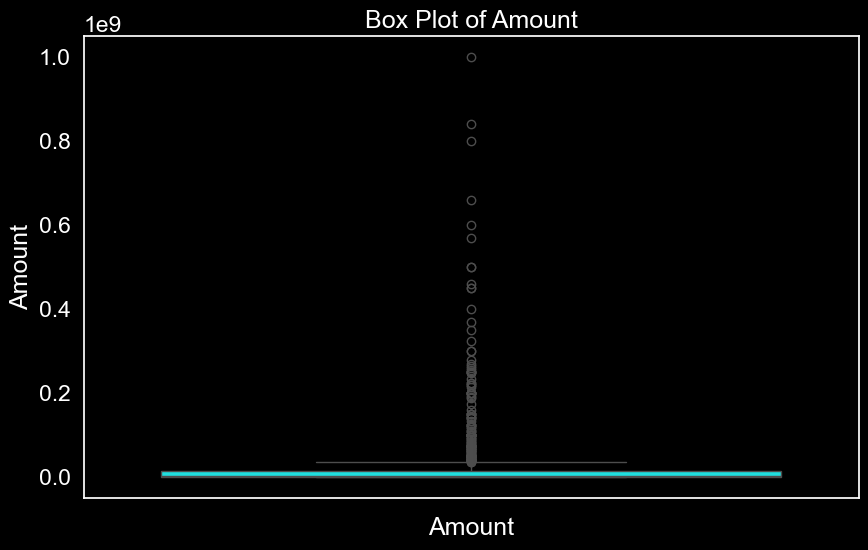

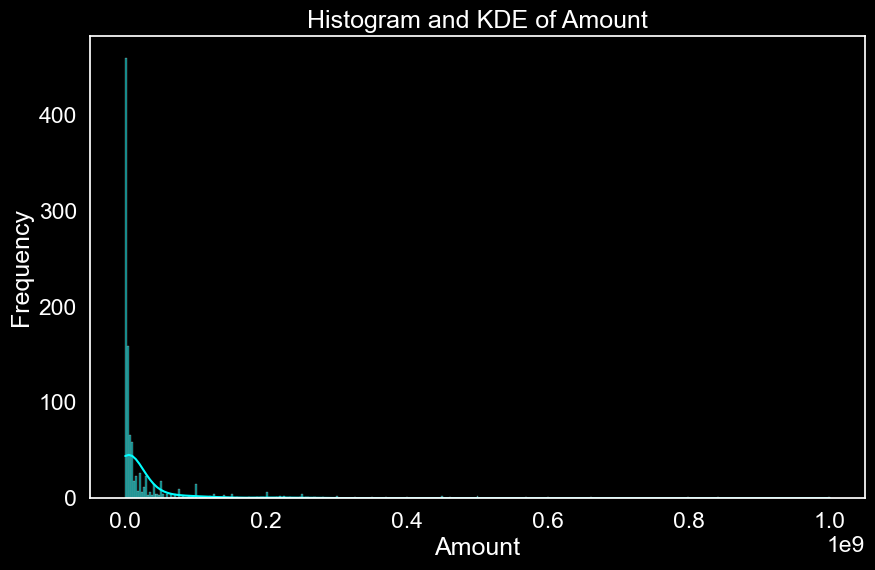

In [76]:
# Descriptive Statistics
print("Descriptive Statistics for 'Amount' column:")
print(cl_df2021['Amount'].describe())

# Skewness and Kurtosis
amount_skewness21 = skew(cl_df2021['Amount'])
amount_kurtosis21 = kurtosis(cl_df2021['Amount'])

print(f"\nSkewness for 'Amount' column: {amount_skewness21}")
print(f"Kurtosis for 'Amount' column: {amount_kurtosis21}")

# set theme
sns.set_theme(style="dark", palette="dark", font="sans-serif", font_scale=1.5)
plt.style.use("dark_background")
custom_palette = ["cyan", "magenta", "yellow"]

# Box Plot
plt.figure(figsize=(10, 6))
sns.boxplot(y=cl_df2021['Amount'], palette=custom_palette)
plt.title('Box Plot of Amount')
plt.xlabel('Amount')
plt.show()

# Histogram with KDE Plot
plt.figure(figsize=(10, 6))
sns.histplot(cl_df2021['Amount'], kde=True, color='cyan')
plt.title('Histogram and KDE of Amount')
plt.xlabel('Amount')
plt.ylabel('Frequency')
plt.show()

**Filling missing values in 'Stage' column**

`Comment`

The numerical values in the 'Amount' column exhibit outliers, making median imputation a more suitable method for addressing missing values. The robustness of the median against outliers ensures that the imputation process is not skewed by extreme values, thus preserving the dataset's integrity. Furthermore, distinct median values observed across different stages support the preference for median imputation, as it accurately reflects the central tendency within each group.

It is important to note that the imputation strategy is designed to fill missing values in the stage column with stage groups based on the median values derived from each stage, which differs from using the mode of the stage column to fill missing values, a common approach for categorical data.

Conversely, if the 'Amount' data were devoid of outliers, mean imputation would be appropriate for handling missing numerical values due to its simplicity and effectiveness in symmetrical distributions. As mentioned earlier for categorical data, mode imputation would be the preferred method, utilizing the most frequently occurring category to maintain the distributional characteristics of the dataset. Although the calculated mean and mode values illustrate these alternative methods, given the current data characteristics, median imputation remains the optimal choice.

In [77]:
# Define a function to fill missing stages based on median amounts
def fill_missing_stage21(row):
    if pd.isna(row['Stage']):
        for stage, median in median_amounts21.items():
            if row['Amount'] <= median:
                return stage
        return pd.NA  # Default to NaN if no condition matches
    return row['Stage']

# Apply the function to fill missing stages
cl_df2021['Stage'] = cl_df2021.apply(fill_missing_stage21, axis=1)

# Display information
cl_df2021.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1170 entries, 0 to 1169
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Company_Brand  1170 non-null   object 
 1   Founded        1170 non-null   float64
 2   HeadQuarter    1170 non-null   object 
 3   Sector         1170 non-null   object 
 4   What_it_does   1170 non-null   object 
 5   Founders       1170 non-null   object 
 6   Investor       1170 non-null   object 
 7   Amount         1031 non-null   float64
 8   Stage          1075 non-null   object 
dtypes: float64(2), object(7)
memory usage: 82.4+ KB


In [78]:
# Filter the rows where 'Stage' is missing
filter_min21_df = cl_df2021[cl_df2021['Stage'].isna()]

# Find the minimum 'Amount' value in the filtered DataFrame
filter_min21_amount = filter_min21_df['Amount'].min()

# Print the minimum 'Amount' value
print('The minimum amount value in the filtered dataframe is:', filter_min21_amount)

The minimum amount value in the filtered dataframe is: 110000000.0


`Comment`

Based on exploratory analysis of the 'Amount' column within the dataset above, it has been ascertained that the recorded minimum value stands at 110,000,000. Consequently, the imputation strategy for missing values in the 'Stage' column entails identifying the stage category whose median amount value closely approximates this observed minimum, while ensuring exclusion of categories labeled as 'debt', 'bridge', 'market transactions', 'equity' or 'non-equity'.

Upon meticulous examination of the dataset, it has been established that the 'Scaling' stage category exhibits the nearest median amount value (48,000,000) to the aforementioned minimum amount. Thus, as an integral part of the imputation process, the missing entries in the 'Stage' column meeting the criterion of possessing a non-null float entry in the corresponding 'Amount' column will be substituted with the 'Scaling' stage category. This aligns with the predefined criteria for selection and ensures coherence in the imputation procedure.

In [79]:
def fill_missing_stage_scl(row):
    if pd.isna(row['Stage']):  # Checking if 'Stage' column is NaN
        if pd.notna(row['Amount']):  # Checking if 'Amount' column is not NaN
            return 'Scaling'
    return row['Stage']

# Apply the function to fill missing stages
cl_df2021['Stage'] = cl_df2021.apply(fill_missing_stage_scl, axis=1)

# Display information
cl_df2021.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1170 entries, 0 to 1169
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Company_Brand  1170 non-null   object 
 1   Founded        1170 non-null   float64
 2   HeadQuarter    1170 non-null   object 
 3   Sector         1170 non-null   object 
 4   What_it_does   1170 non-null   object 
 5   Founders       1170 non-null   object 
 6   Investor       1170 non-null   object 
 7   Amount         1031 non-null   float64
 8   Stage          1104 non-null   object 
dtypes: float64(2), object(7)
memory usage: 82.4+ KB


**Filling missing values in 'Amount' column**

`Comment`

In the task of filling missing values in the 'Amount' column, multiple imputation emerges as a superior choice over KNN imputation due to its robustness, adaptability, and modeling capabilities. Multiple imputation, by modeling the entire distribution of the data, exhibits heightened resilience to outliers compared to KNN imputation, which is sensitive to outlier influence owing to its reliance on distance metrics. Furthermore, the suitability of multiple imputation extends to scenarios where missing data follows either a missing at random (MAR) or missing completely at random (MCAR) pattern, as it can effectively model various missing data mechanisms using observed data. In contrast, while KNN imputation excels in scenarios of localized missing data patterns, its assumption of local similarity may lead to suboptimal imputations in more complex or non-localized missing data scenarios.

In [80]:
# Select only the columns with missing values
X_missing21 = cl_df2021[['Amount']]  

# Initialize IterativeImputer
multiple_imputer = IterativeImputer(max_iter=10, random_state=0)  

# Fit and transform the data, and fill missing values directly in the DataFrame
cl_df2021[['Amount']] = multiple_imputer.fit_transform(X_missing21)  

# Display DataFrame information
cl_df2021.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1170 entries, 0 to 1169
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Company_Brand  1170 non-null   object 
 1   Founded        1170 non-null   float64
 2   HeadQuarter    1170 non-null   object 
 3   Sector         1170 non-null   object 
 4   What_it_does   1170 non-null   object 
 5   Founders       1170 non-null   object 
 6   Investor       1170 non-null   object 
 7   Amount         1170 non-null   float64
 8   Stage          1104 non-null   object 
dtypes: float64(2), object(7)
memory usage: 82.4+ KB


**Complete filling missing values in 'Stage' column**

In [81]:
# Find indices of missing values in the original 'Amount' column
missing_indices21 = np.where(X_missing21.isna())[0]

# Extract unique imputed values using indices
cl_df2021_imputed = (cl_df2021.iloc[missing_indices21]['Amount']).unique()

# Print the unique imputed values
print(cl_df2021_imputed)

[27776067.89524733]


`Comment`

The imputation process has yielded a unique value of 27,776,067.89524733 for the 'Amount' column. Consequently, the imputation strategy for missing values in the 'Stage' column involves identifying the stage category whose median amount closely approximates this observed value, while ensuring exclusion of categories labeled as 'debt', 'bridge', or 'private equity'.

After thorough scrutiny of the dataset, it has been determined that the 'Scaling' stage category exhibits the closest median amount value (48,000,000) to the aforementioned amount value. Hence, the remaining missing values in the 'Stage' column will be replaced with the 'Scaling' stage category. This decision adheres to the predefined selection criteria, ensuring consistency and coherence in the imputation process.

In [82]:
# Apply the function to fill missing stages
cl_df2021['Stage'] = cl_df2021.apply(fill_missing_stage_scl, axis=1)

# Determine the proportion of missing values
missing_cl_df2021_ed = (cl_df2021.isnull().mean() * 100).round(2)

# Display Results
print("Proportion of missing values in 2021 data:")
print()
print(missing_cl_df2021_ed)

Proportion of missing values in 2021 data:

Company_Brand    0.0
Founded          0.0
HeadQuarter      0.0
Sector           0.0
What_it_does     0.0
Founders         0.0
Investor         0.0
Amount           0.0
Stage            0.0
dtype: float64


##### Standardise Formats

In [83]:
# Standardize 'Founded Year' column to integer datatype
cl_df2021['Founded'] = cl_df2021['Founded'].astype(int)

# Identify object columns (excluding 'What_it_does' and 'Company_Brand')
object_columns_to_convert21 = [col for col in cl_df2021.select_dtypes(include=['object']).columns
                             if col not in ['What_it_does', 'Company_Brand']]

# Convert object columns to category datatype
cl_df2021[object_columns_to_convert21] = cl_df2021[object_columns_to_convert21].astype('category')

# Display information
cl_df2021.info(memory_usage="deep")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1170 entries, 0 to 1169
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Company_Brand  1170 non-null   object  
 1   Founded        1170 non-null   int32   
 2   HeadQuarter    1170 non-null   category
 3   Sector         1170 non-null   category
 4   What_it_does   1170 non-null   object  
 5   Founders       1170 non-null   category
 6   Investor       1170 non-null   category
 7   Amount         1170 non-null   float64 
 8   Stage          1170 non-null   category
dtypes: category(5), float64(1), int32(1), object(2)
memory usage: 543.6 KB


#### Load LP1_startup_funding2020 Data

##### Remove Duplicates

**Based on all Features**

In [84]:
# Create a copy of df2021 to avoid modifying the original DataFrame
cl_df2020 = df2020.copy()

# Remove duplicate rows from cl_df2021, and reset the index of the resulting DataFrame
cl_df2020.drop_duplicates(inplace=True, ignore_index=True)

# Display info of Data Frame
cl_df2020.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1052 entries, 0 to 1051
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Company_Brand  1052 non-null   object 
 1   Founded        839 non-null    float64
 2   HeadQuarter    958 non-null    object 
 3   Sector         1039 non-null   object 
 4   What_it_does   1052 non-null   object 
 5   Founders       1040 non-null   object 
 6   Investor       1014 non-null   object 
 7   Amount         799 non-null    float64
 8   Stage          590 non-null    object 
 9   column10       2 non-null      object 
dtypes: float64(2), object(8)
memory usage: 82.3+ KB


**Based on First Eight Features**

In [85]:
# Filter rows with duplicated values in all columns except the last two
cl_df2020[cl_df2020.duplicated(subset=cl_df2020.columns[0:8], keep=False)]

,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount,Stage,column10


**Based on First Seven Features**

In [86]:
# Filter rows with duplicated values in all columns except the last three
cl_df2020[cl_df2020.duplicated(subset=cl_df2020.columns[0:7], keep=False)]

,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount,Stage,column10
194,FreshtoHome,2015.0,Bangalore,E-commerce,Freshtohome is an e-commerce platform for fres...,Shan Kadavil,"Ascent Capital, Iron Pillar",121000000.0,Series C,None
209,FreshtoHome,2015.0,Bangalore,E-commerce,Freshtohome is an e-commerce platform for fres...,Shan Kadavil,"Ascent Capital, Iron Pillar",16000000.0,None,None
346,Zomato,2008.0,Haryana,Food devlivery,Get online food delivery from restaurants near...,"Deepinder Goyal, Pankaj Chaddah","MacRitchie Investments, Baillie Gifford",62000000.0,None,None
364,Zomato,2008.0,Haryana,Food devlivery,Get online food delivery from restaurants near...,"Deepinder Goyal, Pankaj Chaddah","MacRitchie Investments, Baillie Gifford",100000000.0,None,None
709,Nykaa,2012.0,Mumbai,Ecommerce,Deals in cosmetic and wellness products,Falguni Nayar,Steadview capital,8800000.0,None,None
810,Nykaa,2012.0,Mumbai,Ecommerce,Deals in cosmetic and wellness products,Falguni Nayar,Steadview capital,13137000.0,None,None
874,Vogo,2016.0,Bangalore,Automotive,A scooter-sharing platform allowing users to r...,"Anand Ayyadurai, Padmanabhan Balakrishnan, San...",Lightstone Aspada,20000000.0,Series C,None
960,Vogo,2016.0,Bangalore,Automotive,A scooter-sharing platform allowing users to r...,"Anand Ayyadurai, Padmanabhan Balakrishnan, San...",Lightstone Aspada,35000000.0,Series C,None
983,Bounce,2014.0,Bangalore,Automotive and Rentals,Offers a variety of bikes and scooters that ca...,"Vivekananda Hallekere, Anil Giri Raju,Arun Agni","Accel Partners, B Capital",105000000.0,Series D,None
1006,Bounce,2014.0,Bangalore,Automotive and Rentals,Offers a variety of bikes and scooters that ca...,"Vivekananda Hallekere, Anil Giri Raju,Arun Agni","Accel Partners, B Capital",97500000.0,Series D,None


`Comment`

FreshtoHome: The difference in amounts ($121M and $16M) and their unspecified stage for the $16M suggests the need for clarification. Given the large discrepancy, it is advisable to confirm if the $16M is part of the same Series C round or another adjacent stage.

Zomato: Both rounds are from the same investors with significantly different amounts ($62M and $100M). Clarification is needed on whether these are separate rounds or if the $62M is part of a larger round. Given the total amounts, none appear to be outliers.

Nykaa: The funding amounts ($8.8M and $13.137M) suggest early to mid-stage rounds. Further details on the specific stage of the $13.137M would help.

Vogo: Both amounts ($20M and $35M) are Series C rounds from the same investor, indicating continued growth funding.

Bounce: Similar large amounts in Series D rounds ($105M and $97.5M) from the same investors indicate strong continued growth and expansion.

Before removing any rows, ensure that these amounts are not outliers that could skew the dataset. It is recommended to verify the stage and purpose of each round to maintain the integrity of the dataset.

***Univariate Analysis of the 'Amount' Column***

Descriptive Statistics for 'Amount' column:
count    7.990000e+02
mean     1.126994e+08
std      2.479695e+09
min      1.270000e+04
25%      1.000000e+06
50%      3.000000e+06
75%      1.100000e+07
max      7.000000e+10
Name: Amount, dtype: float64

Skewness for 'Amount' column: nan
Kurtosis for 'Amount' column: nan


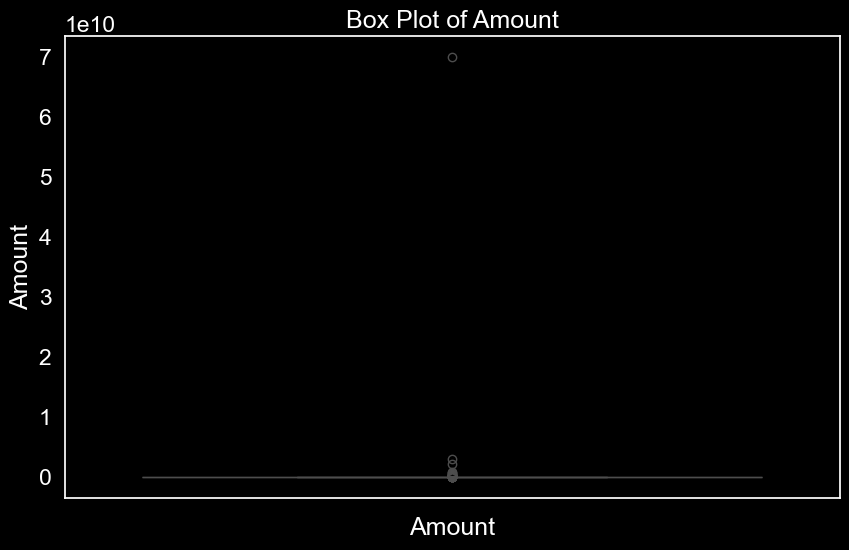

In [87]:
# Descriptive Statistics
print("Descriptive Statistics for 'Amount' column:")
print(cl_df2020['Amount'].describe())

# Skewness and Kurtosis
amount_skewness = skew(cl_df2020['Amount'])
amount_kurtosis = kurtosis(cl_df2020['Amount'])

print(f"\nSkewness for 'Amount' column: {amount_skewness}")
print(f"Kurtosis for 'Amount' column: {amount_kurtosis}")

# set theme
sns.set_theme(style="dark", palette="dark", font="sans-serif", font_scale=1.5)
plt.style.use("dark_background")
custom_palette = ["cyan", "magenta", "yellow"]

# Box Plot
plt.figure(figsize=(10, 6))
sns.boxplot(y=cl_df2020['Amount'], palette=custom_palette)
plt.title('Box Plot of Amount')
plt.xlabel('Amount')
plt.show()

***Drop all duplicates that have none in 'Stage' column***

In [88]:
# Separate rows with missing values in the 'Stage' column
missing_stage_rows = cl_df2020[cl_df2020['Stage'].isna()]
non_missing_stage_rows = cl_df2020[cl_df2020['Stage'].notna()]

# Remove all duplicate rows based on the first 7 columns in missing stage rows
missing_stage_rows.drop_duplicates(subset=missing_stage_rows.columns[0:7], inplace=True, ignore_index=True, keep=False)

# Concatenate the missing and non-missing stage rows back together
cl_df2020 = pd.concat([non_missing_stage_rows,missing_stage_rows], ignore_index=True)

# # Display info of Data Frame
cl_df2020.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048 entries, 0 to 1047
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Company_Brand  1048 non-null   object 
 1   Founded        835 non-null    float64
 2   HeadQuarter    954 non-null    object 
 3   Sector         1035 non-null   object 
 4   What_it_does   1048 non-null   object 
 5   Founders       1036 non-null   object 
 6   Investor       1010 non-null   object 
 7   Amount         795 non-null    float64
 8   Stage          590 non-null    object 
 9   column10       2 non-null      object 
dtypes: float64(2), object(8)
memory usage: 82.0+ KB


**Based on Key Columns**

***Duplicated columns based on key columns after deletion  of duplicates***

In [89]:
# Check for number of duplicated values within the 'Company_Brand' column
dupl20_count = cl_df2020.duplicated(subset=key_columns, keep=False).sum()

# Identify duplicate entries in the 'Company_Brand' column
dup_cl_20 = cl_df2020[cl_df2020.duplicated(subset=key_columns, keep=False)]

# Extract the list of duplicated company brands
unidup_cl_20 = dup_cl_20['Company_Brand'].unique()

# Display results
print(f"Number of duplicated values in 'Company_Brand' column: {dupl20_count}")
print("\nList of duplicated company brands:")
print(unidup_cl_20)

Number of duplicated values in 'Company_Brand' column: 51

List of duplicated company brands:
['Credgenics' 'FreshtoHome' 'Trell' 'Magicpin' 'Aye Finance' 'Zetwerk'
 'BankBazaar' 'Khatabook' 'Vedantu' 'Yap' 'Capital Float' 'Lido Learning'
 'Swiggy' 'Vogo' 'BharatPe' 'Shuttl' 'Clover' 'Bounce' 'Genius Teacher'
 'LetsTransport' 'Rentmojo' 'Rebel Foods' 'Digit Insurance' 'Byju']


***Duplicated columns only in list of duplicated company brands before deletion of duplicates***

In [90]:
# Create a set of the list of duplicated company brands based on key columns before deletion of duplicates
unidup_c1_20_values = set(unidup_c1_20)

# Create a set of the list of duplicated company brands based on key columns after deletion of duplicates
unidup_cl_20_values = set(unidup_cl_20)

# Find the values that only appear in the list of duplicated company brands before deletion of duplicates
values_only_in_unidup_c1_20 = unidup_c1_20_values - unidup_cl_20_values

# Display Results
print("Values only in list of duplicated company brands before deletion of duplicates:")
print(values_only_in_unidup_c1_20)

# Filter rows where 'Company_Brand' is 'Values only in list of duplicated company brands before deletion of duplicates'
values_only_in_unidup_c1_20_rows = cl_df2020[cl_df2020['Company_Brand'].isin(values_only_in_unidup_c1_20)]

# Filter 'values_only_in_unidup_c1_21_rows' based on the key columns
values_only_in_unidup_c1_20_rows[values_only_in_unidup_c1_20_rows.duplicated(subset=key_columns, keep=False)]

Values only in list of duplicated company brands before deletion of duplicates:
{'Zomato', 'Krimanshi', 'Nykaa', 'Byju’s'}


,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount,Stage,column10


##### Handling Odd Entries and Irrelevant Data

**Drop companies founded before 1980 and after 2020**

***Imputing missing values by identifying and matching rows with identical core attributes***

In [91]:
# Find duplicate rows based on specified columns
duplicate_rowsf20 = cl_df2020[cl_df2020.duplicated(subset=['Company_Brand', 'HeadQuarter', 'Sector', 'What_it_does', 'Founders'], keep=False)]

# Filter out entries with a single unique value and missing value in the 'Founded' column within each group
filtered_duplicate_f20 = duplicate_rowsf20.groupby(['Company_Brand']).filter(lambda x: ((x['Founded'].nunique() == 1) and (x['Founded'].isna().any())))

# Display the filtered duplicate rows
filtered_duplicate_f20

,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount,Stage,column10
325,Vedantu,2011.0,Bangalore,Edtech,Onine learning platform,"Saurabh Saxena, Pulkit Jain, Anand Prakash, Va...",Coatue,100000000.0,Series D,None
428,Vedantu,NaN,Bangalore,Edtech,Onine learning platform,"Saurabh Saxena, Pulkit Jain, Anand Prakash, Va...",KB Global Platform Firm,6800000.0,Series C,None
445,Vedantu,NaN,Bangalore,Edtech,Onine learning platform,"Saurabh Saxena, Pulkit Jain, Anand Prakash, Va...",Legend Capital,12500000.0,Series C,None
516,Vedantu,NaN,Bangalore,Edtech,Onine learning platform,"Saurabh Saxena, Pulkit Jain, Anand Prakash, Va...",GGV Capital,24000000.0,Series C,None
898,DailyHunt,2009.0,None,Media,News aggregator,Virendra Gupta,Lupa India,35600000.0,None,None
918,DailyHunt,NaN,None,Media,News aggregator,Virendra Gupta,"Bytedance, Falcon Edge, Goldman Sachs, Advent ...",24000000.0,None,None


In [92]:
# Extract unique company brands from the filtered duplicate rows
unique_brands_f20 = filtered_duplicate_f20['Company_Brand'].unique()

# Store the unique company brands in a list named 'target'
targetf20 = list(unique_brands_f20)

# Filter the DataFrame to include only rows with Company_Brand in the target list and specified indices
target_brands_dff20 = cl_df2020[cl_df2020['Company_Brand'].isin(targetf20) & cl_df2020.index.isin([325, 428, 445, 516, 898, 918])]

# Iterate through each Company_Brand in target2
for brand in targetf20:
    # Get the non-null 'Founded' value for this brand
    founded_value = target_brands_dff20.loc[target_brands_dff20['Company_Brand'] == brand, 'Founded'].dropna().values[0]
    
    # Fill missing 'Founded' values with the identified non-null value
    cl_df2020.loc[(cl_df2020['Company_Brand'] == brand) & (cl_df2020['Founded'].isna()), 'Founded'] = founded_value

# Display info of Data Frame
cl_df2020.info()

# Display the Dataframe to confirm imputation
target_brands_dff20_filled = cl_df2020[cl_df2020['Company_Brand'].isin(targetf20)]
target_brands_dff20_filled[target_brands_dff20_filled.duplicated(subset=key_columns, keep=False)]


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048 entries, 0 to 1047
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Company_Brand  1048 non-null   object 
 1   Founded        839 non-null    float64
 2   HeadQuarter    954 non-null    object 
 3   Sector         1035 non-null   object 
 4   What_it_does   1048 non-null   object 
 5   Founders       1036 non-null   object 
 6   Investor       1010 non-null   object 
 7   Amount         795 non-null    float64
 8   Stage          590 non-null    object 
 9   column10       2 non-null      object 
dtypes: float64(2), object(8)
memory usage: 82.0+ KB


,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount,Stage,column10
325,Vedantu,2011.0,Bangalore,Edtech,Onine learning platform,"Saurabh Saxena, Pulkit Jain, Anand Prakash, Va...",Coatue,100000000.0,Series D,None
428,Vedantu,2011.0,Bangalore,Edtech,Onine learning platform,"Saurabh Saxena, Pulkit Jain, Anand Prakash, Va...",KB Global Platform Firm,6800000.0,Series C,None
445,Vedantu,2011.0,Bangalore,Edtech,Onine learning platform,"Saurabh Saxena, Pulkit Jain, Anand Prakash, Va...",Legend Capital,12500000.0,Series C,None
516,Vedantu,2011.0,Bangalore,Edtech,Onine learning platform,"Saurabh Saxena, Pulkit Jain, Anand Prakash, Va...",GGV Capital,24000000.0,Series C,None
898,DailyHunt,2009.0,None,Media,News aggregator,Virendra Gupta,Lupa India,35600000.0,None,None
918,DailyHunt,2009.0,None,Media,News aggregator,Virendra Gupta,"Bytedance, Falcon Edge, Goldman Sachs, Advent ...",24000000.0,None,None


`Comment`

Upon detailed examination, it has been observed that a significant proportion of the entries in the 'Founded' column are missing. Efforts to impute these missing values by identifying and matching rows with identical core attributes—namely 'Company_Brand', 'HeadQuarter', 'Sector', 'What_it_does', and 'Founders' — have yielded only partial success. Despite these imputation efforts, the remaining number of entries with missing values remains substantial.

This high prevalence of missing data poses a challenge to applying a stringent criterion that requires all companies to have founding years within the range of 1980 to 2020. Given the current state of the dataset, enforcing such a criterion would result in an imprudent loss of data, undermining the integrity and comprehensiveness of the dataset. Therefore, alternative approaches for handling missing 'Founded' values need to be considered to ensure the robustness of subsequent analyses.

**Handling odd locations**

***Imputing missing values by identifying and matching rows with identical core attributes***

In [93]:
# Find duplicate rows based on specified columns
duplicate_rowsl20 = cl_df2020[cl_df2020.duplicated(subset=['Company_Brand', 'Founded', 'Sector', 'What_it_does', 'Founders'], keep=False)]

# Filter out entries with a single unique value and missing value in the 'Founded' column within each group
filtered_duplicate_l20 = duplicate_rowsl20.groupby(['Company_Brand']).filter(lambda x: ((x['HeadQuarter'].nunique() == 1) and (x['HeadQuarter'].isna().any())))

# Display the filtered duplicate rows
filtered_duplicate_l20

,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount,Stage,column10
857,Sarva,NaN,Mumbai,Yoga & wellness,It drives a cultural change in making yoga-bas...,Sarvesh Shashi,Shikhar Dhawan,NaN,None,None
907,Sarva,NaN,None,Yoga & wellness,It drives a cultural change in making yoga-bas...,Sarvesh Shashi,"Mantra Capital, Patni Family",NaN,None,None
934,Zomato,NaN,Gurugram,Foodtech,Online food delivery and restaurant discovery ...,Deepinder Goyal,Pacific Horizon,5000000.0,None,None
1037,Zomato,NaN,None,Foodtech,Online food delivery and restaurant discovery ...,Deepinder Goyal,Ant Financial,150000000.0,None,None


In [94]:
# Extract unique company brands from the filtered duplicate rows
unique_brands_l20 = filtered_duplicate_l20['Company_Brand'].unique()

# Store the unique company brands in a list named 'target'
targetl20 = list(unique_brands_l20)

# Filter the DataFrame to include only rows with Company_Brand in the target list and specified indices
target_brands_dfl20 = cl_df2020[cl_df2020['Company_Brand'].isin(targetl20) & cl_df2020.index.isin([857, 907, 934, 1037])]


# Iterate through each Company_Brand in targetl20
for brand in targetl20:
    # Get the non-null 'HeadQuarter' value for this brand
    location_value = target_brands_dfl20.loc[target_brands_dfl20['Company_Brand'] == brand, 'HeadQuarter'].dropna().values[0]
        
    # Fill missing 'HeadQuarter' values with the identified non-null value
    cl_df2020.loc[(cl_df2020['Company_Brand'] == brand) & (cl_df2020['HeadQuarter'].isna()), 'HeadQuarter'] = location_value

# Display info of Data Frame
cl_df2020.info()

# Display the Dataframe to confirm imputation
target_brands_dfl20_filled = cl_df2020[cl_df2020['Company_Brand'].isin(targetl20)]
target_brands_dfl20_filled[target_brands_dfl20_filled.duplicated(subset=key_columns, keep=False)]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048 entries, 0 to 1047
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Company_Brand  1048 non-null   object 
 1   Founded        839 non-null    float64
 2   HeadQuarter    956 non-null    object 
 3   Sector         1035 non-null   object 
 4   What_it_does   1048 non-null   object 
 5   Founders       1036 non-null   object 
 6   Investor       1010 non-null   object 
 7   Amount         795 non-null    float64
 8   Stage          590 non-null    object 
 9   column10       2 non-null      object 
dtypes: float64(2), object(8)
memory usage: 82.0+ KB


,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount,Stage,column10
857,Sarva,NaN,Mumbai,Yoga & wellness,It drives a cultural change in making yoga-bas...,Sarvesh Shashi,Shikhar Dhawan,NaN,None,None
907,Sarva,NaN,Mumbai,Yoga & wellness,It drives a cultural change in making yoga-bas...,Sarvesh Shashi,"Mantra Capital, Patni Family",NaN,None,None
934,Zomato,NaN,Gurugram,Foodtech,Online food delivery and restaurant discovery ...,Deepinder Goyal,Pacific Horizon,5000000.0,None,None
1037,Zomato,NaN,Gurugram,Foodtech,Online food delivery and restaurant discovery ...,Deepinder Goyal,Ant Financial,150000000.0,None,None


***Replacing and dropping odd location***

In [95]:
# Replace non-geographic odd entries in the 'HeadQuarter' column
cl_df2020['HeadQuarter'] = cl_df2020['HeadQuarter'].apply(replace_odd_location)

# Replace 'Bengaluru' and 'Bangalore City' with 'Bangalore' in the 'HeadQuarter' column
cl_df2020['HeadQuarter'] = cl_df2020['HeadQuarter'].replace({'Bengaluru': 'Bangalore', 'Bangalore City': 'Bangalore'})

# List of entries to drop
entries_to_drop = ['California', 'France', 'Bangaldesh']

# Drop rows where 'HeadQuarter' contains any of the entries in the list
cl_df2020 = cl_df2020[~cl_df2020['HeadQuarter'].isin(entries_to_drop)].reset_index(drop=True)

# Display info of Data Frame
cl_df2020.info()    

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1041 entries, 0 to 1040
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Company_Brand  1041 non-null   object 
 1   Founded        832 non-null    float64
 2   HeadQuarter    1041 non-null   object 
 3   Sector         1028 non-null   object 
 4   What_it_does   1041 non-null   object 
 5   Founders       1029 non-null   object 
 6   Investor       1004 non-null   object 
 7   Amount         789 non-null    float64
 8   Stage          585 non-null    object 
 9   column10       2 non-null      object 
dtypes: float64(2), object(8)
memory usage: 81.5+ KB


`Comment`

Rows with the following cities outside India will not be excluded at this stage but may be considered for removal in subsequent data cleaning phases if they constitute an insignificant percentage of the final dataset. This approach deviates from the predefined criteria for handling anomalous entries in the HeadQuarter column. Nonetheless, this measure is vital to maintaining data integrity. The cities under consideration include: San Francisco, San Ramon, Plano, New York, Irvine, Tangerang, Berlin, Seattle, Riyadh, Singapore, Seoul, Bangkok, Frisco, Paris, Sydney, Milan, Palmwoods, Newcastle upon Tyne, Shanghai, and Jiaxing.

**Redistributing entries in sector column**

In [96]:
# Replace sector names based on the dictionary
cl_df2020['Sector'] = cl_df2020['Sector'].replace(replacement_dict)

# Apply sector redistribution function to 'Sector' column
cl_df2020['Sector'] = cl_df2020['Sector'].apply(sector_redistribution)

# Get the value counts for the 'Sector' column
sector_counts = cl_df2020['Sector'].value_counts()

# Display results
print(sector_counts)

Sector
Technology and Software                     267
Finance and Technology                      163
Education and Learning                      120
Consumer Goods and Services                  98
E-commerce and Retail                        80
Healthcare and Health Technology             72
Agriculture and Technology                   46
Transport and Logistics                      34
Media and Entertainment                      31
Automotive                                   25
Human Resources and Consultancy              22
Real Estate and Housing                      20
Energy and Environment                       17
Not filled                                   13
Marketing and Advertising                     9
Fashion and Apparel                           8
Social Networking                             6
Technology Solutions for Industry             6
Construction and Home Services                3
Entrepreneurship and Business Incubation      1
Name: count, dtype: int64


**Replacing odd founders**

In [97]:
# Apply the function to replace odd entries in the 'Founders' column
cl_df2020['Founders'] = cl_df2020['Founders'].apply(replace_odd_founders)

# Display information
cl_df2020.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1041 entries, 0 to 1040
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Company_Brand  1041 non-null   object 
 1   Founded        832 non-null    float64
 2   HeadQuarter    1041 non-null   object 
 3   Sector         1041 non-null   object 
 4   What_it_does   1041 non-null   object 
 5   Founders       1041 non-null   object 
 6   Investor       1004 non-null   object 
 7   Amount         789 non-null    float64
 8   Stage          585 non-null    object 
 9   column10       2 non-null      object 
dtypes: float64(2), object(8)
memory usage: 81.5+ KB


**Replacing odd investor**

In [98]:
# Replace odd entries in the 'Investor' column
cl_df2020['Investor'] = cl_df2020['Investor'].apply(replace_odd_investor)

# Display information
cl_df2020.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1041 entries, 0 to 1040
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Company_Brand  1041 non-null   object 
 1   Founded        832 non-null    float64
 2   HeadQuarter    1041 non-null   object 
 3   Sector         1041 non-null   object 
 4   What_it_does   1041 non-null   object 
 5   Founders       1041 non-null   object 
 6   Investor       1041 non-null   object 
 7   Amount         789 non-null    float64
 8   Stage          585 non-null    object 
 9   column10       2 non-null      object 
dtypes: float64(2), object(8)
memory usage: 81.5+ KB


**Redistributing entries in 'Stage' column**

In [99]:
# Define a dictionary to map misspellings and inconsistencies to their corrected forms
corrections = {
    "Seies A": "Series A",
    "PE": "Private Equity",
    "Bridge Round": "Bridge"
}

# Use the replace() method with the corrections dictionary
cl_df2020['Stage'] = cl_df2020['Stage'].replace(corrections, regex=True)

# Replace stages in the DataFrame
cl_df2020['Stage'] = cl_df2020['Stage'].apply(replace_stage)

# Get the value counts for the 'Stage' column
stage_counts20 = cl_df2020['Stage'].value_counts()

# Display results
print(stage_counts20)

Stage
Validation        285
Scaling           149
Early Traction    104
Ideation           20
Debt               15
Bridge              7
Equity              4
Name: count, dtype: int64


**Drop row with outlier (maximum value)**

In [100]:
# Find the index label of the row with the maximum value in the 'Amount' column
max_amount_index = cl_df2020['Amount'].idxmax()

# Drop the row using the index label
cl_df2020 = cl_df2020.drop(max_amount_index).reset_index(drop=True)

# Check DataFrame information
cl_df2020.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1040 entries, 0 to 1039
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Company_Brand  1040 non-null   object 
 1   Founded        831 non-null    float64
 2   HeadQuarter    1040 non-null   object 
 3   Sector         1040 non-null   object 
 4   What_it_does   1040 non-null   object 
 5   Founders       1040 non-null   object 
 6   Investor       1040 non-null   object 
 7   Amount         788 non-null    float64
 8   Stage          584 non-null    object 
 9   column10       2 non-null      object 
dtypes: float64(2), object(8)
memory usage: 81.4+ KB


**Drop irrelevant data**

In [101]:
# Drop the 'column10' column from the DataFrame
cl_df2020 = cl_df2020.drop(columns=['column10'])

# Display information
cl_df2020.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1040 entries, 0 to 1039
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Company_Brand  1040 non-null   object 
 1   Founded        831 non-null    float64
 2   HeadQuarter    1040 non-null   object 
 3   Sector         1040 non-null   object 
 4   What_it_does   1040 non-null   object 
 5   Founders       1040 non-null   object 
 6   Investor       1040 non-null   object 
 7   Amount         788 non-null    float64
 8   Stage          584 non-null    object 
dtypes: float64(2), object(7)
memory usage: 73.2+ KB


##### Handling Missing Values

**Check missing values**

In [102]:
# Determine the proportion of missing values
missing_cl_df2020_st = (cl_df2020.isnull().mean() * 100).round(2)

# Display Results
print("Proportion of missing values in 2020 data:")
print()
print(missing_cl_df2020_st)

Proportion of missing values in 2020 data:

Company_Brand     0.00
Founded          20.10
HeadQuarter       0.00
Sector            0.00
What_it_does      0.00
Founders          0.00
Investor          0.00
Amount           24.23
Stage            43.85
dtype: float64


**Group by Stage and determine the mean, median and mode amounts**

In [103]:
# Calculate mean, median, and mode amounts by stage
mean_amounts20 = cl_df2020.groupby('Stage')['Amount'].mean()
median_amounts20 = cl_df2020.groupby('Stage')['Amount'].median()
mode_amounts20 = cl_df2020.groupby('Stage')['Amount'].apply(lambda x: x.mode().iloc[0] if not x.mode().empty else None)

# Display results
print("Mean Amounts by Stage:")
print(mean_amounts20)

print("\nMedian Amounts by Stage:")
print(median_amounts20)

print("\nMode Amounts by Stage:")
print(mode_amounts20)

Mean Amounts by Stage:
Stage
Bridge            2.875000e+06
Debt              1.199547e+07
Early Traction    9.335816e+06
Equity            2.640000e+05
Ideation          5.475000e+05
Scaling           3.456126e+07
Validation        1.767549e+06
Name: Amount, dtype: float64

Median Amounts by Stage:
Stage
Bridge             1500000.0
Debt               5000000.0
Early Traction     5000000.0
Equity              264000.0
Ideation            270000.0
Scaling           20000000.0
Validation         1000000.0
Name: Amount, dtype: float64

Mode Amounts by Stage:
Stage
Bridge              500000.0
Debt               5000000.0
Early Traction     3000000.0
Equity              264000.0
Ideation            100000.0
Scaling           30000000.0
Validation         1000000.0
Name: Amount, dtype: float64


**Univariate Analysis of the 'Amount' Column**

Descriptive Statistics for 'Amount' column:
count    7.880000e+02
mean     2.125835e+07
std      9.817786e+07
min      1.270000e+04
25%      1.000000e+06
50%      3.000000e+06
75%      1.062500e+07
max      2.200000e+09
Name: Amount, dtype: float64

Skewness for 'Amount' column: nan
Kurtosis for 'Amount' column: nan


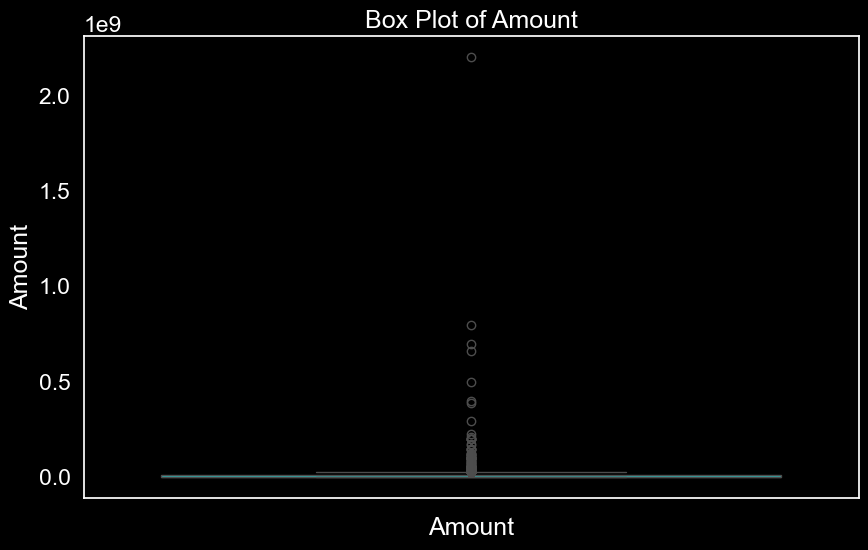

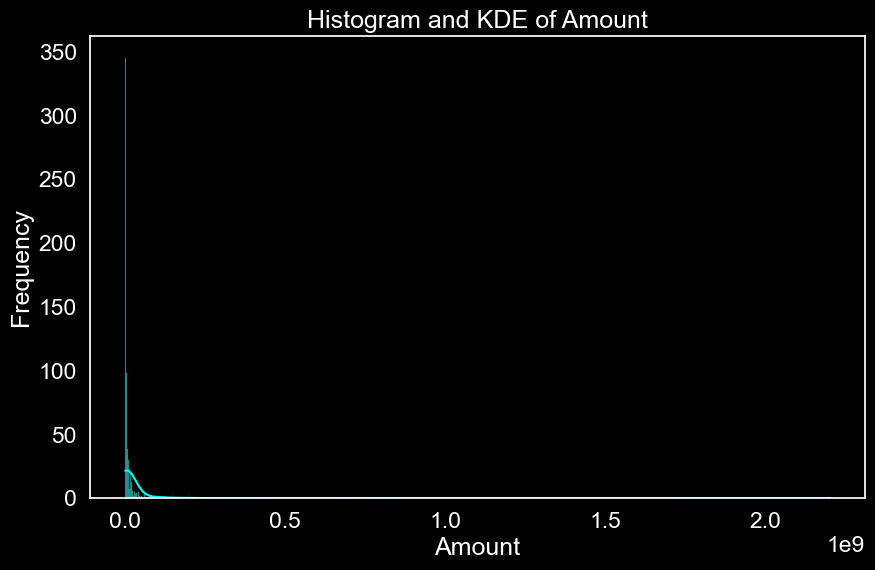

In [104]:
# Descriptive Statistics
print("Descriptive Statistics for 'Amount' column:")
print(cl_df2020['Amount'].describe())

# Skewness and Kurtosis
amount_skewness20 = skew(cl_df2020['Amount'])
amount_kurtosis20 = kurtosis(cl_df2020['Amount'])

print(f"\nSkewness for 'Amount' column: {amount_skewness20}")
print(f"Kurtosis for 'Amount' column: {amount_kurtosis20}")

# set theme
sns.set_theme(style="dark", palette="dark", font="sans-serif", font_scale=1.5)
plt.style.use("dark_background")
custom_palette = ["cyan", "magenta", "yellow"]

# Box Plot
plt.figure(figsize=(10, 6))
sns.boxplot(y=cl_df2020['Amount'], palette=custom_palette)
plt.title('Box Plot of Amount')
plt.xlabel('Amount')
plt.show()

# Histogram with KDE Plot
plt.figure(figsize=(10, 6))
sns.histplot(cl_df2020['Amount'], kde=True, color='cyan')
plt.title('Histogram and KDE of Amount')
plt.xlabel('Amount')
plt.ylabel('Frequency')
plt.show()

**Filling missing values in 'Stage' column**

`Comment`

The 'Amount' column in the dataset displays outliers, highlighting the necessity for robust imputation techniques. While mode imputation, selecting the most frequently occurring value, is a straightforward approach, its susceptibility to outliers may introduce bias and compromise data integrity. However, in scenarios where data distribution exhibits significant skewness or multimodality, mode imputation remains a viable option.

Notably, distinct mode values, contrasting with median values observed across various stages, bolster the rationale for mode imputation. This method accurately captures the central tendency within each group, reinforcing its suitability for addressing missing values.

In the absence of outliers within the 'Amount' data, mean imputation emerges as a viable alternative due to its simplicity and efficacy in symmetric distributions.

It is pertinent to emphasize that the imputation strategy aims to fill missing values in the stage column by leveraging mode values derived from individual stage groups. This approach differs from employing the mode of the stage column itself to address missing values, a common practice in categorical data imputation methodologies.

In [105]:
# Define a function to fill missing stages based on mode amounts
def fill_missing_stage20(row):
    if pd.isna(row['Stage']):
        for stage, mode in mode_amounts20.items():
            if row['Amount'] <= mode:
                return stage
        return pd.NA  
    return row['Stage']

# Apply the function to fill missing stages
cl_df2020['Stage'] = cl_df2020.apply(fill_missing_stage20, axis=1)

# Display information
cl_df2020.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1040 entries, 0 to 1039
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Company_Brand  1040 non-null   object 
 1   Founded        831 non-null    float64
 2   HeadQuarter    1040 non-null   object 
 3   Sector         1040 non-null   object 
 4   What_it_does   1040 non-null   object 
 5   Founders       1040 non-null   object 
 6   Investor       1040 non-null   object 
 7   Amount         788 non-null    float64
 8   Stage          859 non-null    object 
dtypes: float64(2), object(7)
memory usage: 73.2+ KB


In [106]:
# Filter the rows where 'Stage' is missing
filter_min20_df = cl_df2020[cl_df2020['Stage'].isna()]

# Find the minimum 'Amount' value in the filtered DataFrame
filter_min20_amount = filter_min20_df['Amount'].min()

# Print the minimum 'Amount' value
print('The minimum amount value in the filtered dataframe is:', filter_min20_amount)

The minimum amount value in the filtered dataframe is: 33000000.0


`Comment`

Based on exploratory analysis of the 'Amount' column within the dataset above, it has been ascertained that the recorded minimum value stands at 33,000,000. Consequently, the imputation strategy for missing values in the 'Stage' column entails identifying the stage category whose mode amount value closely approximates this observed minimum, while ensuring exclusion of categories labeled as 'debt', 'bridge', 'market transactions', 'equity' or 'non-equity'.

Upon meticulous examination of the dataset, it has been established that the 'Scaling' stage category exhibits the nearest mode amount value (30,000,000) to the aforementioned minimum amount. Thus, as an integral part of the imputation process, the missing entries in the 'Stage' column meeting the criterion of possessing a non-null float entry in the corresponding 'Amount' column will be substituted with the 'Scaling' stage category. This aligns with the predefined criteria for selection and ensures coherence in the imputation procedure.

In [107]:
# Apply the function to fill missing stages
cl_df2020['Stage'] = cl_df2020.apply(fill_missing_stage_scl, axis=1)

# Display information
cl_df2020.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1040 entries, 0 to 1039
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Company_Brand  1040 non-null   object 
 1   Founded        831 non-null    float64
 2   HeadQuarter    1040 non-null   object 
 3   Sector         1040 non-null   object 
 4   What_it_does   1040 non-null   object 
 5   Founders       1040 non-null   object 
 6   Investor       1040 non-null   object 
 7   Amount         788 non-null    float64
 8   Stage          900 non-null    object 
dtypes: float64(2), object(7)
memory usage: 73.2+ KB


**Filling missing values in 'Amount' column**

In [108]:
# Select only the columns with missing values
X_missing20 = cl_df2020[['Amount']]  

# Initialize IterativeImputer
multiple_imputer = IterativeImputer(max_iter=10, random_state=0)  

# Fit and transform the data, and fill missing values directly in the DataFrame
cl_df2020[['Amount']] = multiple_imputer.fit_transform(X_missing20)  

# Display DataFrame information
cl_df2020.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1040 entries, 0 to 1039
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Company_Brand  1040 non-null   object 
 1   Founded        831 non-null    float64
 2   HeadQuarter    1040 non-null   object 
 3   Sector         1040 non-null   object 
 4   What_it_does   1040 non-null   object 
 5   Founders       1040 non-null   object 
 6   Investor       1040 non-null   object 
 7   Amount         1040 non-null   float64
 8   Stage          900 non-null    object 
dtypes: float64(2), object(7)
memory usage: 73.2+ KB


**Complete filling missing values in 'Stage' column**

In [109]:
# Find indices of missing values in the original 'Amount' column
missing_indices20 = np.where(X_missing20.isna())[0]

# Extract unique imputed values using indices
cl_df2020_imputed = (cl_df2020.iloc[missing_indices20]['Amount']).unique()

# Print the unique imputed values
print(cl_df2020_imputed)

[21258352.2893401]


`Comment`

The imputation process has yielded a unique value of 21,258,352.30 for the 'Amount' column. Consequently, the imputation strategy for missing values in the 'Stage' column involves identifying the stage category whose mode amount closely approximates this observed value, while ensuring exclusion of categories labeled as 'debt', 'bridge', or 'private equity'.

After thorough scrutiny of the dataset, it has been determined that the 'Scaling' stage category exhibits the closest mode amount value (30,000,000) to the aforementioned amount value. Hence, the remaining missing values in the 'Stage' column will be replaced with the 'Scaling' stage category. This decision adheres to the predefined selection criteria, ensuring consistency and coherence in the imputation process.

In [110]:
# Apply the function to fill missing stages
cl_df2020['Stage'] = cl_df2020.apply(fill_missing_stage_scl, axis=1)

# Determine the proportion of missing values
missing_cl_df2020_ed = (cl_df2020.isnull().mean() * 100).round(2)

# Display Results
print("Proportion of missing values in 2020 data:")
print()
print(missing_cl_df2020_ed)

Proportion of missing values in 2020 data:

Company_Brand     0.0
Founded          20.1
HeadQuarter       0.0
Sector            0.0
What_it_does      0.0
Founders          0.0
Investor          0.0
Amount            0.0
Stage             0.0
dtype: float64


##### Standardise Formats

In [111]:
# Standardize 'Founded Year' column to integer datatype
cl_df2020['Founded'] = cl_df2020['Founded'].replace([np.inf, -np.inf], np.nan).astype('Int64')


# Identify object columns (excluding 'What_it_does' and 'Company_Brand')
object_columns_to_convert20 = [col for col in cl_df2020.select_dtypes(include=['object']).columns
                             if col not in ['What_it_does', 'Company_Brand']]

# Convert object columns to category datatype
cl_df2020[object_columns_to_convert20] = cl_df2020[object_columns_to_convert20].astype('category')

# Display information
cl_df2020.info(memory_usage="deep")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1040 entries, 0 to 1039
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Company_Brand  1040 non-null   object  
 1   Founded        831 non-null    Int64   
 2   HeadQuarter    1040 non-null   category
 3   Sector         1040 non-null   category
 4   What_it_does   1040 non-null   object  
 5   Founders       1040 non-null   category
 6   Investor       1040 non-null   category
 7   Amount         1040 non-null   float64 
 8   Stage          1040 non-null   category
dtypes: Int64(1), category(5), float64(1), object(2)
memory usage: 444.4 KB


#### Load LP1_startup_funding2019 Data

##### Remove Duplicates

There are no duplicate rows in this dataset.

##### Handling Odd Entries and Irrelevant Data

**Replacing and dropping odd location**

In [112]:
# Create a copy of df2021 to avoid modifying the original DataFrame
cl_df2019 = df2019.copy()

# Replace non-geographic odd entries in the 'HeadQuarter' column
cl_df2019['HeadQuarter'] = cl_df2019['HeadQuarter'].apply(replace_odd_location)

# Replace 'Bengaluru' and 'Bangalore City' with 'Bangalore' in the 'HeadQuarter' column
cl_df2019['HeadQuarter'] = cl_df2019['HeadQuarter'].replace({'Bengaluru': 'Bangalore', 'Bangalore City': 'Bangalore'})

# Display info of Data Frame
cl_df2019.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89 entries, 0 to 88
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Company_Brand  89 non-null     object 
 1   Founded        60 non-null     float64
 2   HeadQuarter    89 non-null     object 
 3   Sector         84 non-null     object 
 4   What_it_does   89 non-null     object 
 5   Founders       86 non-null     object 
 6   Investor       89 non-null     object 
 7   Amount         89 non-null     object 
 8   Stage          43 non-null     object 
dtypes: float64(1), object(8)
memory usage: 6.4+ KB


**Redistributing entries in sector column**

In [113]:
# Replace sector names based on the dictionary
cl_df2019['Sector'] = cl_df2019['Sector'].replace(replacement_dict)

# Apply sector redistribution function to 'Sector' column
cl_df2019['Sector'] = cl_df2019['Sector'].apply(sector_redistribution)

# Get the value counts for the 'Sector' column
sector_counts = cl_df2019['Sector'].value_counts()

# Display results
print(sector_counts)

Sector
Technology and Software              20
Consumer Goods and Services          10
Finance and Technology                9
E-commerce and Retail                 8
Education and Learning                7
Transport and Logistics               6
Automotive                            6
Not filled                            5
Agriculture and Technology            4
Healthcare and Health Technology      4
Real Estate and Housing               3
Media and Entertainment               3
Human Resources and Consultancy       2
Technology Solutions for Industry     1
Marketing and Advertising             1
Name: count, dtype: int64


**Converting the 'Amount' column to float**

In [114]:
# Apply the 'convert_to_float' function to each element in the "Amount" column
cl_df2019['Amount'] = cl_df2019['Amount'].apply(lambda x: convert_to_float(re.sub(r'[^\d.]', '', str(x))))

# Check the data type of the "Amount" column
cl_df2019['Amount'].dtype

dtype('float64')

**Replacing odd founders**

In [115]:
# Apply the function to replace odd entries in the 'Founders' column
cl_df2019['Founders'] = cl_df2019['Founders'].apply(replace_odd_founders)

# Display information
cl_df2019.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89 entries, 0 to 88
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Company_Brand  89 non-null     object 
 1   Founded        60 non-null     float64
 2   HeadQuarter    89 non-null     object 
 3   Sector         89 non-null     object 
 4   What_it_does   89 non-null     object 
 5   Founders       89 non-null     object 
 6   Investor       89 non-null     object 
 7   Amount         77 non-null     float64
 8   Stage          43 non-null     object 
dtypes: float64(2), object(7)
memory usage: 6.4+ KB


**Redistributing entries in 'Stage' column**

In [116]:
# Replace stages in the DataFrame
cl_df2019['Stage'] = cl_df2019['Stage'].apply(replace_stage)

# Get the value counts for the 'Stage' column
stage_counts19 = cl_df2019['Stage'].value_counts()

# Display results
print(stage_counts19)

Stage
Scaling           20
Validation        11
Early Traction    10
Ideation           1
Name: count, dtype: int64


##### Handling Missing Values

**Check missing values**

In [117]:
# Determine the proportion of missing values
missing_cl_df2019_st = (cl_df2019.isnull().mean() * 100).round(2)

# Display Results
print("Proportion of missing values in 2019 data:")
print()
print(missing_cl_df2019_st)

Proportion of missing values in 2019 data:

Company_Brand     0.00
Founded          32.58
HeadQuarter       0.00
Sector            0.00
What_it_does      0.00
Founders          0.00
Investor          0.00
Amount           13.48
Stage            52.81
dtype: float64


**Group by Stage and determine the mean, median and mode amounts**

In [118]:
# Calculate mean, median, and mode amounts by stage
mean_amounts19 = cl_df2019.groupby('Stage')['Amount'].mean()
median_amounts19 = cl_df2019.groupby('Stage')['Amount'].median()
mode_amounts19 = cl_df2019.groupby('Stage')['Amount'].apply(lambda x: x.mode().iloc[0] if not x.mode().empty else None)

# Display results
print("Mean Amounts by Stage:")
print(mean_amounts19)

print("\nMedian Amounts by Stage:")
print(median_amounts19)

print("\nMode Amounts by Stage:")
print(mode_amounts19)

Mean Amounts by Stage:
Stage
Early Traction    9.810000e+06
Ideation          2.500000e+06
Scaling           4.763333e+07
Validation        6.315000e+06
Name: Amount, dtype: float64

Median Amounts by Stage:
Stage
Early Traction     5500000.0
Ideation           2500000.0
Scaling           28000000.0
Validation         1250000.0
Name: Amount, dtype: float64

Mode Amounts by Stage:
Stage
Early Traction     4000000.0
Ideation           2500000.0
Scaling           30000000.0
Validation         1000000.0
Name: Amount, dtype: float64


**Univariate Analysis of the 'Amount' Column**

Descriptive Statistics for 'Amount' column:
count    7.700000e+01
mean     4.333030e+07
std      1.106216e+08
min      1.000000e+05
25%      2.100000e+06
50%      6.000000e+06
75%      3.000000e+07
max      6.930000e+08
Name: Amount, dtype: float64

Skewness for 'Amount' column: nan
Kurtosis for 'Amount' column: nan


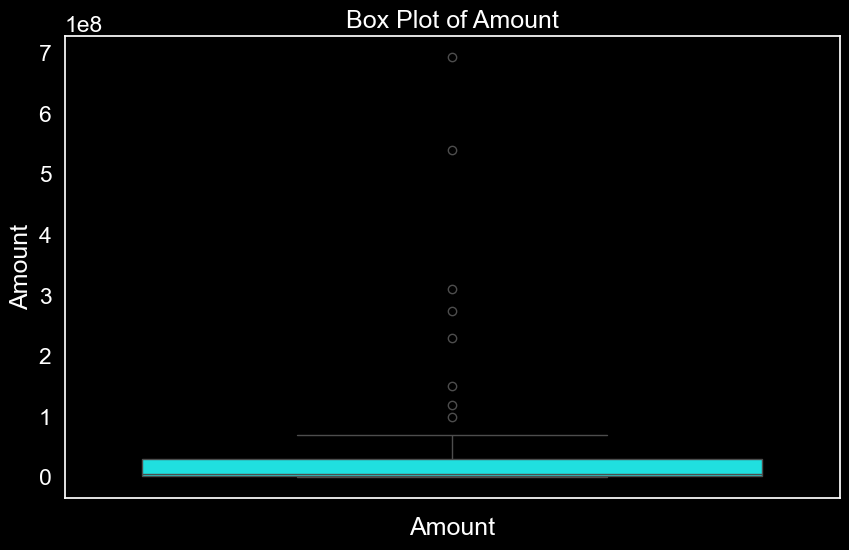

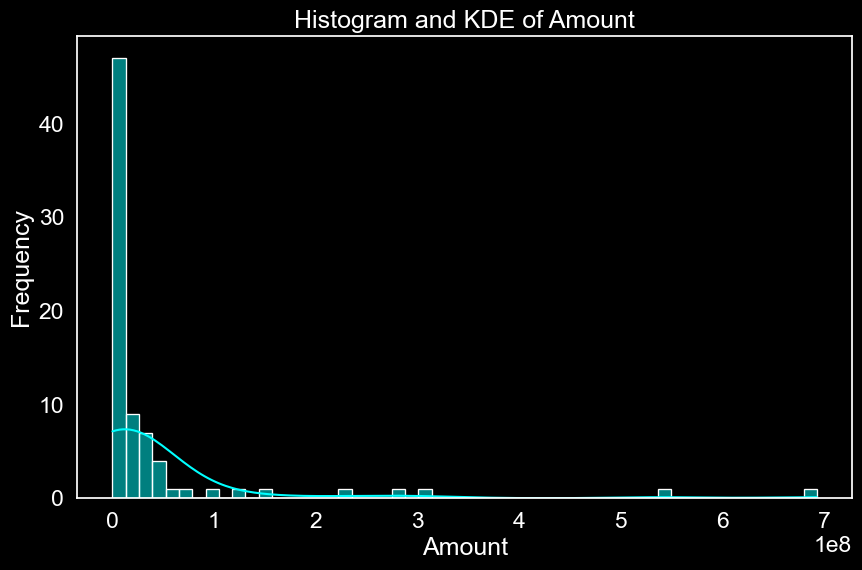

In [119]:
# Descriptive Statistics
print("Descriptive Statistics for 'Amount' column:")
print(cl_df2019['Amount'].describe())

# Skewness and Kurtosis
amount_skewness19 = skew(cl_df2019['Amount'])
amount_kurtosis19 = kurtosis(cl_df2019['Amount'])

print(f"\nSkewness for 'Amount' column: {amount_skewness19}")
print(f"Kurtosis for 'Amount' column: {amount_kurtosis19}")

# set theme
sns.set_theme(style="dark", palette="dark", font="sans-serif", font_scale=1.5)
plt.style.use("dark_background")
custom_palette = ["cyan", "magenta", "yellow"]

# Box Plot
plt.figure(figsize=(10, 6))
sns.boxplot(y=cl_df2019['Amount'], palette=custom_palette)
plt.title('Box Plot of Amount')
plt.xlabel('Amount')
plt.show()

# Histogram with KDE Plot
plt.figure(figsize=(10, 6))
sns.histplot(cl_df2019['Amount'], kde=True, color='cyan')
plt.title('Histogram and KDE of Amount')
plt.xlabel('Amount')
plt.ylabel('Frequency')
plt.show()

**Filling missing values in 'Stage' column**

`Comment`

The numerical values in the 'Amount' column exhibit outliers, making median imputation a more suitable method for addressing missing values. The robustness of the median against outliers ensures that the imputation process is not skewed by extreme values, thus preserving the dataset's integrity. Furthermore, distinct median values observed across different stages support the preference for median imputation, as it accurately reflects the central tendency within each group.

It is important to note that the imputation strategy is designed to fill missing values in the stage column with stage groups based on the median values derived from each stage, which differs from using the mode of the stage column to fill missing values, a common approach for categorical data.

Conversely, if the 'Amount' data were devoid of outliers, mean imputation would be appropriate for handling missing numerical values due to its simplicity and effectiveness in symmetrical distributions. As mentioned earlier for categorical data, mode imputation would be the preferred method, utilizing the most frequently occurring category to maintain the distributional characteristics of the dataset. Although the calculated mean and mode values illustrate these alternative methods, given the current data characteristics, median imputation remains the optimal choice.

In [120]:
# Define a function to fill missing stages based on median amounts
def fill_missing_stage19(row):
    if pd.isna(row['Stage']):
        for stage, median in median_amounts19.items():
            if row['Amount'] <= median:
                return stage
        return pd.NA  
    return row['Stage']

# Apply the function to fill missing stages
cl_df2019['Stage'] = cl_df2019.apply(fill_missing_stage19, axis=1)

# Display information
cl_df2019.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89 entries, 0 to 88
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Company_Brand  89 non-null     object 
 1   Founded        60 non-null     float64
 2   HeadQuarter    89 non-null     object 
 3   Sector         89 non-null     object 
 4   What_it_does   89 non-null     object 
 5   Founders       89 non-null     object 
 6   Investor       89 non-null     object 
 7   Amount         77 non-null     float64
 8   Stage          70 non-null     object 
dtypes: float64(2), object(7)
memory usage: 6.4+ KB


In [121]:
# Filter the rows where 'Stage' is missing
filter_min19_df = cl_df2019[cl_df2019['Stage'].isna()]

# Find the minimum 'Amount' value in the filtered DataFrame
filter_min19_amount = filter_min19_df['Amount'].min()

# Print the minimum 'Amount' value
print('The minimum amount value in the filtered dataframe is:', filter_min19_amount)

The minimum amount value in the filtered dataframe is: 33000000.0


`Comment`

Based on exploratory analysis of the 'Amount' column within the dataset above, it has been ascertained that the recorded minimum value stands at 33,000,000. Consequently, the imputation strategy for missing values in the 'Stage' column entails identifying the stage category whose median amount value closely approximates this observed minimum, while ensuring exclusion of categories labeled as 'debt', 'bridge', 'market transactions', 'equity',  or 'non-equity'.

Upon meticulous examination of the dataset, it has been established that the 'Scaling' stage category exhibits the nearest median amount value (28,000,000) to the aforementioned minimum amount. Thus, as an integral part of the imputation process, the missing entries in the 'Stage' column meeting the criterion of possessing a non-null float entry in the corresponding 'Amount' column will be substituted with the 'Scaling' stage category. This aligns with the predefined criteria for selection and ensures coherence in the imputation procedure.

In [122]:
# Apply the function to fill missing stages
cl_df2019['Stage'] = cl_df2019.apply(fill_missing_stage_scl, axis=1)

# Display information
cl_df2019.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89 entries, 0 to 88
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Company_Brand  89 non-null     object 
 1   Founded        60 non-null     float64
 2   HeadQuarter    89 non-null     object 
 3   Sector         89 non-null     object 
 4   What_it_does   89 non-null     object 
 5   Founders       89 non-null     object 
 6   Investor       89 non-null     object 
 7   Amount         77 non-null     float64
 8   Stage          80 non-null     object 
dtypes: float64(2), object(7)
memory usage: 6.4+ KB


**Filling missing values in 'Amount' column**

In [123]:
# Select only the columns with missing values
X_missing19 = cl_df2019[['Amount']]  

# Initialize IterativeImputer
multiple_imputer = IterativeImputer(max_iter=10, random_state=0)  

# Fit and transform the data, and fill missing values directly in the DataFrame
cl_df2019[['Amount']] = multiple_imputer.fit_transform(X_missing19)  

# Display DataFrame information
cl_df2019.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89 entries, 0 to 88
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Company_Brand  89 non-null     object 
 1   Founded        60 non-null     float64
 2   HeadQuarter    89 non-null     object 
 3   Sector         89 non-null     object 
 4   What_it_does   89 non-null     object 
 5   Founders       89 non-null     object 
 6   Investor       89 non-null     object 
 7   Amount         89 non-null     float64
 8   Stage          80 non-null     object 
dtypes: float64(2), object(7)
memory usage: 6.4+ KB


**Complete filling missing values in 'Stage' column**

In [124]:
# Find indices of missing values in the original 'Amount' column
missing_indices19 = np.where(X_missing19.isna())[0]

# Extract unique imputed values using indices
cl_df2019_imputed = (cl_df2019.iloc[missing_indices19]['Amount']).unique()

# Print the unique imputed values
print(cl_df2019_imputed)

[43330301.2987013]


`Comment`

The imputation process has yielded a unique value of 43,330,301.30 for the 'Amount' column. Consequently, the imputation strategy for missing values in the 'Stage' column involves identifying the stage category whose median amount closely approximates this observed value, while ensuring exclusion of categories labeled as 'debt', 'bridge', 'market transactions', 'equity' or 'non-equity'.

After thorough scrutiny of the dataset, it has been determined that the 'Scaling' stage category exhibits the closest median amount value (28,000,000) to the aforementioned amount value. Hence, the remaining missing values in the 'Stage' column will be replaced with the 'Scaling' stage category. This decision adheres to the predefined selection criteria, ensuring consistency and coherence in the imputation process.

In [125]:
# Apply the function to fill missing stages
cl_df2019['Stage'] = cl_df2019.apply(fill_missing_stage_scl, axis=1)

# Determine the proportion of missing values
missing_cl_df2019_ed = (cl_df2019.isnull().mean() * 100).round(2)

# Display Results
print("Proportion of missing values in 2019 data:")
print()
print(missing_cl_df2019_ed)

Proportion of missing values in 2019 data:

Company_Brand     0.00
Founded          32.58
HeadQuarter       0.00
Sector            0.00
What_it_does      0.00
Founders          0.00
Investor          0.00
Amount            0.00
Stage             0.00
dtype: float64


##### Standardise Formats

In [126]:
# Standardize 'Founded Year' column to integer datatype
cl_df2019['Founded'] = cl_df2019['Founded'].replace([np.inf, -np.inf], np.nan).astype('Int64')


# Identify object columns (excluding 'What_it_does' and 'Company_Brand')
object_columns_to_convert19 = [col for col in cl_df2019.select_dtypes(include=['object']).columns
                             if col not in ['What_it_does', 'Company_Brand']]

# Convert object columns to category datatype
cl_df2019[object_columns_to_convert19] = cl_df2019[object_columns_to_convert19].astype('category')

# Display information
cl_df2019.info(memory_usage="deep")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89 entries, 0 to 88
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Company_Brand  89 non-null     object  
 1   Founded        60 non-null     Int64   
 2   HeadQuarter    89 non-null     category
 3   Sector         89 non-null     category
 4   What_it_does   89 non-null     object  
 5   Founders       89 non-null     category
 6   Investor       89 non-null     category
 7   Amount         89 non-null     float64 
 8   Stage          89 non-null     category
dtypes: Int64(1), category(5), float64(1), object(2)
memory usage: 41.5 KB


#### Load LP1_startup_funding2018 Data

**Replacing odd founders**

##### Remove Duplicates

**Based on all Features**

In [127]:
# Create a copy of df2021 to avoid modifying the original DataFrame
cl_df2018 = df2018.copy()

# Remove duplicate rows 
cl_df2018.drop_duplicates(inplace=True, ignore_index=True)

# Display info of Data Frame
cl_df2018.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525 entries, 0 to 524
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Company_Brand  525 non-null    object 
 1   Founded        0 non-null      float64
 2   HeadQuarter    525 non-null    object 
 3   Sector         525 non-null    object 
 4   What_it_does   525 non-null    object 
 5   Founders       525 non-null    object 
 6   Investor       525 non-null    object 
 7   Amount         525 non-null    object 
 8   Stage          525 non-null    object 
dtypes: float64(1), object(8)
memory usage: 37.0+ KB


##### Handling Odd Entries and Irrelevant Data

**Replacing and dropping odd location**

In [128]:
# Replace non-geographic odd entries in the 'HeadQuarter' column
cl_df2018['HeadQuarter'] = cl_df2018['HeadQuarter'].apply(replace_odd_location)

# Replace 'Bengaluru' and 'Bangalore City' with 'Bangalore' in the 'HeadQuarter' column
cl_df2018['HeadQuarter'] = cl_df2018['HeadQuarter'].replace({'Bengaluru': 'Bangalore', 'Bangalore City': 'Bangalore'})

# Display info of Data Frame
cl_df2018.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525 entries, 0 to 524
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Company_Brand  525 non-null    object 
 1   Founded        0 non-null      float64
 2   HeadQuarter    525 non-null    object 
 3   Sector         525 non-null    object 
 4   What_it_does   525 non-null    object 
 5   Founders       525 non-null    object 
 6   Investor       525 non-null    object 
 7   Amount         525 non-null    object 
 8   Stage          525 non-null    object 
dtypes: float64(1), object(8)
memory usage: 37.0+ KB


**Redistributing entries in sector column**

In [129]:
# Replace sector names based on the dictionary
cl_df2018['Sector'] = cl_df2018['Sector'].replace(replacement_dict)

# Apply sector redistribution function to 'Sector' column
cl_df2018['Sector'] = cl_df2018['Sector'].apply(sector_redistribution)

# Get the value counts for the 'Sector' column
sector_counts18 = cl_df2018['Sector'].value_counts()

# Display results
print(sector_counts18)

Sector
Finance and Technology               88
Technology and Software              67
E-commerce and Retail                60
Healthcare and Health Technology     57
Consumer Goods and Services          52
Education and Learning               40
Human Resources and Consultancy      37
Not filled                           30
Energy and Environment               21
Transport and Logistics              15
Automotive                           11
Agriculture and Technology           10
Technology Solutions for Industry     9
Media and Entertainment               9
Real Estate and Housing               5
Marketing and Advertising             4
Fashion and Apparel                   3
Cultural and Tourism                  3
Defence and Aviation                  2
Social Networking                     2
Name: count, dtype: int64


**Cleaning th 'Amount' column**

For this dataset the approach would require the following:

1. Converting Rupees (INR) to US Dollars (USD):
   
   This will be done by calulating the average exchange rate for the Indian Rupee to US Dollar in 2018 using the franfurter app and cross-referencing with information provided by the [Reserve Bank of India (RBI)](https://website.rbi.org.in/web/rbi/exchange-rate-archive).

2. Converting all string or non numeric values to float

***Determine average exchange rate for INR to USD in 2018 using the Frankfurter app***

In [130]:
# Define the start date and end date and type of conversion
"2018-01-01..2018-12-31?from=USD&to=INR"

# Host and URL
host = "api.frankfurter.app"
url18 = f"https://{host}/2018-01-01..2018-12-31?from=USD&to=INR"

# Sending a GET request to the Frankfurter API to retrieve exchange rate data
response = requests.get(url18)

# Parsing the JSON response into a Python dictionary
data = response.json()

# Creating a pandas DataFrame from the JSON data
usdinr_df18 = pd.DataFrame(data)

# Normalizing the "rates" column of the DataFrame to expand nested data into separate columns
usdinr_df18_rates = pd.json_normalize(usdinr_df18["rates"])

# Resetting the index of the DataFrame to default integer index
usdinr_df18 = usdinr_df18.reset_index()

# Renaming the previous index column as "index_date"
usdinr_df18 = usdinr_df18.rename(columns={"index": "index_date"})

# Convert the 'Date' column to DateTime format
usdinr_df18["index_date"] = pd.to_datetime(usdinr_df18["index_date"], format="ISO8601")

# Dropping the "rates" column from the DataFrame
usdinr_df18 = usdinr_df18.drop("rates", axis=1)

# Concatenating the DataFrame containing the index and the normalized rates DataFrame horizontally
usdinr_df18 = pd.concat([usdinr_df18, usdinr_df18_rates], axis=1)

# Printing the constructed URL to the console for verification
print("\nReference:", url18)

# Generate descriptive statistics for the Data Frame
usdinr_df18.describe().T


Reference: https://api.frankfurter.app/2018-01-01..2018-12-31?from=USD&to=INR


,count,mean,min,25%,50%,75%,max,std
index_date,255,2018-07-01 11:34:35.294117632,2018-01-02 00:00:00,2018-04-03 12:00:00,2018-07-03 00:00:00,2018-09-29 12:00:00,2018-12-31 00:00:00,NaN
amount,255.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0
INR,255.0,68.448325,63.37,65.192,68.519,71.105,74.403,3.206166


***Determine exchange rate for INR to USD in 2018 from Reserve Bank of India***

In [131]:
# Path of excel file
rbi_data = '../Data/Exchange_Rates.xls'

# Read the CSV file into a pandas DataFrame
rbi_df18 = pd.read_excel(rbi_data)

# Convert the "Effective Date" to ISO standard format
rbi_df18['Effective Date'] = pd.to_datetime(rbi_df18['Effective Date'])

# Define the date range
start_date = '2018-01-01'
end_date = '2018-12-31'

# Generate the date range
date_range = pd.date_range(start=start_date, end=end_date)

# Filter the DataFrame based on the date range
rbi_filter_df18 = rbi_df18[rbi_df18['Effective Date'].isin(date_range)]

# Printing the source URL for verification
print("\nReference: https://website.rbi.org.in/web/rbi/exchange-rate-archive")

# Generate descriptive statistics for the filtered dataframe
rbi_filter_df18.describe().T


Reference: https://website.rbi.org.in/web/rbi/exchange-rate-archive


,count,mean,min,25%,50%,75%,max,std
Effective Date,245,2018-06-30 08:07:50.204081664,2018-01-01 00:00:00,2018-04-04 00:00:00,2018-06-29 00:00:00,2018-09-27 00:00:00,2018-12-31 00:00:00,NaN
USD,245.0,68.359489,63.3482,65.1031,68.4094,70.9065,74.3875,3.179066
GBP,245.0,91.167689,85.7432,89.7389,90.5843,92.2846,98.2961,2.418955
EURO,245.0,80.661163,75.9153,79.6327,80.1179,81.4253,85.9012,2.071325
YEN,245.0,61.859306,55.95,61.02,61.71,63.28,66.29,2.147517


***Determine overall average exchange rate***

In [132]:
# Calculate the mean exchange rate of the Indian Rupee (INR) for the year 2018 in Frankfurter App data
frank_mean = usdinr_df18['INR'].mean()

# Calculate the mean exchange rate of the US Dollar (USD) for the year 2018 in Reserve Bank of India data
rbi_mean = rbi_filter_df18['USD'].mean()

# Calculate the overall mean exchange rate by averaging the mean exchange rates from Frankfurter App and Reserve Bank of India
ovr_mean = ((frank_mean + rbi_mean) / 2).round(2)

# Print the overall mean exchange rate
print(ovr_mean)


68.4


***Define and apply function for cleaning data***

In [133]:
def convert_inr_to_usd(amount):
    try:
        amount = str(amount)

        # Remove commas and dashes
        amount = amount.replace(",", "").replace("-", "")
        
        # Check if the value is in Indian Rupees and convert to US Dollars
        if "₹" in amount:
            amount = amount.replace("₹", "")
            return round(float(amount) / ovr_mean)

        # Check if the value is in US Dollars
        if "$" in amount:
            amount = amount.replace("$", "")
            return round(float(amount))

        # Check if no currency symbol is present, assume US Dollars
        return round(float(amount))

    except ValueError:
        # If the value is not a number, return NaN
        return np.nan
     
# Clean the Amount column of the DataFrame
cl_df2018["Amount"] = cl_df2018["Amount"].apply(convert_inr_to_usd)

# Display Dataframe
cl_df2018.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525 entries, 0 to 524
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Company_Brand  525 non-null    object 
 1   Founded        0 non-null      float64
 2   HeadQuarter    525 non-null    object 
 3   Sector         525 non-null    object 
 4   What_it_does   525 non-null    object 
 5   Founders       525 non-null    object 
 6   Investor       525 non-null    object 
 7   Amount         377 non-null    float64
 8   Stage          525 non-null    object 
dtypes: float64(2), object(7)
memory usage: 37.0+ KB


**Redistributing entries in 'Stage' column**

In [134]:
# Use the replace() method with the corrections dictionary
cl_df2018['Stage'] = cl_df2018['Stage'].replace(corrections, regex=True)

# Replace stages in the DataFrame
cl_df2018['Stage'] = cl_df2018['Stage'].apply(replace_stage)

# Get the value counts for the 'Stage' column
stage_counts18 = cl_df2018['Stage'].value_counts()

# Display results
print(stage_counts18)

Stage
Validation             279
Equity                  95
Early Traction          73
Scaling                 45
Debt                    15
Ideation                 6
Non-Equity               5
Market Transactions      3
Name: count, dtype: int64


##### Handling Missing Values

**Check missing values**

In [135]:
# Determine the proportion of missing values
missing_cl_df2018_st = (cl_df2018.isnull().mean() * 100).round(2)

# Display Results
print("Proportion of missing values in 2018 data:")
print()
print(missing_cl_df2018_st)

Proportion of missing values in 2018 data:

Company_Brand      0.00
Founded          100.00
HeadQuarter        0.00
Sector             0.00
What_it_does       0.00
Founders           0.00
Investor           0.00
Amount            28.19
Stage              0.76
dtype: float64


**Group by Stage and determine the mean, median and mode amounts**

In [136]:
# Calculate mean, median, and mode amounts by stage
mean_amounts18 = cl_df2018.groupby('Stage')['Amount'].mean()
median_amounts18 = cl_df2018.groupby('Stage')['Amount'].median()
mode_amounts18 = cl_df2018.groupby('Stage')['Amount'].apply(lambda x: x.mode().iloc[0] if not x.mode().empty else None)

# Display results
print("Mean Amounts by Stage:")
print(mean_amounts18)

print("\nMedian Amounts by Stage:")
print(median_amounts18)

print("\nMode Amounts by Stage:")
print(mode_amounts18)

Mean Amounts by Stage:
Stage
Debt                   1.310815e+07
Early Traction         4.456495e+06
Equity                 4.655860e+07
Ideation               5.875000e+04
Market Transactions    1.132602e+08
Non-Equity             3.915205e+05
Scaling                6.000463e+07
Validation             1.042583e+06
Name: Amount, dtype: float64

Median Amounts by Stage:
Stage
Debt                     3000000.0
Early Traction           3827485.5
Equity                   3070175.0
Ideation                   60000.0
Market Transactions    113260234.0
Non-Equity                 28772.0
Scaling                 25000000.0
Validation                584795.0
Name: Amount, dtype: float64

Mode Amounts by Stage:
Stage
Debt                    8040936.0
Early Traction          5000000.0
Equity                   250000.0
Ideation                 100000.0
Market Transactions    16520468.0
Non-Equity                10000.0
Scaling                 8771930.0
Validation              1000000.0
Name: Amoun

***Univariate Analysis of the 'Amount' Column***

Descriptive Statistics for 'Amount' column:
count    3.770000e+02
mean     1.762126e+07
std      7.797884e+07
min      8.770000e+02
25%      5.000000e+05
50%      1.300000e+06
75%      5.000000e+06
max      1.000000e+09
Name: Amount, dtype: float64

Skewness for 'Amount' column: nan
Kurtosis for 'Amount' column: nan


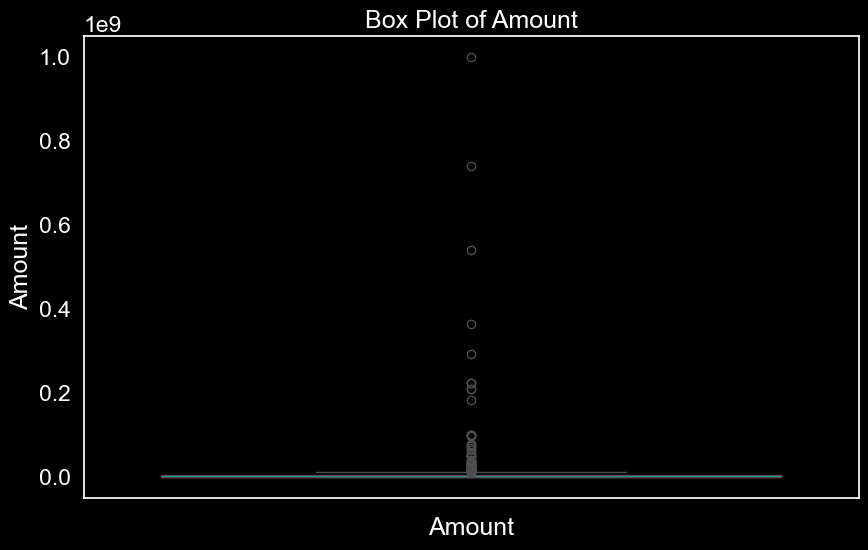

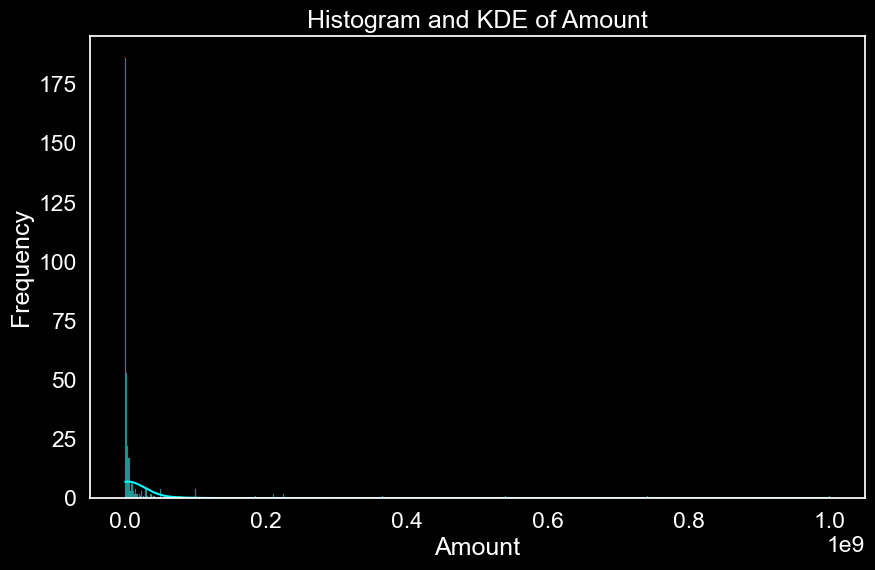

In [137]:
# Descriptive Statistics
print("Descriptive Statistics for 'Amount' column:")
print(cl_df2018['Amount'].describe())

# Skewness and Kurtosis
amount_skewness = skew(cl_df2018['Amount'])
amount_kurtosis = kurtosis(cl_df2018['Amount'])

print(f"\nSkewness for 'Amount' column: {amount_skewness}")
print(f"Kurtosis for 'Amount' column: {amount_kurtosis}")

# set theme
sns.set_theme(style="dark", palette="dark", font="sans-serif", font_scale=1.5)
plt.style.use("dark_background")
custom_palette = ["cyan", "magenta", "yellow"]

# Box Plot
plt.figure(figsize=(10, 6))
sns.boxplot(y=cl_df2018['Amount'], palette=custom_palette)
plt.title('Box Plot of Amount')
plt.xlabel('Amount')
plt.show()

# Histogram with KDE Plot
plt.figure(figsize=(10, 6))
sns.histplot(cl_df2018['Amount'], kde=True, color='cyan')
plt.title('Histogram and KDE of Amount')
plt.xlabel('Amount')
plt.ylabel('Frequency')
plt.show()

**Filling missing values in 'Stage' column**

`Comment`

The numerical values in the 'Amount' column exhibit outliers, making median imputation a more suitable method for addressing missing values. The robustness of the median against outliers ensures that the imputation process is not skewed by extreme values, thus preserving the dataset's integrity. Furthermore, distinct median values observed across different stages support the preference for median imputation, as it accurately reflects the central tendency within each group.

It is important to note that the imputation strategy is designed to fill missing values in the stage column with stage groups based on the median values derived from each stage, which differs from using the mode of the stage column to fill missing values, a common approach for categorical data.

Conversely, if the 'Amount' data were devoid of outliers, mean imputation would be appropriate for handling missing numerical values due to its simplicity and effectiveness in symmetrical distributions. As mentioned earlier for categorical data, mode imputation would be the preferred method, utilizing the most frequently occurring category to maintain the distributional characteristics of the dataset. Although the calculated mean and mode values illustrate these alternative methods, given the current data characteristics, median imputation remains the optimal choice.

In [138]:
# Define a function to fill missing stages based on mode amounts
def fill_missing_stage18(row):
    if pd.isna(row['Stage']):
        for stage, median in median_amounts18.items():
            if row['Amount'] <= median:
                return stage
        return pd.NA  
    return row['Stage']

# Apply the function to fill missing stages
cl_df2018['Stage'] = cl_df2018.apply(fill_missing_stage18, axis=1)

# Display information
cl_df2018.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525 entries, 0 to 524
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Company_Brand  525 non-null    object 
 1   Founded        0 non-null      float64
 2   HeadQuarter    525 non-null    object 
 3   Sector         525 non-null    object 
 4   What_it_does   525 non-null    object 
 5   Founders       525 non-null    object 
 6   Investor       525 non-null    object 
 7   Amount         377 non-null    float64
 8   Stage          525 non-null    object 
dtypes: float64(2), object(7)
memory usage: 37.0+ KB


**Filling missing values in 'Amount' column**

In [139]:
# Select only the columns with missing values
X_missing18 = cl_df2018[['Amount']]  

# Initialize IterativeImputer
multiple_imputer = IterativeImputer(max_iter=10, random_state=0)  

# Fit and transform the data, and fill missing values directly in the DataFrame
cl_df2018[['Amount']] = multiple_imputer.fit_transform(X_missing18)  

# Determine the proportion of missing values
missing_cl_df2018_ed = (cl_df2018.isnull().mean() * 100).round(2)

# Display Results
print("Proportion of missing values in 2018 data:")
print()
print(missing_cl_df2018_ed)

Proportion of missing values in 2018 data:

Company_Brand      0.0
Founded          100.0
HeadQuarter        0.0
Sector             0.0
What_it_does       0.0
Founders           0.0
Investor           0.0
Amount             0.0
Stage              0.0
dtype: float64


##### Standardise Formats

In [140]:
# Standardize 'Founded Year' column to integer datatype
cl_df2018['Founded'] = cl_df2018['Founded'].replace([np.inf, -np.inf], np.nan).astype('Int64')


# Identify object columns (excluding 'What_it_does' and 'Company_Brand')
object_columns_to_convert18 = [col for col in cl_df2018.select_dtypes(include=['object']).columns
                             if col not in ['What_it_does', 'Company_Brand']]

# Convert object columns to category datatype
cl_df2018[object_columns_to_convert18] = cl_df2018[object_columns_to_convert18].astype('category')

# Display information
cl_df2018.info(memory_usage="deep")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525 entries, 0 to 524
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Company_Brand  525 non-null    object  
 1   Founded        0 non-null      Int64   
 2   HeadQuarter    525 non-null    category
 3   Sector         525 non-null    category
 4   What_it_does   525 non-null    object  
 5   Founders       525 non-null    category
 6   Investor       525 non-null    category
 7   Amount         525 non-null    float64 
 8   Stage          525 non-null    category
dtypes: Int64(1), category(5), float64(1), object(2)
memory usage: 129.5 KB


### Data Integration

In [141]:
# Assign the year 2021 to a new column 'Funding_Year' in the DataFrame cl_df2021
cl_df2021['Funding_Year'] = 2021

# Assign the year 2020 to a new column 'Funding_Year' in the DataFrame cl_df2020
cl_df2020['Funding_Year'] = 2020

# Assign the year 2019 to a new column 'Funding_Year' in the DataFrame cl_df2019
cl_df2019['Funding_Year'] = 2019

# Assign the year 2018 to a new column 'Funding_Year' in the DataFrame cl_df2018
cl_df2018['Funding_Year'] = 2018

# Combine the four DataFrames into a single DataFrame
lp1df = pd.concat([cl_df2021, cl_df2020, cl_df2019, cl_df2018], ignore_index=True)

# Standardize 'Founded' column to integer datatype
lp1df['Founded'] = lp1df['Founded'].replace([np.inf, -np.inf], np.nan).astype('Int64')

# Identify object columns (excluding 'What_it_does' and 'Company_Brand') to convert to category datatype
object_columns_to_convertlp1 = [col for col in lp1df.select_dtypes(include=['object']).columns
                                if col not in ['What_it_does', 'Company_Brand']]

# Convert object columns to category datatype
lp1df[object_columns_to_convertlp1] = lp1df[object_columns_to_convertlp1].astype('category')

# Display DataFrame information with deep memory usage
lp1df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2824 entries, 0 to 2823
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Company_Brand  2824 non-null   object  
 1   Founded        2061 non-null   Int64   
 2   HeadQuarter    2824 non-null   category
 3   Sector         2824 non-null   category
 4   What_it_does   2824 non-null   object  
 5   Founders       2824 non-null   category
 6   Investor       2824 non-null   category
 7   Amount         2824 non-null   float64 
 8   Stage          2824 non-null   category
 9   Funding_Year   2824 non-null   int64   
dtypes: Int64(1), category(5), float64(1), int64(1), object(2)
memory usage: 296.7+ KB


#### Data Pruning of Final Data

**Check missing values in final data**

In [142]:
# Determine the proportion of missing values
missing_percentage_lp1_st = (lp1df.isnull().mean() * 100).round(2)

# Display results
print("Proportion of missing values in final data:")
print()
print(missing_percentage_lp1_st)

Proportion of missing values in final data:

Company_Brand     0.00
Founded          27.02
HeadQuarter       0.00
Sector            0.00
What_it_does      0.00
Founders          0.00
Investor          0.00
Amount            0.00
Stage             0.00
Funding_Year      0.00
dtype: float64


##### Pruning 'Founded' Column

**Filling missing values in 'founded' column**

***Phase one***

In [143]:
# Create a copy of the original DataFrame to preserve the original data
cl_lp1df = lp1df.copy()

# Add a new column 'Company_Brand_lower' with all values in the 'Company_Brand' column converted to lowercase
cl_lp1df['Company_Brand_lower'] = cl_lp1df['Company_Brand'].str.lower()

# Filter rows where the 'Founded' column has missing values
companies1_without_flp1 = cl_lp1df[cl_lp1df['Founded'].isna()]

# Get unique company brands (in lowercase) from the rows where 'Founded' values are missing
unique1_companies_without_flp1 = companies1_without_flp1['Company_Brand_lower'].unique()

# Filter the original DataFrame to include only rows with these unique company brands (in lowercase)
filter1_companies_flp1 = cl_lp1df[cl_lp1df['Company_Brand_lower'].isin(unique1_companies_without_flp1)]

# Further filter the subset to include only rows where 'Founded' values are not missing
filter2_companies_flp1 = filter1_companies_flp1[filter1_companies_flp1['Founded'].notna()]

# Display the resulting DataFrame
filter2_companies_flp1

,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount,Stage,Funding_Year,Company_Brand_lower
13,Freyr Energy,2014,Hyderabad,Energy and Environment,Freyr Energy is a company that provides full s...,"Radhika Choudary, Saurabh Marda","Impact Partners, C4D Partners",2.000000e+06,Debt,2021,freyr energy
21,Uable,2020,Bangalore,Education and Learning,Uable offers role based programmes to empower ...,Saurabh Saxena,"Chiratae Ventures, JAFCO Asia",2.777607e+07,Validation,2021,uable
53,Swiggy,2014,Bangalore,Consumer Goods and Services,Swiggy is an on-demand food delivery platform ...,"Nandan Reddy, Rahul Jaimini, Sriharsha Majety","Carmignac, Falcon Edge Capital",8.000000e+08,Scaling,2021,swiggy
56,Pitstop,2015,Bangalore,Automotive,Pitstop offers general repair and maintenance ...,"Mihir Mohan Mishra, Nirant Ramakuru, Ruchi Deepak","Acko Technology, Services, LetsVenture",3.500000e+06,Early Traction,2021,pitstop
57,CRED,2018,Bangalore,Finance and Technology,CRED is a members-only credit card management ...,Kunal Shah,"Dragoneer Investment Group, Tiger Global Manag...",2.150000e+08,Scaling,2021,cred
...,...,...,...,...,...,...,...,...,...,...,...
2282,CarDekho,2008,Jaipur,Automotive,Enables people to buy and sell new/old cars.,Amit Jain,"Ping An Global Voyager Fund, Hillhouse Capital...",7.000000e+07,Scaling,2019,cardekho
2285,Sportido,2015,Noida,Media and Entertainment,It is a sports discovery app that helps to fin...,"Neeraj Aggarwala, Akhil Ramachandran","Inflection Point Ventures, SucSEED Venture Par...",4.333030e+07,Scaling,2019,sportido
2290,Ola,2010,Bangalore,Transport and Logistics,It enables one to book cab online,"Bhavish Aggarwal, Ankit Bhati","Kia Motors, Hyundai",3.110000e+08,Scaling,2019,ola
2295,Oyo,2013,Gurugram,Consumer Goods and Services,Provides rooms for comfortable stay,Ritesh Agarwal,"MyPreferred Transformation, Avendus Finance, S...",6.930000e+08,Scaling,2019,oyo


In [144]:
# Get unique company brands (in lowercase) from the filtered DataFrame with non-missing 'Founded' values
unique2_companies_without_flp1 = filter2_companies_flp1['Company_Brand_lower'].unique()

# Store the unique company brands in a list named 'target1flp1'
target1flp1 = list(unique2_companies_without_flp1)

# Filter the DataFrame to include only rows where 'Company_Brand_lower' is in the target list
target1_brands_dfflp1 = cl_lp1df[cl_lp1df['Company_Brand_lower'].isin(target1flp1)]

# Iterate through each company brand in the target1flp1 list
for brand in target1flp1:
    # Get the non-null 'Founded' value for this brand from the filtered DataFrame
    founded_value = target1_brands_dfflp1.loc[target1_brands_dfflp1['Company_Brand_lower'] == brand, 'Founded'].dropna().values[0]
    
    # Fill missing 'Founded' values in the original DataFrame with the identified non-null value
    cl_lp1df.loc[(cl_lp1df['Company_Brand_lower'] == brand) & (cl_lp1df['Founded'].isna()), 'Founded'] = founded_value

# Display information about the updated DataFrame
cl_lp1df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2824 entries, 0 to 2823
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   Company_Brand        2824 non-null   object  
 1   Founded              2252 non-null   Int64   
 2   HeadQuarter          2824 non-null   category
 3   Sector               2824 non-null   category
 4   What_it_does         2824 non-null   object  
 5   Founders             2824 non-null   category
 6   Investor             2824 non-null   category
 7   Amount               2824 non-null   float64 
 8   Stage                2824 non-null   category
 9   Funding_Year         2824 non-null   int64   
 10  Company_Brand_lower  2824 non-null   object  
dtypes: Int64(1), category(5), float64(1), int64(1), object(3)
memory usage: 318.7+ KB


***Phase two***

In [145]:
# Filter rows where the 'Founded' column has missing values
companies2_without_flp1 = cl_lp1df[cl_lp1df['Founded'].isna()]

# Get unique company brands (in lowercase) from the rows where 'Founded' values are missing
unique2_companies_without_flp1 = companies2_without_flp1['Company_Brand_lower'].unique()

# Filter the original DataFrame to include only rows with these unique company brands (in lowercase)
filter12_companies_flp1 = cl_lp1df[cl_lp1df['Company_Brand_lower'].isin(unique2_companies_without_flp1)]

# Further filter the subset to include only rows where 'Founded' values are not missing
filter22_companies_flp1 = filter12_companies_flp1[filter12_companies_flp1['Founded'].notna()]

# Display the resulting DataFrame
filter22_companies_flp1

,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount,Stage,Funding_Year,Company_Brand_lower


***Drop companies founded before 1980 and after 2021***

In [146]:
# Identify rows where the 'Founded' column has missing values
missing_founded = cl_lp1df[cl_lp1df['Founded'].isna()]

# Identify rows where the 'Founded' column has non-missing values
non_missing_founded = cl_lp1df[cl_lp1df['Founded'].notna()]

# Apply the filtering condition to rows with non-missing values in the 'Founded' column within the specified range
filtered_non_missing_founded = non_missing_founded[((cl_lp1df['Founded'] >= 1980) & (cl_lp1df['Founded'] <= 2021))]

# Concatenate the filtered non-missing founded rows with the missing founded rows
cl_lp1df = pd.concat([filtered_non_missing_founded, missing_founded], ignore_index=True)

# Display information about the DataFrame
cl_lp1df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2822 entries, 0 to 2821
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   Company_Brand        2822 non-null   object  
 1   Founded              2250 non-null   Int64   
 2   HeadQuarter          2822 non-null   category
 3   Sector               2822 non-null   category
 4   What_it_does         2822 non-null   object  
 5   Founders             2822 non-null   category
 6   Investor             2822 non-null   category
 7   Amount               2822 non-null   float64 
 8   Stage                2822 non-null   category
 9   Funding_Year         2822 non-null   int64   
 10  Company_Brand_lower  2822 non-null   object  
dtypes: Int64(1), category(5), float64(1), int64(1), object(3)
memory usage: 318.6+ KB


##### Pruning 'HeadQuarter' Column

**Filling Invalid Values in 'HeadQuarter' Column**

In [147]:
# Filter rows where the 'HeadQuarter' column has the value 'Not filled'
companies1_without_llp1 = cl_lp1df[cl_lp1df['HeadQuarter'].isin(['Not filled'])]

# Get unique company brands (in lowercase) from the rows where 'HeadQuarter' is 'Not filled'
unique1_companies_without_llp1 = companies1_without_llp1['Company_Brand_lower'].unique()

# Filter the original DataFrame to include only rows with these unique company brands (in lowercase)
filter1_companies_llp1 = cl_lp1df[cl_lp1df['Company_Brand_lower'].isin(unique1_companies_without_llp1)]

# Further filter the subset to include only rows where 'HeadQuarter' is not 'Not filled'
filter2_companies_llp1 = filter1_companies_llp1[~filter1_companies_llp1['HeadQuarter'].isin(['Not filled'])]

# Display the resulting DataFrame
filter2_companies_llp1

,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount,Stage,Funding_Year,Company_Brand_lower
27,Pristyn Care,2018,Gurugram,Healthcare and Health Technology,Pristyn Care is Health Care Startup that is di...,Harsimarbir (Harsh) Singh,"Sequoia Capital India, Hummingbird Ventures",5.300000e+07,Scaling,2021,pristyn care
45,moEVing,2021,Gurugram,Transport and Logistics,"Delivering clean, cost-effective and efficient...",VIKASH MISHRA,Not filled,1.000000e+06,Validation,2021,moeving
125,Postman,2014,Bangalore,Technology and Software,Postman is the collaboration platform for API ...,"Abhinav Asthana, Abhijit Kane, Ankit Sobti","CRV, Nexus Venture Partners",2.250000e+08,Scaling,2021,postman
127,RACEnergy,2018,Hyderabad,Automotive,RACEnergy is working to power the future of mo...,Arun Sreyas Reddy,"Micelio Fund, growX ventures",1.300000e+06,Validation,2021,racenergy
144,Klub,2019,Bangalore,Finance and Technology,Klub was founded with the vision of revolution...,"Anurakt Jain, Ishita Verma","9Unicorns, Sequoia Capital India’s Surge",2.000000e+07,Equity,2021,klub
147,Zupee,2018,Gurugram,Consumer Goods and Services,Mission to improve people’s lives by improving...,"Dilsher Singh, Siddhant Saurabh","WestCap Group, Tomales Bay Capital",3.000000e+07,Equity,2021,zupee
168,Neeman,2017,Hyderabad,Consumer Goods and Services,India's first Startup to use the world's most ...,Taran Chhabra,Sixth Sense Ventures,2.000000e+06,Early Traction,2021,neeman
227,Pristyn Care,2018,Gurugram,Healthcare and Health Technology,A new age health tech company that aims to sim...,"Harsimarbir (Harsh) Singh, Dr Vaibhav Kapoor, ...","Kunal Shah, Deepinder Goyal, Abhiraj Singh Bhal",9.600000e+07,Scaling,2021,pristyn care
279,Mamaearth,2016,Gurugram,Healthcare and Health Technology,Baby and mother care brand,"Ghazal, Varun Alagh",Sequoia,3.700000e+07,Equity,2021,mamaearth
303,Phable,2017,Bangalore,Healthcare and Health Technology,Mobile App for Patients and Doctors,"Mukesh Bansal, Prasanth Reddy, Sumit Sinha","Fresco Capital, Social Starts",1.200000e+07,Early Traction,2021,phable


In [148]:
# Get unique company brands (in lowercase) from the filtered DataFrame where 'HeadQuarter' is not 'Not filled'
unique1_companies_without_llp1 = filter2_companies_llp1['Company_Brand_lower'].unique()

# Store the unique company brands in a list named 'target1llp1'
target1llp1 = list(unique1_companies_without_llp1)

# Filter the original DataFrame to include only rows where 'Company_Brand_lower' is in the target list
target1_brands_dfllp1 = cl_lp1df[cl_lp1df['Company_Brand_lower'].isin(target1llp1)]

# target1_brands_dfllp1

# Iterate through each company brand in the target1llp1 list
for brand in target1llp1:
    # Get the 'HeadQuarter' value for this brand from the filtered DataFrame, excluding entries where 'HeadQuarter' is 'Not filled'
    location_value = target1_brands_dfllp1.loc[
        (target1_brands_dfllp1['Company_Brand_lower'] == brand) & 
        (target1_brands_dfllp1['HeadQuarter'] != 'Not filled'), 
        'HeadQuarter'
    ].values[0]
    
    # Fill 'HeadQuarter' values that are 'Not filled' in the original DataFrame with the identified valid value for this brand
    cl_lp1df.loc[
        (cl_lp1df['Company_Brand_lower'] == brand) & 
        (cl_lp1df['HeadQuarter'] == 'Not filled'), 
        'HeadQuarter'
    ] = location_value

companies2_without_llp1 = cl_lp1df[cl_lp1df['HeadQuarter'].isin(['Not filled'])]

# Display results
print("Number of 'Not filled' entries in 'HeadQuarter' column before replacement with valid cities:")
print(len(companies1_without_llp1))
print("\nNumber of 'Not filled' entries in 'HeadQuarter' column after replacement with valid cities:")
print(len(companies2_without_llp1))
print()

# Display information about the updated DataFrame
cl_lp1df.info()

Number of 'Not filled' entries in 'HeadQuarter' column before replacement with valid cities:
125

Number of 'Not filled' entries in 'HeadQuarter' column after replacement with valid cities:
75

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2822 entries, 0 to 2821
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   Company_Brand        2822 non-null   object  
 1   Founded              2250 non-null   Int64   
 2   HeadQuarter          2822 non-null   category
 3   Sector               2822 non-null   category
 4   What_it_does         2822 non-null   object  
 5   Founders             2822 non-null   category
 6   Investor             2822 non-null   category
 7   Amount               2822 non-null   float64 
 8   Stage                2822 non-null   category
 9   Funding_Year         2822 non-null   int64   
 10  Company_Brand_lower  2822 non-null   object  
dtypes: Int64(1), category(5), float

**Standardising Unique Values per Company Brand in 'HeadQuarter'**

In [149]:
# Group by 'Company_Brand_lower' and filter groups with more than one unique 'HeadQuarter'
duplicate1_brands_llp1 = cl_lp1df.groupby('Company_Brand_lower').filter(lambda x: x['HeadQuarter'].nunique() > 1)

# Display results
print("Number of Companies with more than one unique 'HeadQuarter':")
print(len(duplicate1_brands_llp1))

Number of Companies with more than one unique 'HeadQuarter':
339


`Comment`

Although 339 companies have multiple headquarter locations, the 'HeadQuarter' column will not be standardized based on unique values. This decision accounts for the possibility that a company may have relocated its headquarters multiple times during the four-year period encompassed by this dataset.

##### Pruning 'Sector' Column

**Filling Invalid Values in 'HeadQuarter' Column**

In [150]:
# Filter rows where the 'Sector' column has the value 'Not filled'
companies1_without_slp1 = cl_lp1df[cl_lp1df['Sector'] == 'Not filled']

# Get unique company brands (in lowercase) from the rows where 'Sector' is 'Not filled'
unique1_companies_without_slp1 = companies1_without_slp1['Company_Brand_lower'].unique()

# Filter the original DataFrame to include only rows with these unique company brands (in lowercase)
filter1_companies_slp1 = cl_lp1df[cl_lp1df['Company_Brand_lower'].isin(unique1_companies_without_slp1)]

# Further filter the subset to include only rows where 'Sector' is not 'Not filled'
filter2_companies_slp1 = filter1_companies_slp1[~filter1_companies_slp1['Sector'].isin(['Not filled'])]

# Display the resulting DataFrame
filter2_companies_slp1

,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount,Stage,Funding_Year,Company_Brand_lower
57,CRED,2018,Bangalore,Finance and Technology,CRED is a members-only credit card management ...,Kunal Shah,"Dragoneer Investment Group, Tiger Global Manag...",2.150000e+08,Scaling,2021,cred
121,DrinkPrime,2016,Bangalore,Consumer Goods and Services,India's Smartest Water Purifiers and are redef...,Anil Kejriwal,"UC Inclusive Credit, Western Capital",1.000000e+06,Debt,2021,drinkprime
398,Cred,2018,Bangalore,Finance and Technology,CRED is a Bengaluru-based fintech startup that...,Kunal Shah,"DST Global, General Catalyst",8.100000e+07,Scaling,2021,cred
493,Trell,2016,Bangalore,E-commerce and Retail,India's Largest Lifestyle Social Commerce plat...,"Pulkit Agarwal, Prashant Sachan, Arun Lodhi, B...","Mirae Asset, H&M",4.500000e+07,Scaling,2021,trell
584,Cell Propulsion,2016,Bangalore,Energy and Environment,Cell Propulsion is a fleet electrification com...,"Nakul Kukar, Paras Kaushal",growX ventures,2.000000e+06,Debt,2021,cell propulsion
601,Juicy chemistry,2014,Coimbatore,Healthcare and Health Technology,Juicy Chemistry operates as an eponymous consu...,"Megha, Pritesh Asher",Spring Marketing Capital,2.777607e+07,Scaling,2021,juicy chemistry
711,Juicy Chemistry,2014,Coimbatore,Healthcare and Health Technology,Juicy Chemistry operates as an eponymous consu...,"Megha, Pritesh Asher.",Akya Ventures,6.300000e+06,Early Traction,2021,juicy chemistry
944,CRED,2018,Bangalore,Finance and Technology,CRED is a credit card payment platform that re...,Kunal Shah,"Tiger Global, Falcon Edge",2.500000e+08,Scaling,2021,cred
963,Trell,2016,Bangalore,E-commerce and Retail,Trell is turning over a new leaf with the wave...,"Pulkit Agrawal, Arun Lodhi, Bimal Kartheek Rebba",Amazon,1.000000e+08,Equity,2021,trell
1151,Origo,2010,Gurugram,Agriculture and Technology,"Origo Commodities, a complete post-harvest man...","Sunoor Kaul, Mayank Dhanuka",YES Bank,1.000000e+07,Debt,2021,origo


In [151]:
# Get unique company brands (in lowercase) from the filtered DataFrame where 'Sector' is not 'Not filled'
unique1_companies_without_slp1 = filter2_companies_slp1['Company_Brand_lower'].unique()

# Store the unique company brands in a list named 'target1slp1'
target1slp1 = list(unique1_companies_without_slp1)

# Filter the original DataFrame to include only rows where 'Company_Brand_lower' is in the target list
target1_brands_dfslp1 = cl_lp1df[cl_lp1df['Company_Brand_lower'].isin(target1slp1)]

# Iterate through each company brand in the target1slp1 list
for brand in target1slp1:
    # Get the 'Sector' value for this brand from the filtered DataFrame, excluding entries where 'Sector' is 'Not filled'
    location_value = target1_brands_dfslp1.loc[
        (target1_brands_dfslp1['Company_Brand_lower'] == brand) & 
        (target1_brands_dfslp1['Sector'] != 'Not filled'), 
        'Sector'
    ].values[0]
    
    # Fill 'Sector' values that are 'Not filled' in the original DataFrame with the identified valid value for this brand
    cl_lp1df.loc[
        (cl_lp1df['Company_Brand_lower'] == brand) & 
        (cl_lp1df['Sector'] == 'Not filled'), 
        'Sector'
    ] = location_value

companies2_without_slp1 = cl_lp1df[cl_lp1df['Sector'].isin(['Not filled'])]

# Display results
print("Number of 'Not filled' entries in 'Sector' column before replacement with valid sectors:")
print(len(companies1_without_slp1))
print("\nNumber of 'Not filled' entries in 'Sector' column after replacement with valid sectors:")
print(len(companies2_without_slp1))
print()

# Display information about the updated DataFrame
cl_lp1df.info()

Number of 'Not filled' entries in 'Sector' column before replacement with valid sectors:
50

Number of 'Not filled' entries in 'Sector' column after replacement with valid sectors:
35

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2822 entries, 0 to 2821
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   Company_Brand        2822 non-null   object  
 1   Founded              2250 non-null   Int64   
 2   HeadQuarter          2822 non-null   category
 3   Sector               2822 non-null   category
 4   What_it_does         2822 non-null   object  
 5   Founders             2822 non-null   category
 6   Investor             2822 non-null   category
 7   Amount               2822 non-null   float64 
 8   Stage                2822 non-null   category
 9   Funding_Year         2822 non-null   int64   
 10  Company_Brand_lower  2822 non-null   object  
dtypes: Int64(1), category(5), float64(1), in

**Standardising unique values per company brand in 'sector'**

In [152]:
# Group by 'Company_Brand_lower' and filter groups with more than one unique 'Sector'
duplicate1_brands_slp1 = cl_lp1df.groupby('Company_Brand_lower').filter(lambda x: x['Sector'].nunique() > 1)

# Function to replace sectors with the first unique sector within each group
def replace_sectors_grp(group):
    first_unique_sector = group['Sector'].iloc[0]  # Get the first unique sector
    group['Sector'] = first_unique_sector  # Replace all sectors in the group with the first unique sector
    return group  

# Apply the function to each group by 'Company_Brand_lower'
cl_lp1df = cl_lp1df.groupby('Company_Brand_lower').apply(replace_sectors_grp).reset_index(drop=True)

# Group by 'Company_Brand_lower' again and filter groups with more than one unique 'Sector' after standardisation
duplicate_brands_slp2 = cl_lp1df.groupby('Company_Brand_lower').filter(lambda x: x['Sector'].nunique() > 1)

# Display results
print("Number of Companies with more than one unique 'Sector' before standardising:")
print(len(duplicate1_brands_slp1))
print("\nNumber of Companies with more than one unique 'Sector' after standardising:")
print(len(duplicate_brands_slp2))
print()

# Display information about the updated DataFrame
cl_lp1df.info()

Number of Companies with more than one unique 'Sector' before standardising:
442

Number of Companies with more than one unique 'Sector' after standardising:
0

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2822 entries, 0 to 2821
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   Company_Brand        2822 non-null   object  
 1   Founded              2250 non-null   Int64   
 2   HeadQuarter          2822 non-null   category
 3   Sector               2822 non-null   object  
 4   What_it_does         2822 non-null   object  
 5   Founders             2822 non-null   category
 6   Investor             2822 non-null   category
 7   Amount               2822 non-null   float64 
 8   Stage                2822 non-null   category
 9   Funding_Year         2822 non-null   int64   
 10  Company_Brand_lower  2822 non-null   object  
dtypes: Int64(1), category(4), float64(1), int64(1), object(4)
memory

##### Pruning 'Founders' Column

**Filling Invalid Values in 'Founders' Column**

In [153]:
# Filter rows where the 'Founders' column has the value 'Not filled'
companies1_without_fslp1 = cl_lp1df[cl_lp1df['Founders'].isin(['Not filled'])]

# Get unique company brands (in lowercase) from the rows where 'Founders' is 'Not filled'
unique1_companies_without_fslp1 = companies1_without_fslp1['Company_Brand_lower'].unique()

# Filter the original DataFrame to include only rows with these unique company brands (in lowercase)
filter1_companies_fslp1 = cl_lp1df[cl_lp1df['Company_Brand_lower'].isin(unique1_companies_without_fslp1)]

# Further filter the subset to include only rows where 'Founders' is not 'Not filled'
filter2_companies_fslp1 = filter1_companies_fslp1[~filter1_companies_fslp1['Founders'].isin(['Not filled'])]

# Display the resulting DataFrame
filter2_companies_fslp1

,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount,Stage,Funding_Year,Company_Brand_lower
11,6Degree,2014,Mumbai,E-commerce and Retail,6Degree is a fashion retail startup that provi...,"Amit Bhardwaj, Nikhil Hegde","Keiretsu Forum, SucSEED Venture Partners",1000000.0,Debt,2021,6degree
12,6Degree,2014,Mumbai,E-commerce and Retail,India's leading fashion business platform,"Amit Bhardwaj, Nikhil Hegde.","Keiretsu Forum, SucSEED Venture Partners",340000.0,Bridge,2020,6degree
133,Asteria Aerospace,2011,Bangalore,Technology and Software,"Develops drones that are used by the military,...","Neel Mehta, Nihar Vartak",Reliance Industries,230000000.0,Scaling,2019,asteria aerospace
147,Avail Finance,2017,Bangalore,Finance and Technology,Avail is a mobile-first platform aiming to fin...,"Ankush Aggarwal, Tushar Mehndiratta","Alteria Capital, Matrix Partners India",3000000.0,Debt,2021,avail finance
148,Avail Finance,2017,Bangalore,Finance and Technology,Instant online loan app,"Ankush Aggarwal, Tushar Mehndiratta","Alphawave, Matrix Partners",11635000.0,Scaling,2020,avail finance
...,...,...,...,...,...,...,...,...,...,...,...
2801,Zomato,2008,Gurgaon,Consumer Goods and Services,Zomato is a food delivery and restaurant disco...,"Deepinder Goyal, Gaurav Gupta, Pankaj Chaddah","Kora, Tiger Global Management",660000000.0,Scaling,2020,zomato
2802,Zomato,2008,Gurugram,Consumer Goods and Services,Zomato is a food delivery and restaurant disco...,"Deepinder Goyal, Gaurav Gupta, Pankaj Chaddah","Kora, Tiger Global Management",52000000.0,Scaling,2020,zomato
2803,Zomato,2008,Gurugram,Consumer Goods and Services,Online food delivery and restaurant discovery ...,Deepinder Goyal,Pacific Horizon,5000000.0,Debt,2020,zomato
2804,Zomato,2008,Gurugram,Consumer Goods and Services,Online food delivery and restaurant discovery ...,Deepinder Goyal,Ant Financial,150000000.0,Scaling,2020,zomato


In [154]:
# Get unique company brands (in lowercase) from the filtered DataFrame where 'Founders' is not 'Not filled'
unique1_companies_without_fslp1 = filter2_companies_fslp1['Company_Brand_lower'].unique()

# Store the unique company brands in a list named 'target1fslp1'
target1fslp1 = list(unique1_companies_without_fslp1)

# Filter the original DataFrame to include only rows where 'Company_Brand_lower' is in the target list
target1_brands_dffslp1 = cl_lp1df[cl_lp1df['Company_Brand_lower'].isin(target1fslp1)]

# Iterate through each company brand in the target1fslp1 list
for brand in target1fslp1:
    # Get the 'Founders' value for this brand from the filtered DataFrame, excluding entries where 'Founders' is 'Not filled'
    location_value = target1_brands_dffslp1.loc[
        (target1_brands_dffslp1['Company_Brand_lower'] == brand) & 
        (target1_brands_dffslp1['Founders'] != 'Not filled'), 
        'Founders'
    ].values[0]
    
    # Fill 'Sector' values that are 'Not filled' in the original DataFrame with the identified valid value for this brand
    cl_lp1df.loc[
        (cl_lp1df['Company_Brand_lower'] == brand) & 
        (cl_lp1df['Founders'] == 'Not filled'), 
        'Founders'
    ] = location_value

companies2_without_fslp1 = cl_lp1df[cl_lp1df['Founders'].isin(['Not filled'])]

# Display results
print("Number of 'Not filled' entries in 'Founders' column before replacement with valid founders:")
print(len(companies1_without_fslp1))
print("\nNumber of 'Not filled' entries in 'Founders' column after replacement with valid founders:")
print(len(companies2_without_fslp1))
print()

# Display information about the updated DataFrame
cl_lp1df.info()

Number of 'Not filled' entries in 'Founders' column before replacement with valid founders:
544

Number of 'Not filled' entries in 'Founders' column after replacement with valid founders:
422

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2822 entries, 0 to 2821
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   Company_Brand        2822 non-null   object  
 1   Founded              2250 non-null   Int64   
 2   HeadQuarter          2822 non-null   category
 3   Sector               2822 non-null   object  
 4   What_it_does         2822 non-null   object  
 5   Founders             2822 non-null   category
 6   Investor             2822 non-null   category
 7   Amount               2822 non-null   float64 
 8   Stage                2822 non-null   category
 9   Funding_Year         2822 non-null   int64   
 10  Company_Brand_lower  2822 non-null   object  
dtypes: Int64(1), category(4), float6

**Standardising unique values per company brand in 'founders'**

In [155]:
# Group by 'Company_Brand_lower' and filter groups with more than one unique 'Sector'
duplicate1_brands_fslp1 = cl_lp1df.groupby('Company_Brand_lower').filter(lambda x: x['Founders'].nunique() > 1)

# Function to replace sectors with the first unique sector within each group
def replace_founders_grp(group):
    first_unique_founders = group['Founders'].iloc[0]  # Get the first unique sector
    group['Founders'] = first_unique_founders  # Replace all sectors in the group with the first unique sector
    return group  

# Apply the function to each group by 'Company_Brand_lower'
cl_lp1df = cl_lp1df.groupby('Company_Brand_lower').apply(replace_founders_grp).reset_index(drop=True)

# Group by 'Company_Brand_lower' again and filter groups with more than one unique 'Sector' after standardisation
duplicate1_brands_fslp2 = cl_lp1df.groupby('Company_Brand_lower').filter(lambda x: x['Founders'].nunique() > 1)

# Convert 'Founders' column to category data type
cl_lp1df['Founders'] = cl_lp1df['Founders'].astype('category')

# Display results
print("Number of Companies with more than one unique 'Founders' before standardising:")
print(len(duplicate1_brands_fslp1))
print("\nNumber of Companies with more than one unique 'Founders' after standardising:")
print(len(duplicate1_brands_fslp2))
print()

# Display information about the updated DataFrame
cl_lp1df.info()

Number of Companies with more than one unique 'Founders' before standardising:
688

Number of Companies with more than one unique 'Founders' after standardising:
0

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2822 entries, 0 to 2821
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   Company_Brand        2822 non-null   object  
 1   Founded              2250 non-null   Int64   
 2   HeadQuarter          2822 non-null   category
 3   Sector               2822 non-null   object  
 4   What_it_does         2822 non-null   object  
 5   Founders             2822 non-null   category
 6   Investor             2822 non-null   category
 7   Amount               2822 non-null   float64 
 8   Stage                2822 non-null   category
 9   Funding_Year         2822 non-null   int64   
 10  Company_Brand_lower  2822 non-null   object  
dtypes: Int64(1), category(4), float64(1), int64(1), object(4)
me

##### Dropping Invalid Entries

**Check the percentage of companies headquartered outside India**

In [156]:
# Ensure city names are compared correctly by stripping and converting to lower case
indian_cities_normalized = [city.lower().strip() for city in indian_cities]

# Filter the rows where the headquarters is not in the list of Indian cities
outside1_llp1 = cl_lp1df[~cl_lp1df['HeadQuarter'].str.lower().str.strip().isin(indian_cities_normalized)]

# List unique cities outside India
cities1_outside_llp1 = outside1_llp1['HeadQuarter'].unique()

# Calculate the percentage of data with headquarters outside India
percentage1_outside_llp1 = (len(outside1_llp1) / len(cl_lp1df)) * 100

# Return the results
percentage1_outside_llp1, cities1_outside_llp1

(3.933380581148122,
 ['Not filled', 'Paris', 'San Francisco', 'New York', 'Sydney', ..., 'Frisco', 'Plano', 'Tangerang', 'Shanghai', 'Seattle']
 Length: 21
 Categories (109, object): ['Ahmedabad', 'Alleppey', 'Alwar', 'Ambernath', ..., 'Vadodara', 'Warangal', 'West Bengal', 'Worli'])

**Drop only companies headquartered outside India**

In [157]:
# Drop the rows where the headquarters is outside India
cl_lp1df.drop(outside1_llp1.index, inplace=True)

# Filter the rows where the headquarters is not in the list of Indian cities
outside2_llp1 = cl_lp1df[~cl_lp1df['HeadQuarter'].str.lower().str.strip().isin(indian_cities_normalized)]

# List unique cities outside India
cities2_outside_llp1 = outside2_llp1['HeadQuarter'].unique()

# Calculate the percentage of data with headquarters outside India
percentage2_outside_llp1 = (len(outside2_llp1) / len(cl_lp1df)) * 100

# Return the results
percentage2_outside_llp1, cities2_outside_llp1

(0.0,
 [], Categories (109, object): ['Ahmedabad', 'Alleppey', 'Alwar', 'Ambernath', ..., 'Vadodara', 'Warangal', 'West Bengal', 'Worli'])

##### Final Hedging of Data

**Eliminate 'Not filled' entries in 'Sector' column**

In [158]:
# Filter rows where the 'Sector' column is 'Not filled'
not_filled1_slp1 = cl_lp1df[cl_lp1df['Sector'] == 'Not filled']

# Get unique company brands from the filtered rows
unique1_not_filled_slp1 = not_filled1_slp1['Company_Brand'].unique()

# Display unique company brands with 'Sector' column not filled
unique1_not_filled_slp1

array(['Avenues Payments India Pvt. Ltd.', 'Corefactors', 'Deftouch',
       'dishq', 'ENLYFT DIGITAL SOLUTIONS PRIVATE LIMITED', 'Finwego',
       'Flathalt', 'FLEECA', 'Fric Bergen', 'HousingMan.com',
       'Iba Halal Care', 'Inner Being Wellness', 'Jagaran Microfin',
       'KredX', 'm.Paani', 'MissMalini Entertainment', 'MySEODoc',
       'ORO Wealth', 'Planet11 eCommerce Solutions India (Avenue11)',
       'Roadcast', 'SaffronStays', 'Scale Labs', 'Scholify', 'Sequretek',
       'TapChief', 'Text Mercato', 'Toddle', 'Toffee', 'Togedr',
       'Wagonfly', 'WheelsEMI'], dtype=object)

In [159]:
# Dictionary mapping company names to sectors
company_sector_mapping = {
    'Avenues Payments India Pvt. Ltd.': 'Finance and Technology',
    'Corefactors': 'Marketing and Advertising',
    'Deftouch': 'Media and Entertainment',
    'dishq': 'Technology and Software',
    'ENLYFT DIGITAL SOLUTIONS PRIVATE LIMITED': 'Marketing and Advertising',
    'Finwego': 'Finance and Technology',
    'Flathalt': 'Real Estate and Housing',
    'FLEECA': 'Automotive',
    'Fric Bergen': 'Consumer Goods and Services',
    'HousingMan.com': 'Real Estate and Housing',
    'Iba Halal Care': 'Consumer Goods and Services',
    'Inner Being Wellness': 'Healthcare and Health Technology',
    'Jagaran Microfin': 'Finance and Technology',
    'KredX': 'Finance and Technology',
    'm.Paani': 'Technology and Software',
    'MissMalini Entertainment': 'Media and Entertainment',
    'MySEODoc': 'Technology and Software',
    'ORO Wealth': 'Finance and Technology',
    'Planet11 eCommerce Solutions India (Avenue11)': 'E-commerce and Retail',
    'Roadcast': 'Transport and Logistics',
    'SaffronStays': 'Hospitality and Tourism',
    'Scale Labs': 'Technology and Software',
    'Scholify': 'Education and Learning',
    'Sequretek': 'Technology and Software',
    'TapChief': 'Human Resources and Consultancy',
    'Text Mercato': 'E-commerce and Retail',
    'Toddle': 'Education and Learning',
    'Toffee': 'Insurance and Finance',
    'Togedr': 'Hospitality and Tourism',
    'Wagonfly': 'E-commerce and Retail',
    'WheelsEMI': 'Finance and Technology'
}

# Define a mask to identify rows where the 'Sector' column is 'Not filled'
not_filled_mask = cl_lp1df['Sector'] == 'Not filled'

# Apply the company-sector mapping only to the rows where the 'Sector' column is 'Not filled'
cl_lp1df.loc[not_filled_mask, 'Sector'] = cl_lp1df.loc[not_filled_mask, 'Company_Brand'].map(company_sector_mapping)

# Convert 'Sector' column to category data type
cl_lp1df['Sector'] = cl_lp1df['Sector'].astype('category')

# Filter rows where the 'Sector' column is 'Not filled'
not_filled2_slp1 = cl_lp1df[cl_lp1df['Sector'] == 'Not filled']

# Display information about the updated DataFrame
cl_lp1df.info()

# Display rows where the 'Sector' column is 'Not filled'
not_filled2_slp1

<class 'pandas.core.frame.DataFrame'>
Index: 2711 entries, 0 to 2821
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   Company_Brand        2711 non-null   object  
 1   Founded              2169 non-null   Int64   
 2   HeadQuarter          2711 non-null   category
 3   Sector               2711 non-null   category
 4   What_it_does         2711 non-null   object  
 5   Founders             2711 non-null   category
 6   Investor             2711 non-null   category
 7   Amount               2711 non-null   float64 
 8   Stage                2711 non-null   category
 9   Funding_Year         2711 non-null   int64   
 10  Company_Brand_lower  2711 non-null   object  
dtypes: Int64(1), category(5), float64(1), int64(1), object(3)
memory usage: 331.3+ KB


,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount,Stage,Funding_Year,Company_Brand_lower


**Drop 'Company_Brand_lower' column**

In [160]:
# Drop the 'Company_Brand_lower' column
cl_lp1df = cl_lp1df.drop(columns=['Company_Brand_lower'])

# Display the DataFrame to verify the change
cl_lp1df.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
Index: 2711 entries, 0 to 2821
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Company_Brand  2711 non-null   object  
 1   Founded        2169 non-null   Int64   
 2   HeadQuarter    2711 non-null   category
 3   Sector         2711 non-null   category
 4   What_it_does   2711 non-null   object  
 5   Founders       2711 non-null   category
 6   Investor       2711 non-null   category
 7   Amount         2711 non-null   float64 
 8   Stage          2711 non-null   category
 9   Funding_Year   2711 non-null   int64   
dtypes: Int64(1), category(5), float64(1), int64(1), object(2)
memory usage: 1.1 MB


**Check missing values in cleaned final data**

In [161]:
# Determine the proportion of missing values
missing_percentage_lp1_ed = (cl_lp1df.isnull().mean() * 100).round(2)

# Display results
print("Proportion of missing values in cleaned final data:")
print()
print(missing_percentage_lp1_ed)

Proportion of missing values in cleaned final data:

Company_Brand     0.00
Founded          19.99
HeadQuarter       0.00
Sector            0.00
What_it_does      0.00
Founders          0.00
Investor          0.00
Amount            0.00
Stage             0.00
Funding_Year      0.00
dtype: float64


##### Exporting Data

In [162]:
# Export the DataFrame to an Excel file
output_file = '../Data/LP1_final.xlsx'
cl_lp1df.to_excel(output_file, index=False)

### Data Transformation

#### 1. Who are the most active investors in the Indian start-up ecosystem?

Investor
Venture Catalysts            57
Inflection Point Ventures    43
Sequoia Capital India        36
Titan Capital                33
Better Capital               29
Y Combinator                 28
9Unicorns                    26
Tiger Global                 25
Matrix Partners India        22
Blume Ventures               21
Name: count, dtype: int64


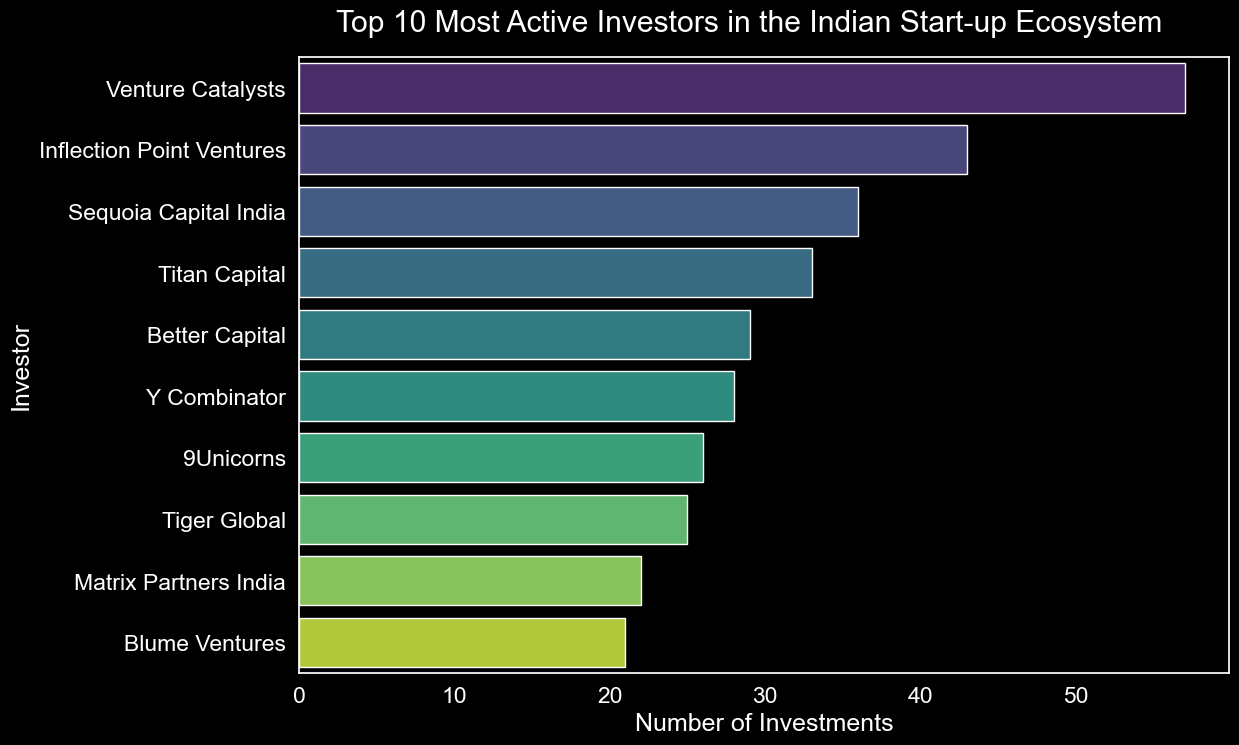

In [163]:
# Filter out rows where 'Investor' column is not 'Not filled'
cl_lp1df1 = cl_lp1df[cl_lp1df['Investor'] != 'Not filled']

# Split the 'Investor' column by comma to handle multiple investors
cl_lp1df1['Investor'] = cl_lp1df1['Investor'].str.split(',')

# Normalize the dataframe so each investor is a separate row
investors_df = cl_lp1df1.explode('Investor')

# Clean any leading/trailing whitespace from investor names
investors_df['Investor'] = investors_df['Investor'].str.strip()

# Count the frequency of each investor
investor_counts = investors_df['Investor'].value_counts()

# Display the top 10 most active investors
most_active_investors = investor_counts.head(10)
print(most_active_investors)

# Plotting the data
plt.figure(figsize=(12, 8))
sns.barplot(x=most_active_investors.values, y=most_active_investors.index, palette='viridis')
plt.suptitle('Top 10 Most Active Investors in the Indian Start-up Ecosystem', y=0.94)
plt.xlabel('Number of Investments')
plt.ylabel('Investor')
plt.show()

#### 2. Are there any geographical trends or hotspots for start-up funding in India?

##### a. Top 10 locations with highest startup funding

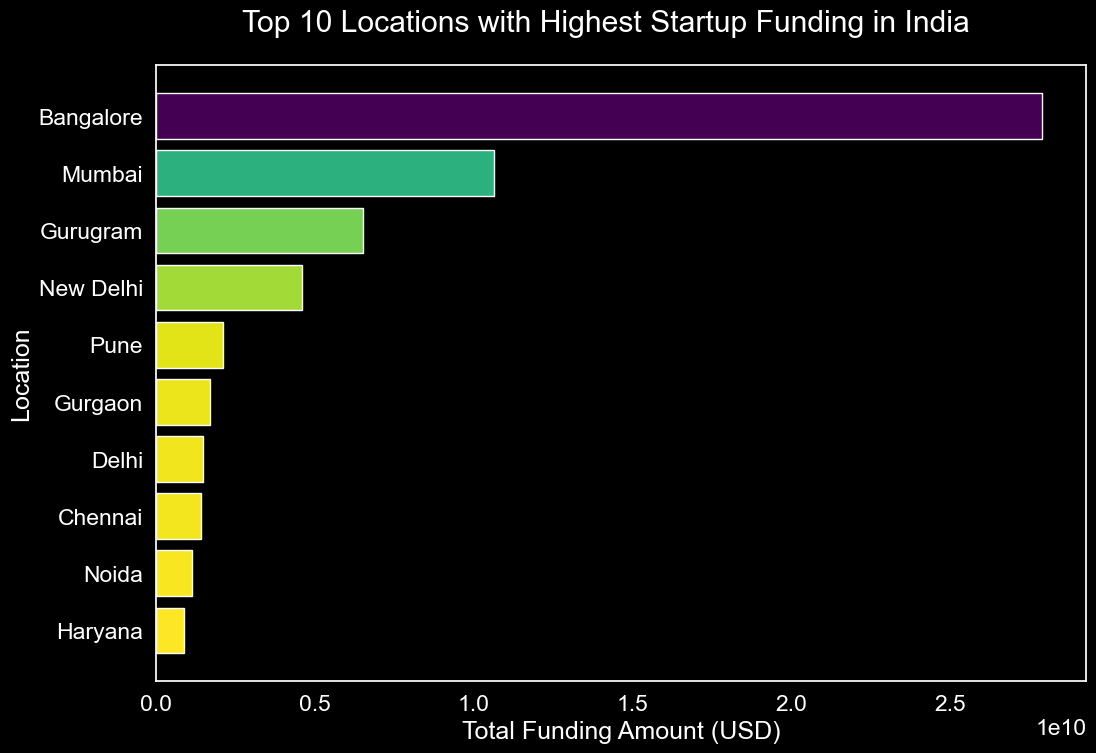

Top 10 locations with highest startup funding:


,HeadQuarter,Amount
0,Bangalore,"$27,903,927,582.09"
1,Mumbai,"$10,651,447,333.14"
2,Gurugram,"$6,512,522,151.78"
3,New Delhi,"$4,585,084,286.91"
4,Pune,"$2,084,178,928.39"
5,Gurgaon,"$1,680,288,689.31"
6,Delhi,"$1,473,268,436.66"
7,Chennai,"$1,391,550,454.44"
8,Noida,"$1,132,759,297.32"
9,Haryana,"$876,914,272.32"


In [164]:
# Create a copy of the DataFrame to avoid modifying the original DataFrame
cl_lp1df2 = cl_lp1df.copy()

# Group by 'HeadQuarter' and calculate the total funding amount for each location
location_funding = cl_lp1df2.groupby('HeadQuarter')['Amount'].sum().reset_index()

# Sort the DataFrame by total funding amount in descending order
location_funding = location_funding.sort_values(by='Amount', ascending=False)

# Get the top 10 locations with the highest total funding
top_ten_locations = location_funding.head(10).reset_index(drop=True)

# Format the 'Amount' column to display funding amounts in currency format
top_ten_locations_formatted = top_ten_locations.copy()
top_ten_locations_formatted["Amount"] = top_ten_locations_formatted["Amount"].apply(lambda x: "${:,.2f}".format(x))

# Plotting the results using pyplot with a colormap similar to seaborn's viridis
plt.figure(figsize=(12, 8))
colors = cm.viridis_r((top_ten_locations['Amount'] - min(top_ten_locations['Amount'])) / (max(top_ten_locations['Amount']) - min(top_ten_locations['Amount'])))
plt.barh(top_ten_locations['HeadQuarter'], top_ten_locations['Amount'], color=colors)
plt.xlabel('Total Funding Amount (USD)')
plt.ylabel('Location')
plt.suptitle('Top 10 Locations with Highest Startup Funding in India', y=0.95)
plt.gca().invert_yaxis()  # Invert y-axis to display the highest funding at the top
plt.show()

# Display the top 10 locations with the highest funding in a formatted manner
print("Top 10 locations with highest startup funding:")
top_ten_locations_formatted

##### b. Top 10 Locations with Highest Number of Startups in India

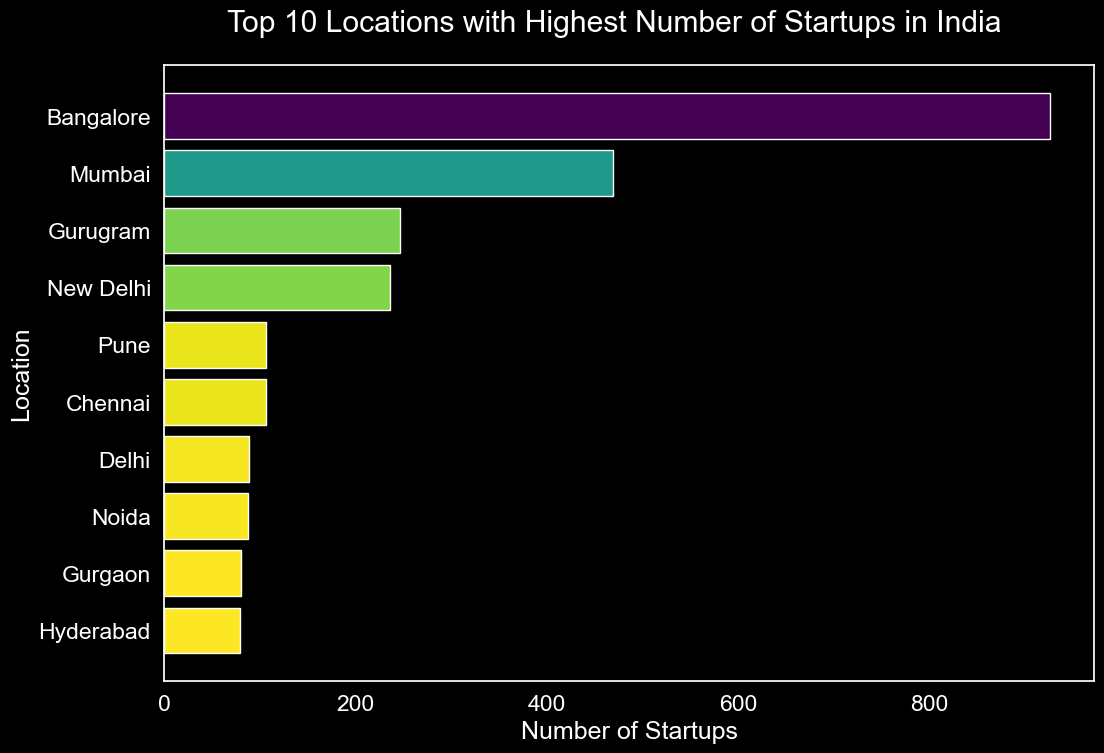

Top 10 Locations with Highest Number of Startups in India:


,HeadQuarter,Startup_Count
0,Bangalore,926
1,Mumbai,469
2,Gurugram,247
3,New Delhi,236
4,Pune,106
5,Chennai,106
6,Delhi,89
7,Noida,88
8,Gurgaon,80
9,Hyderabad,79


In [166]:
# Count the number of startups in each location
startup_count = cl_lp1df2['HeadQuarter'].value_counts().reset_index()
startup_count.columns = ['HeadQuarter', 'Startup_Count']

# Get the top 10 locations with the highest number of startups
top_ten_startup_count = startup_count.head(10).reset_index(drop=True)

# Plotting the results using pyplot with a colormap similar to seaborn's viridis
plt.figure(figsize=(12, 8))
colors = cm.viridis_r((top_ten_startup_count['Startup_Count'] - min(top_ten_startup_count['Startup_Count'])) / (max(top_ten_startup_count['Startup_Count']) - min(top_ten_startup_count['Startup_Count'])))
plt.barh(top_ten_startup_count['HeadQuarter'], top_ten_startup_count['Startup_Count'], color=colors)
plt.xlabel('Number of Startups')
plt.ylabel('Location')
plt.suptitle('Top 10 Locations with Highest Number of Startups in India', y=0.95)
plt.gca().invert_yaxis()  # Invert y-axis to display the highest number of startups at the top
plt.show()

# Display the top 10 locations with the highest number of startups
print("Top 10 Locations with Highest Number of Startups in India:")
top_ten_startup_count

##### c. Average Funding of Top 10 Locations with Highest Funding Amount and Number of Startups in India

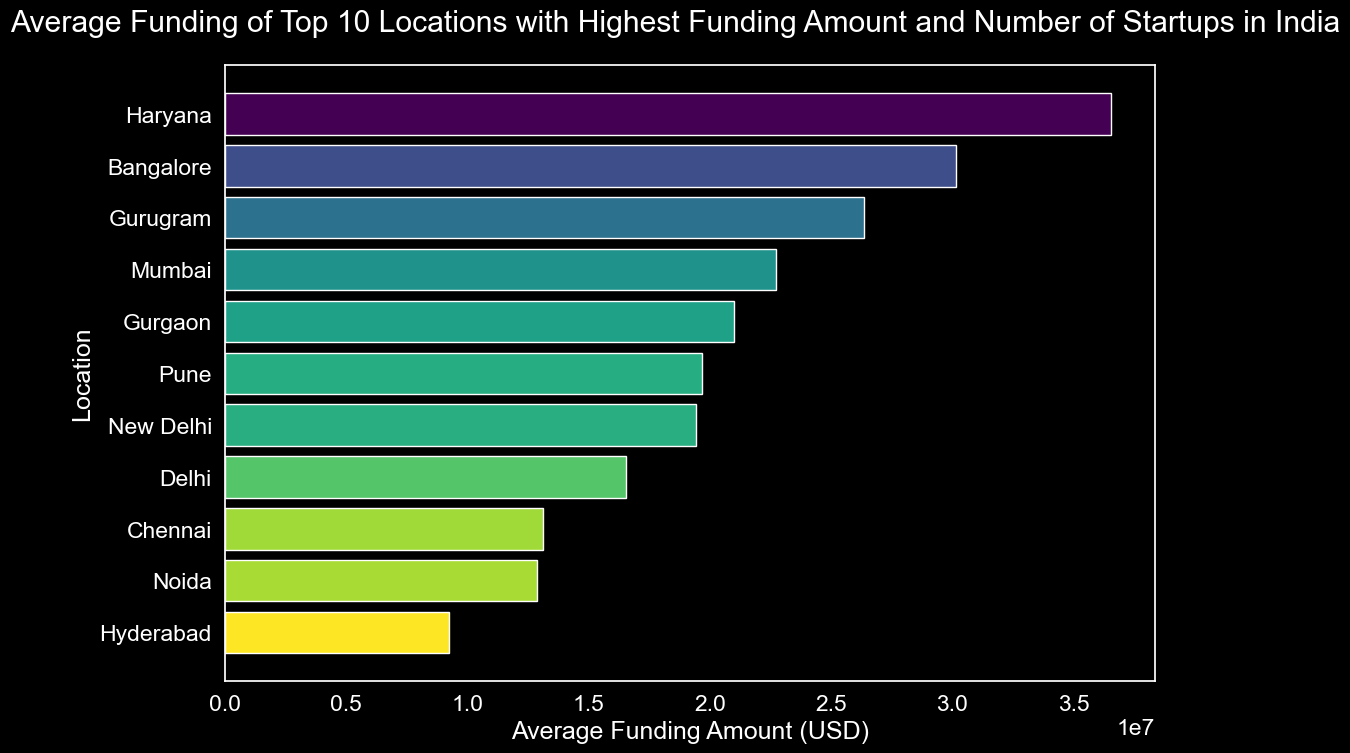

Average Funding of Top 10 Locations with Highest Funding Amount and Number of Startups in India:


,HeadQuarter,Amount,Startup_Count,Average_Funding
0,Haryana,"$876,914,272.32",24,"$36,538,094.68"
1,Bangalore,"$27,903,927,582.09",926,"$30,133,831.08"
2,Gurugram,"$6,512,522,151.78",247,"$26,366,486.44"
3,Mumbai,"$10,651,447,333.14",469,"$22,710,975.12"
4,Gurgaon,"$1,680,288,689.31",80,"$21,003,608.62"
5,Pune,"$2,084,178,928.39",106,"$19,662,065.36"
6,New Delhi,"$4,585,084,286.91",236,"$19,428,323.25"
7,Delhi,"$1,473,268,436.66",89,"$16,553,577.94"
8,Chennai,"$1,391,550,454.44",106,"$13,127,834.48"
9,Noida,"$1,132,759,297.32",88,"$12,872,264.74"


In [167]:
# Define the target locations of interest
target_locations = ['Bangalore', 'Mumbai', 'Gurugram', 'New Delhi', 'Pune', 'Gurgaon', 'Delhi', 'Chennai', 'Noida', 'Haryana', 'Hyderabad']

# Merge the DataFrames containing funding amount and startup count based on 'HeadQuarter' column
st_locations = pd.merge(location_funding, startup_count, on='HeadQuarter')

# Filter the merged DataFrame to include only target locations
target_st_locations = st_locations[st_locations['HeadQuarter'].isin(target_locations)]

# Calculate the average funding per startup for each target location
target_st_locations['Average_Funding'] = target_st_locations['Amount'] / target_st_locations['Startup_Count']

# Sort the DataFrame by average funding in descending order
target_st_locations = target_st_locations.sort_values(by='Average_Funding', ascending=False).reset_index(drop=True)

# Create a copy of the DataFrame for formatting
target_st_locations_formatted = target_st_locations.copy()

# Format the 'Amount' and 'Average_Funding' columns to display values in currency format
target_st_locations_formatted["Amount"] = target_st_locations_formatted["Amount"].apply(lambda x: "${:,.2f}".format(x))
target_st_locations_formatted["Average_Funding"] = target_st_locations_formatted["Average_Funding"].apply(lambda x: "${:,.2f}".format(x))

# Plotting the results using pyplot with a colormap similar to seaborn's viridis
plt.figure(figsize=(12, 8))
colors = cm.viridis_r((target_st_locations['Average_Funding'] - min(target_st_locations['Average_Funding'])) / (max(target_st_locations['Average_Funding']) - min(target_st_locations['Average_Funding'])))
plt.barh(target_st_locations['HeadQuarter'], target_st_locations['Average_Funding'], color=colors)
plt.xlabel('Average Funding Amount (USD)')
plt.ylabel('Location')
plt.suptitle('Average Funding of Top 10 Locations with Highest Funding Amount and Number of Startups in India', y=0.95)
plt.gca().invert_yaxis()  # Invert y-axis to display the highest average funding at the top
plt.show()

# Display the top 10 locations with the highest average funding per startup
print("Average Funding of Top 10 Locations with Highest Funding Amount and Number of Startups in India:")
target_st_locations_formatted


## References

***Adebayo, O. P., Worlu, R. E., Moses, C. L., & Ogunnaike, O. O. (2020). An integrated organisational culture for sustainable environmental performance in the Nigerian Context. Sustainability, 12(20), 8323.***

***David, D., S. Gopalan, and S. Ramachandran. 2020. The Startup Environment and Funding Activity in India. ADBI Working Paper 1145. Tokyo: Asian Development Bank Institute.***

***James Broughel and Adam Thierer. “Technological Innovation and Economic Growth: A Brief Report on the Evidence.” Mercatus Research, Mercatus Center at George Mason University, Arlington, VA, February 2019.***

***Vickers, Chris, and Nicolas L. Ziebarth. "Lessons for Today from Past Periods of Rapid Technological Change." United Nations, Department of Economic and Social Affairs, DESA Working Paper No. 158, March 2019.***

[Back to Top](#Table-of-Contents)
